# Objectives:
GD and SGD implementation on Linear Regression for Boston Dataset to find Optimal W and b and compare the result with original scikit learn implementation.

# Loading libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
# loading Boston Dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [5]:
bos['PRICE'] = boston.target

In [8]:
X = bos.iloc[:,0:13]
y = bos.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
# Split arrays or matrices into random train and test subsets
# test_size=0.3 means out of 10k 3k will be test set and 7k train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
# prepare the scaler with train data
scaler = StandardScaler(with_mean=False).fit(X_train)
# transform both train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# GD Implementation

In [8]:
# initialize b and w
initial_b = 0
initial_w = np.zeros([1,13])
#initial_w = np.random.randn(1,13)
#initial_w = np.ones([1,13])*-1

In [15]:
def costfunc(b,w,X,y):
    '''This is to compute cost of the function
       our target is to reduce this cost in every iteration'''
    tot_sum = np.power(((X @ w.T + b)-y),2)
    return np.sum(tot_sum)/(len(X))

In [17]:

def gradientDescent(X,y,w_current,b_current,learningRate):
    
    '''gradient descent algorithm to be used to find minimal value of 
       the function named costfunc'''
    
    
    N = (len(X))
    cost = np.zeros(N)
    step = 0
    for i in range(100000):
        #learningRate /= 2
        for j in range(20):           
            y_current = X @ w_current.T + b_current
            w_gradient = -(2/N) * np.sum(X * (y.reshape(1, -1).T - y_current))
            b_gradient = -(2/N) * np.sum(y.reshape(1, -1).T - y_current)
            w_current = w_current - (learningRate * w_gradient)
            b_current = b_current - (learningRate * b_gradient)
            cost[i] = costfunc(b_current,w_current,X,y)
            print("Iteration number {} and cost {}".format(i,cost[i]))
            step += 1
            if (cost[i-1] - cost[i]) == 0:
                break
        
         
    return w_current,b_current,learningRate,cost,step

w,b,learningRate,c,step = gradientDescent(X_train,np.transpose(np.array(y_train).reshape(1, -1)),initial_m,initial_b,.0001)

ValueError: operands could not be broadcast together with shapes (354,13) (354,354) 

ValueError: x and y must have same first dimension, but have shapes (124963,) and (354,)

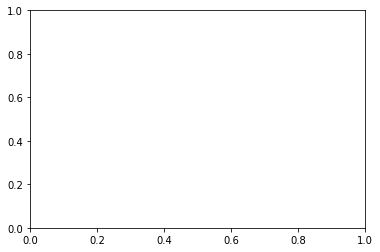

In [13]:
#plot the cost
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()  
ax.plot(np.arange(step), c[0:step], 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [649]:
# getting line with our optimal w and b
#y = np.dot(X_train,w.T) + b
y = X_test @ w.T + b

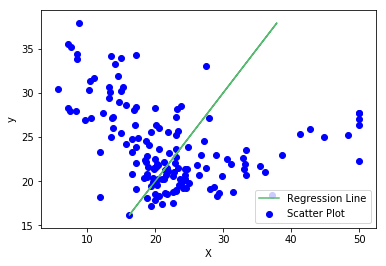

In [650]:

# Ploting Line
plt.plot(np.dot(X_test,w.T), y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(y_test,y, label='Scatter Plot', color=['b'])
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [651]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# MSE
sqrt(c[step-1])

8.128291363330543

# sklearn implementation


In [28]:
# loading SGD from sklearn library
from sklearn.linear_model import SGDRegressor

In [29]:
# penalty = None ==> we are not using regularization term 
# alpha = 0 ==> we are not using regularization term 
# eta0 = 0.001 ==> learning rate
# max_iter = 1000 ==> we are iterating 1000 times
clf = SGDRegressor(penalty=None, alpha = 0, eta0 = 0.001,  max_iter = 1000)

In [30]:
clf.fit(X_train,y_train)
y_predicted = clf.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
r_squared = sqrt(mean_squared_error(y_test, y_predicted))
r_squared

5.4473383218897515

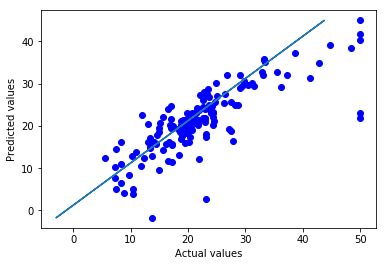

In [32]:
plt.scatter(y_test,y_predicted, color=['b'])
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# plt.text(30, 20, 'R-squared = %0.2f' % r_squared)
plt.plot(np.dot(X_test,clf.coef_), y_predicted)
#plt.plot(np.dot(X_test,w.T).reshape(len(np.dot(X_test,w.T)),), y.reshape(len(y),), color='#58b970', label='Regression Line')

plt.show()


# SGD Implementation

In [18]:
import numpy as np
initial_b = 0.0
initial_w = np.random.randn(1,13)
#initial_w = np.zeros([1,13])

In [68]:
def stochasticGradientDescent(X,y,w_current,b_current,iters,learningRate, batch_size=20):
        
    '''stochastic gradient descent  algorithm to be used to find minimal value of 
       the function named costfunc'''
    
    global cost_hist,w_hist_sgd
    cost_hist = np.zeros(iters)
    cost_coef_val = []
    N = (len(X))
    epoch = int(len(X)/batch_size)
    step = 0
    for i in range(iters):
        cost = 0.0
        for j in range(epoch):            
            index = np.random.randint(0,N)
            y_current = X[index, :] @ w_current.T + b_current
            w_gradient = -(2/N) * X[index, :] * (y[index, :].reshape(1, -1).T - y_current)
            b_gradient = -(2/N) * np.sum(y[index, :].reshape(1, -1).T - y_current)
            w_current = w_current - (learningRate * w_gradient)
            b_current = b_current - (learningRate * b_gradient)
            cost += costfunc(b_current,w_current,X[index, :],y[index, :])
        cost_hist[i] = cost
        print(cost_hist[i])
        step += 1
        cost_coef_val.append((cost_hist[i],w_current,b_current, step))
    return sorted(cost_coef_val)[0]

c,w,b,step = stochasticGradientDescent(X_train,np.transpose(np.array(y_train).reshape(1, -1)),initial_w,initial_b,50000,.0001)

150.24126738700028
113.36204637987198
186.91474493805333
288.3403139504077
362.4234115028092
151.02740035704824
292.7386492437624
235.44712851790374
279.67341716695717
201.35448675911175
251.18805771852982
252.18946603934666
184.35246309955713
112.9034656063654
229.48396487117904
205.21987164723
156.09104249148334
177.41133600135677
198.07293295859856
167.50885122576065
200.2028400026273
220.32313781667057
209.81589488883125
223.13277570245833
244.80388536988548
240.72810541807382
270.03534463029985
284.37732883962065
112.01056395593267
186.4532913035086
160.68129815869935
238.33695857741003
324.21361399700424
225.0044320421123
265.6604347630398
282.1372295449211
246.76446503220487
162.8851526440515
206.78516092712127
230.66735733451668
97.68408003258189
163.1871236284858
184.69990247129655
186.89154525624053
169.8320976688045
201.8928413179388
161.19855650602437
361.6693819307601
120.2150378527681
274.7048271498083
213.98227859269196
256.6382670782713
274.08953188972214
108.3292657575

202.9214401694618
224.2878413071124
202.7591985236256
107.3321210499252
277.6463646754228
280.41254278266126
241.23641552109999
156.3292449058104
158.84279129452995
271.095564248831
186.96463014980782
167.011083126836
194.83144429407193
174.77376853852843
139.02880664157252
274.99386756530527
185.8301288551832
266.18656436997117
119.59860591581459
159.64120723249172
87.4664257727637
128.213941331551
101.8698577929524
163.04027300643287
211.91155067583563
224.37824921580312
171.39676278405028
187.11610277414357
193.13673382914186
131.69300946673022
144.7882764807382
162.39883080951955
103.60705093111437
139.8241732586753
172.56792030265302
201.60266360136748
206.1180992435207
170.67059745870966
106.28339333334881
306.963702815308
108.84314784524294
267.61830257675564
106.98172430969447
146.17598180832604
217.28195315790842
130.2059763309798
114.49429637246625
257.39185025394625
161.80618821479464
207.00470687279164
116.79936071463011
118.32213779581836
106.3271632161212
245.219893264793

164.92551485548472
239.98831870153657
224.45361664554272
119.72292224875547
208.2399347249527
262.62269190141797
145.82989989150386
240.84831441386135
238.0495745498252
175.57517199665622
176.69541231581798
194.03400241723824
224.0046052750773
220.48641214563492
200.09399407088517
113.09423620611075
81.49969206368944
155.84977699501215
177.31639992289115
259.28528728134575
111.81911871044304
199.6748692900141
197.05542378869475
120.76440739582767
251.3655619052917
211.91563044911578
78.67524905412456
209.8740963590065
207.04398313387347
156.10391737821325
115.84463411248538
129.45149784833316
196.85186157767063
162.6406340947604
190.31186877409954
129.165091663796
179.3800098858721
122.22812434571507
177.94915707535543
96.90389224040763
184.13361611534285
131.15271949066064
235.52791990478488
201.09983776814727
174.2684234115821
264.20076418451424
145.82850860243846
185.00869836138477
224.96018893127672
153.0281517926494
140.1684887301333
198.05289592666182
204.00022225569924
166.35988

176.72970897353414
110.65884136483419
231.31359402176278
130.28024076453744
216.35073234028863
150.84126612035004
150.08971245352194
223.83718415331055
200.36312691765784
66.2564068473241
122.64023152886004
198.14533751677573
197.0213564566035
178.77301053396909
220.59104851595183
164.6148699295243
181.34731373827498
217.59011198611134
217.71833922822825
166.03532218802815
198.76392179053886
155.78416400427554
185.37874499473935
76.72200126855643
72.34080525723036
153.91161368241265
343.0373939739887
114.07750357827294
121.68139818637732
182.62550124850668
126.03220513458422
120.93159006522822
208.47752168674256
197.50663473935072
154.8766158869201
269.61959521943186
153.06830560285115
106.32631996629812
98.65114481605616
173.62138810467647
93.803117034194
141.28438168564622
219.43269552421873
153.42142534943716
186.44493458987793
188.8423322117292
260.38145128451043
197.02808434389587
227.3606035937
302.4238838551335
118.53539348070366
203.6733672448415
177.00814522068157
210.57328489

54.46802873542989
164.94996537942532
204.13085293335422
126.74429698902544
264.0511761172839
191.4896627710034
65.59319534649259
265.2319860944722
223.27376475090094
107.36474033969847
99.65671955897741
208.28276053080467
210.6061168792746
243.75566124254513
169.86239793574106
57.71401684175233
176.71928044063074
208.88085800141764
124.95027319124344
180.8418169965325
90.93701287629256
55.36411899340932
217.4585054519453
130.71296667729942
162.86860810860267
202.9858581124588
134.34965972978378
149.417843186292
69.03537107994066
164.41095930759263
130.4520661193897
141.3179588607128
146.87786792414434
102.1336848106289
271.75472374444627
121.54013397128175
199.92082678317618
146.16546100707933
212.03982954690025
184.09635635212183
75.52973480307841
129.80178665006596
220.7442496998485
129.39222852817048
122.75466851510583
123.4700192037707
137.1376237377094
124.57486939586309
218.18869232165542
197.62589125601974
251.57296286964853
115.07360239900657
176.61548891458347
214.083193584455

194.96700198174997
232.6498380773914
311.75093951793923
190.88335446793909
231.42786024433508
148.66845371229945
136.99515489399587
108.71229722287583
147.624393741379
284.4668296808262
151.41598384773556
151.0570955014763
194.93001926869914
117.01407706975354
114.35894347399008
131.0441885435398
205.2778662812896
148.80379852324796
215.67431361835273
141.31811640750666
167.94662300038686
256.02283696650875
150.8240809811385
158.50429406785435
112.82799322247426
112.38931525270593
151.07222496397947
107.88127690350635
186.19714605554447
121.1011012091346
124.69952780146905
197.54942272678534
179.0894068392228
125.5574821720601
191.64088147774956
228.75132773047602
241.06348874118666
253.79726995706704
201.54019383824746
122.68888852222359
233.0474137042965
134.1506623787734
199.23871466335848
87.65075717692247
132.41625294228916
208.18119901907403
130.69030379306238
147.17066328521275
240.2728975424104
194.71088184806703
78.11159376498559
147.15706900167308
94.39949271472041
148.452990

89.26916375785615
151.94312501240842
319.91616130244785
88.66013365132144
176.93135634490844
196.03562398133332
124.38236014530338
82.98354202763174
174.64988986798292
136.77732044677373
234.6997839021884
75.59175735011375
98.70344681337737
151.44670706506594
113.75263224934938
102.32258712641003
191.45116923507425
157.8613407968977
157.38664717165622
137.9263368978531
249.74375064982033
297.0254005684305
236.95985868935514
207.8165590246158
133.51159024864938
219.38814686565055
123.98725283628036
127.58849352724431
361.8344434680151
147.0647900051277
154.60180904423237
141.40880130540907
131.90669370899317
83.20288523277337
175.177182550144
122.87169911591748
121.02505731399795
111.85698521250968
203.6581833696122
121.20582512956021
186.4684784101294
210.28165576760583
116.00564269384041
126.49660452188333
144.22502995833085
205.7601139976241
167.24510913340646
175.34349495343662
166.75025463267133
190.8144799996433
107.63820783698895
164.82316751921593
180.9223468737184
222.212306704

83.34606441625381
143.18791449519264
140.17657375194068
139.0466220417202
83.96551254129291
126.82264613342048
121.45158675764243
159.82093827316822
155.9310313136595
218.60092657133208
171.98041566021425
171.0996986541701
149.6141590807731
275.81189220691056
107.43250703270735
195.60840544315693
169.60996698530187
273.8666588397354
124.49756363569118
143.24850100360325
187.59313719672224
183.0460922788596
185.5627982929137
134.5703354177981
128.78179838334324
198.64451864799125
73.26470186879739
170.6020666959228
177.89507157686558
235.02310783737767
152.70239588031527
267.1067694734403
112.80273389828818
142.1844166406447
160.63063560411504
169.28819427414695
106.91605762881076
242.82550445182147
187.19696877683265
69.3078858653047
150.2774055240795
116.08066912514056
61.033130016894354
58.783695221044454
129.25286315832
131.96232823499045
46.382428628862314
162.91278374857046
166.7966720777234
191.36689654401582
124.91237808752405
136.9666963545945
202.7706730088371
209.130188138355

193.93478490092295
131.66768353598258
140.988006698571
153.55407476284748
179.70142922658033
117.88648295940429
161.58754865291434
188.10296007104265
90.6932246713519
157.0169746376928
163.94623059286548
103.46140724414533
321.8997508616942
151.08866776191425
94.2368084888552
265.75746968715134
128.1818212330877
114.76026060455243
157.1895425299416
181.0867791330669
205.36745236761246
144.22528062403902
69.46661935690487
47.87364992277217
159.38282901838346
136.26096235028908
232.02476214759187
187.47862381732378
113.29971223253024
180.5927562730731
135.12061048445452
173.52226570606362
162.33939906490434
136.7188690405108
203.74377847241084
202.39138711930443
113.38384614607067
214.30704608308196
123.62099717024138
118.74194906110407
111.88874761521731
168.70120444454096
260.67052464703346
91.3657103098398
109.11981654820929
129.9097760369284
76.06341628686323
64.55673027912046
208.3568822256561
149.2735793190223
147.297338105262
104.59037380786393
140.5653352297956
169.85312559540816

123.71179435143065
138.81315676795617
298.7726743696575
143.72276325472717
190.54023624349514
192.64348177646042
138.3173741309745
105.77730721610834
131.0474704583395
103.64732249626638
76.8993041276272
155.842254347258
194.03008508217044
57.56758216670167
99.32566374469364
168.20405133028876
198.5185189425196
145.47387750443758
284.8751503600115
154.82652408808187
92.53425609354365
107.54536882609152
134.19532559053278
58.20495747052894
145.27314725784373
143.0997652791318
91.61129974943883
145.8967035874923
77.84781328714809
41.59782604703076
102.54701496321388
166.75624352107266
130.0312762150322
118.2137716212989
139.22816611246088
98.40927743189664
102.68288196132234
87.87369470180195
230.72955132510114
177.85539368255812
96.44020607420117
149.31978273005967
116.00493107839213
137.6101375068769
154.3441451650761
93.52474571737494
140.0323450968888
56.16534355824486
147.10215943006557
93.61526509960146
110.73346041300834
111.93645963430093
209.98888081540036
88.64344074565304
134.

135.94895739389023
147.76727950548647
130.8068595490521
125.58684629216405
186.606885173314
120.1854574187977
79.616642952121
119.13888574664293
81.2633697901996
107.10733142411819
79.07822880209993
117.93687506612727
130.61590537144005
103.92450526383406
162.06903150348242
108.36503798898143
136.95107598747163
101.04061058775207
102.43620514243356
161.94786349631724
265.48488432732955
155.08212861173456
237.61068999884608
172.4689292177342
137.60335683948975
50.50088749037367
200.75719655831597
208.29864506313817
93.76930313761477
151.1443812655516
75.20540978861938
139.37115039944328
235.86459365561797
95.64565396561278
35.96921050611682
65.57249420446911
128.63322480510766
84.55270626600807
118.03172686086728
193.78711708373217
131.22154980015927
105.47339308908826
181.48129112570004
92.0706995331946
146.47742449563654
231.84780899245922
189.12588006971754
151.40185005207272
191.75139150279145
237.9264313241914
150.75419952932103
103.10312435939288
81.97339881290168
33.9299284686412

165.9743259074755
185.2077737285597
140.29068828148198
88.27482377735434
127.21677521348566
55.75354285790073
180.7555498310932
171.82617316046253
164.48292540056568
172.73149462499987
167.3250690243604
133.35665673820367
198.2648553319828
105.98126381274078
141.39790703684923
170.30156232408123
72.24101045244397
60.44183165997451
145.56316120840125
144.66039157463547
116.23242398708742
148.451617236366
147.809615206811
138.41085241354202
242.46256232193795
141.70737488683037
165.40318362968094
122.6779053863677
100.93310052594626
180.76244166572582
155.38044242854096
136.02121394640886
130.15449232442575
115.5768651071218
107.42493913419852
110.09470604007676
93.80247019115323
125.37291501209612
80.5420225214923
143.79746215279138
160.3702919077387
144.12967850587754
186.2016450994157
62.702793329258455
92.2835574144489
145.86345335888316
97.39816845342241
129.70219926150148
86.05573062485561
151.22891501360792
126.37282346925342
151.67881466383312
82.55730397815495
192.30045873294623

98.27612402907401
162.1937094370016
86.82387952990187
109.04804751472898
157.24451141395303
64.14646441216802
133.5813438916764
81.7626848006532
164.7204573695902
87.99212129800165
100.43310819285412
153.77676681233916
104.35853403023285
74.3015859835174
78.1359179800447
215.19211085262003
61.3859697971609
205.72069785175572
162.47309933616023
176.58332038762376
134.7182364684947
88.65211586307238
79.38394853514242
205.8659460898827
120.02529716368215
82.54329360954333
94.41904711417818
135.19748429311525
107.24105864472361
89.0019755399568
120.58174584482421
120.24380216821164
158.20261952770164
64.31880902442303
85.41099622317958
149.11616174581854
113.8086624860309
91.3902912394235
185.83151024371702
77.22369587083371
249.78380910332
130.61057124433702
105.82309214435546
176.99389933606207
161.92587135289807
102.70560208648574
92.59148400751769
210.57753762206144
146.04304231272945
169.15752868107856
73.60484782013468
98.23932365063037
122.09906090235259
173.51734296190986
96.143221

127.04174147792708
116.55745238564444
51.46416347498125
220.88548278219633
148.44394778188772
301.0249756685486
101.06635071303943
102.6468936953583
85.72347217982515
174.1389471916737
134.01994314713914
143.71890786472738
149.8969555320522
119.47898869197921
117.02260520235944
87.17875573017892
165.07558572098574
108.43015913666392
163.9788937463978
120.71380606056182
228.6843997234437
218.8886174777285
176.19054792673938
136.78438112712502
107.78071246476699
153.47888037990379
160.3004585492518
154.84128904843553
153.08279429045055
169.09957735193512
162.38647098084547
89.89639050054538
112.16489557922979
97.75393998417302
133.24597404416622
70.34932046895308
111.35653181592406
140.35850044185176
102.62080548484676
59.29792425497725
153.71690146672745
93.67207310217728
76.06934825411072
124.96185276840414
165.00331544668114
116.9283764522479
45.91679511643164
112.68613131417483
133.33116035366282
129.41389217975865
187.85136104823263
109.7375111084781
62.13564127222669
101.8515101826

91.09803339753698
116.80549876534192
108.1293806127262
76.69406959632809
157.68415965945377
81.26822905847483
190.44559443102756
121.5717009221672
119.32250716443596
116.05948591830816
140.53403676154085
103.44367041566348
133.47379250709048
150.85919351687667
112.93339151410713
61.22429436205131
178.09642226272788
95.35261417103965
113.3925039433705
133.40151155170713
96.17989729203619
148.66524770826442
130.52882840185916
231.26409573314587
67.34879398592658
80.4419288338667
61.43326144173593
144.55322721746646
85.01364992481724
119.00521557765319
137.61746533587078
67.666042081144
97.57948732907185
110.7664332733405
153.59421089584012
153.7922714974318
88.4449756500052
76.39651595980261
137.00036942607613
124.84915348821137
83.62934080546741
87.31890337498724
167.75705601218579
137.78530549381466
221.84798076462954
184.57215938323668
112.57661020157492
71.45786928725364
67.80032275697027
55.469351139254286
157.30031130547871
113.2805376135374
62.02210274405012
175.2831924600096
102.

44.79014410174944
108.48455717929744
95.98414175590759
108.83927140823967
113.39121372259947
101.58407884429039
80.02483241980521
103.16301941769245
114.05829976592837
277.7675441908902
90.30368483158126
67.46290179556037
193.4014548076786
119.23293986158653
61.57367632990138
82.85444399287852
90.25648601731127
151.35068757338848
172.86636555161664
75.77074461563723
162.0320081040744
25.509345346855035
88.4400778827902
97.73355965816519
127.80580722573653
82.99884503930559
152.80094614016804
107.91938664341806
73.78826676881881
110.54505963810504
84.64849668681569
96.44002409150222
57.02268927099404
122.76437502077425
128.75531498865487
123.82285287148838
174.48732221088184
98.74402203702417
68.4650903812643
80.82447225080334
57.624168345500024
89.70353950148615
161.145447195873
102.7073177112662
199.28077031492793
88.35839597150118
97.30657382333094
101.1754614275125
83.91578001328955
81.61406156300312
260.91821267309723
87.26017979521352
189.63167324769375
187.39230191514676
213.8249

183.76933306649906
126.4734925308571
103.02548983437649
118.84147056032671
98.0734182282571
212.96612397271196
95.32928741046197
127.6275017408509
89.87442713308437
87.6043713619218
105.70792497221183
100.6894798994621
62.8232497643672
135.5825376407538
78.25220122252188
157.90573025080545
105.05231084805388
218.68782315785876
74.24062586564114
36.89033561434108
156.95043347609348
200.9563054766475
92.67180538059809
68.28557778717405
90.09446315480285
44.832080066449315
124.32229835397344
203.19340764896313
153.15374973459066
105.32871716733726
162.16383680181596
64.83413323426693
91.76408137529198
188.31027929343645
69.92069715515271
101.04004431344724
205.9721839455271
57.942114505318344
104.71990404175382
116.93545975204812
173.74013953793693
73.44856373612544
44.12820100009926
116.05648131599652
163.02293990027437
108.63530198051966
95.29100564157727
129.86114082749398
71.81000463914127
186.9839054328281
128.9835343406111
118.29407697719259
175.8612070513931
48.31372842095878
92.33

140.53441389732842
81.33532283872273
49.99532115077842
76.958410175079
76.86631819588385
109.36052635575811
134.93312943269908
100.10167223549159
91.06964713025155
170.4345314974729
114.23800407030389
139.79345995826895
83.0208367523925
160.67282582746256
74.89253862216998
125.80096364772862
123.62371094692129
94.30693348585491
181.47518589690924
77.02563493765416
122.16587671856982
127.36670281908081
71.58736027224826
83.97495841601481
103.40819304071732
87.24369541291517
146.68409135878116
115.5225503676356
42.28845633353092
63.570491900700276
182.83635722797837
75.52357625588655
98.34477858142134
199.07780297890665
99.33605810319847
239.20971249409644
120.68485125244106
82.22179465563464
97.11914965961356
61.22011612364488
61.96595809605823
111.94654795624604
108.67662173581218
112.62628836433124
172.4649537929809
97.81636122838283
164.9652287413422
151.2768469831827
80.48295418324408
93.56961754438423
76.01740434002754
89.05948366281743
50.25163337878101
186.130845430773
23.0944446

82.44148680033362
152.7952700740214
54.36845673016441
113.14959398316181
129.88219743463304
28.97990483307804
75.29151266380792
59.42446369756248
79.23934585716876
141.51557437221493
62.881305959776434
206.19370120211022
102.88990722587404
135.4369622345417
61.0469902762756
107.44383071584916
126.79183111622947
87.58198530065302
82.80678645527848
63.44530001521156
151.05248546464844
59.23105435911661
158.06999229282883
108.00047639621097
80.32163495397552
94.80579805882503
108.07021597599176
58.72120570174085
87.20976158067859
136.01980590779812
52.26431962495054
127.87302077066383
49.22002265588152
74.98494643680944
45.94608098657022
103.378910671911
147.23688092933205
102.50164925894723
207.34683421073575
72.0309311886693
110.49589658542448
39.49406041748283
143.56314864684856
100.20640671428444
158.9395739184032
83.21107636412823
51.90285483198235
24.061547654812657
70.06107557004934
138.7509455949737
121.38928379392837
107.11288178502289
119.35416017024613
92.76961400645914
103.123

163.33701051635336
94.46827900001252
87.73480823734756
125.66428661312705
200.80279460808902
72.03874456279313
170.33069514349188
115.23332357586801
115.81842698647647
139.39428763757888
50.6867939622588
121.97014565100697
126.58345735515074
204.56589728508752
113.61531975961545
142.9712967582245
178.3862530636845
74.50308368639332
108.84146545371893
141.57100901342042
92.94986904718972
100.92563916388616
88.11835370565346
89.2512847952906
108.0650255818502
183.80245604926395
140.40394826101516
94.50864654676217
96.90614513444262
81.95655960581665
111.32497466574281
109.08338303382962
103.4194171400265
70.92252515436041
245.7573807366763
103.23670116762403
111.17190683465147
109.61302919945352
74.35301401734343
54.9328660889909
79.73364912127482
64.41199931668486
65.98442917506827
54.29665215947057
105.55716983316977
112.4793594781674
79.70189501218121
103.53966715557235
93.95767737306255
104.36440334368847
44.830498024838434
70.33378833645304
102.72403633228203
142.0390306378674
59.00

150.09834913619898
169.32664285102075
124.24087389900029
133.56190015745585
81.39552982971155
69.60952143124675
290.85246887811985
121.83762498918816
58.78572042380765
76.20868890142694
130.02008022200528
91.00230903417057
75.49743047810728
137.39213695979964
180.2476558415138
18.163430949664765
79.51976334392303
33.05163042113038
71.19544214057578
61.99007733770804
75.9223171207987
45.78822562195724
72.14167346529436
120.97433776742093
73.79306295516609
123.24168746567736
99.58988679017094
98.51014371496365
120.21510863582284
164.34528348696986
101.37542495434448
94.07224894144613
89.32149291549034
172.51865846211058
129.9075463846171
63.53732361805641
224.7716784115474
59.14541186577808
163.08155337730136
133.0847084986071
84.578370919976
48.90172179528815
23.615594896675212
66.83899051045455
185.03606325170801
81.43201392645102
136.57829671082743
106.3398942057527
53.79254939277417
63.854825527125584
46.009874616918054
110.10338577410678
104.5790758398284
144.5687603620156
91.212102

139.94663088833107
74.33577890014985
61.96653504238116
69.020367991596
81.72162340086604
60.22803640132631
35.23171130078146
79.66111290167014
47.5184007242124
136.6541916234667
43.52248657326203
103.76580206883477
171.68200062203678
47.85142055361344
108.63500288765674
74.69344564881452
93.13583756209204
55.51407651878529
68.10224511321148
48.853560858112345
54.708485926553124
114.28391914156246
114.50985406748285
61.591798815797056
101.5738193190984
58.731502595684574
206.90952886469563
65.66367413510136
168.603642986324
60.63521149368153
68.35423753274343
170.2771279661342
81.45041069946467
72.23540896740852
76.37756024213161
83.6759181882033
55.277367714981665
93.36798827144302
115.96632489242268
44.40531408175893
105.77976095159075
154.40891067519203
187.618085809709
169.4554860334365
211.53648494811952
35.46664859918461
37.86907141617114
80.77184574207853
107.5278193988727
100.11442520139722
88.94378770310247
107.32070310881252
38.16497358268673
123.59445549581942
60.519568696015

80.20286991774375
74.78873586596727
261.6942206581485
140.50582242710675
118.79285911367768
65.96645256598356
131.3212479675014
125.28170282825289
136.460873122083
228.1093505487578
60.02625104145185
52.89436692213455
65.39676892173618
97.69460289540432
53.81272933567739
126.7872175185558
36.89979622462158
22.64828624261075
67.23595571001087
84.5177108052411
98.25916557621932
62.871532180061365
95.2149863341259
120.5131589333937
139.0953753567225
117.59530515728535
55.04630815600067
149.53690113698727
73.05960517502395
47.43555235499181
108.13325272279965
127.79332016219065
110.960609271912
50.37281007717741
144.60063198634452
133.7546197520349
42.51476153639503
90.85768417878225
76.11095228930677
112.24899769577222
148.8709233872035
40.4092055685695
158.60164603216995
53.96771856430059
53.38755262684055
121.09951710876761
86.7769819653632
66.05184409674682
104.56207703161934
108.33551715720554
162.12430319054522
108.65747833632159
134.4186422208443
100.57273546819148
140.2628825422172

167.39500252328816
60.15484299449653
106.09404840473933
57.15461691792721
71.40754743967236
108.95176834628262
50.00926476336261
118.23934891430832
119.28969299727704
140.66516297108612
48.64240194616643
36.68346203821462
42.44862500693863
113.66168995409295
68.9932672961927
47.06244794380915
102.33589242121009
91.60122277863013
96.13998186964702
90.20427465257447
68.56067204328555
71.7624635065872
67.09575142297459
120.27133474322517
41.539955717030466
72.85226336388571
61.44158893900534
124.81139672398999
141.816357688257
79.51723081425051
155.69870020143523
69.42343610287458
98.82553499504688
83.14818888313292
103.80423706730927
97.71298079600425
110.24035148110097
125.67421977046476
50.59546720315941
80.85883777085978
90.32130052568962
43.1566396811093
86.08437991503507
126.39269511591999
137.90883210421822
93.16300635958174
101.3843036367871
102.62295344196505
98.71514352844981
55.269485359614464
98.32631001940727
114.48564608702355
51.780565951407084
111.28993083742672
99.0387937

143.60654055122535
76.89739789558229
139.75237866256919
38.665002088965565
84.5929529497023
87.86249018848058
103.61446502816842
153.0728134550301
69.40690949515256
71.62136849967249
99.14850587135894
41.98015221978843
149.86409183316675
67.87355391265342
96.95733854893992
97.72217274099441
47.90189102180102
63.360422652809966
89.80591657624504
89.65360158816142
62.66663730489426
98.22448295518112
68.45397073983969
84.43573385099299
28.503840308306224
82.74999049313391
33.050461961855255
68.82227739755189
111.94319974953974
134.80693377042874
110.93063930570155
99.04845957948464
100.87987575974759
149.56674070176544
41.81855383583932
33.36640711003658
105.84980578836367
163.38570095953108
75.39321688298224
132.69759377288548
42.99465568738005
39.767619272585215
69.60340204688872
58.306106352525546
59.554590486754904
49.007683453769666
89.1544348488466
104.44870992993587
188.30813648373277
99.16096451108197
54.92603908613741
48.55901290654348
34.172198196284945
154.6799225674537
113.914

49.4176009947152
89.89646127987879
56.2198799145934
218.35548826589883
49.95600491985342
119.44229918858802
56.480299915498016
120.06099001313083
95.59683770706297
145.44201205230837
44.564982337312905
113.42414461222242
61.091643697786516
59.45649128262278
49.569960221102804
36.78247666764459
96.97085764820358
81.61999104260913
21.412435790440707
66.84300259283064
97.50650778838416
114.89290039249504
84.4901588390899
111.3711415931952
61.72299777214405
128.0658151990329
93.07986187847986
59.9828155148646
106.42209185716833
92.65081889930465
76.86189842418403
105.73881726915012
86.79763025170467
58.043718611544755
95.24203547792753
145.98648193508447
59.35467050090562
95.63961223920278
86.77066114311936
54.34575916635268
59.673915845803535
96.07109658063274
69.84126936919077
72.7613222867796
108.86706448175238
48.14021565092828
113.50118039123882
83.44462733598724
31.002426680228155
87.1630706519395
125.57516174098994
30.573708019118758
53.01801760532334
129.23769065562652
90.905657697

54.50905939618268
135.138907148094
51.62749355714103
69.0548675586993
48.183536977323286
66.79865078728119
34.098238731228705
92.42733576627772
51.75399253763118
48.08325721124206
46.352036406048846
96.68080100608572
96.37822260639152
85.68211491371336
124.63539108558025
119.81512442375197
111.59047536459795
79.8731894983297
147.86003107390957
71.4911030495017
64.26227302264437
57.15728765697575
119.88446937842988
47.85363712305307
53.30183845739102
43.124482351845636
156.86218947430342
37.32742142414536
72.26073299278953
101.33208347957391
48.78229546185458
131.90065094285993
127.55924468164959
42.699774061602184
104.42119830787185
88.96450627577103
104.11876765240108
63.95265297401335
87.6978728132551
127.68797821427847
77.41009148910601
63.56101147172549
77.75331499361178
36.602059823251686
67.10901788101336
187.71594228728475
35.21016967445205
39.25001485762392
143.96837489756894
75.79019141883238
113.60118188361726
98.14413957340628
101.1935069312917
54.04915792540967
42.262490473

68.45476837475421
82.1654734710287
81.9525143687541
79.96508192022563
82.43588816568955
47.19602199103636
72.26988931820952
105.48761729886195
113.4833448632895
83.81825366602365
80.26732886182536
47.31145386731861
60.05475613501938
84.01720490927197
72.26570787604105
142.88567097679623
78.74232825987248
37.862705612253656
59.0252212613941
77.77227511521423
129.32399798374902
48.832152343639876
28.266265963890813
54.10181043916179
62.066771483707306
48.13083390814942
98.79335233116112
123.49464572997236
68.42632876579017
69.99926383005668
32.62511275779047
144.40604796856226
137.19824285533656
62.793343616687594
39.56541610339124
82.18514657144217
84.09723379305406
93.06431211631731
91.80711933448767
87.63191555443021
33.130909627694614
47.86342804501306
102.12009581806494
48.34309399360791
54.00923451309445
67.55080675369624
57.207250408631594
23.24017577492062
47.57796142606434
63.129169125004005
34.50635287843023
47.28607806094675
148.24402578771085
78.82727284331794
86.661904068675

125.23678870233708
37.806924609079566
63.21176152940226
57.98934677593482
175.75879625759453
77.60822978624923
73.32237591300816
39.64159626775162
121.81606614027457
78.34539986044874
65.69883990040871
98.70941326906821
80.31960983640033
42.862007690379265
87.3968263533621
46.47933071640826
99.17746648330169
51.838268248973996
100.99208853172645
56.58167945084426
97.85379140183092
111.64680231821987
116.6384127319775
49.31979499780448
70.07141532163473
135.47580936102975
93.4647187502659
93.65314353253237
78.04219355157505
162.99010768959806
42.280002594215134
148.00401076178753
75.42770391721486
66.15023568210489
142.18165216959073
59.14820759431127
37.31768305457854
89.72072546971135
92.90706297268927
79.05263961671581
113.97173741766716
77.10728948654013
126.16128002616595
68.07304506062258
70.82193947847138
61.762346977376616
94.71297948271284
115.41338898659724
73.96833745799877
95.06520350155276
127.03371653916626
69.27787238377657
46.490750908812274
158.11728590376202
39.1541562

43.5109236802294
49.357403255650766
81.47031974609841
191.78171760669764
81.08905024182204
37.05820037760817
91.09494981025497
126.57333153725844
91.26571700277327
135.07409280125927
56.80426055801631
54.25262969986127
62.586240412046344
68.21016961441758
143.02295633132874
76.9699788367891
114.4907739734044
64.24693385209504
65.93624600474294
84.38149997201877
52.53275234634952
97.84983152106696
63.00443858283975
35.23995146187422
63.455933414947616
34.78238220110953
29.7680535623264
61.38700810079532
44.61663135082532
178.40221219650024
108.61635413292477
113.55323076014103
106.86019485999793
104.26755716221214
77.81553831862027
67.67703352255198
203.68228027122353
189.47969851171314
91.15797795789328
76.26047433685692
77.0221392133047
51.32066592946919
29.98742031250396
72.27646902293813
113.20351667275429
39.844024851739704
21.556687250845208
35.585905000993804
22.113978045207066
40.586679569396004
53.94360531747489
84.23670247706983
140.3561913230333
86.2496406460575
54.8289941591

50.920410854674934
45.643605313903905
59.90886272279685
110.74972238804735
36.105694933408486
34.34106056277936
51.90571182369341
91.72729202532649
58.37078051301916
77.64783758969006
86.56272482990407
57.386878385112595
51.26727700147306
57.32769757599443
100.1625167806057
32.76022459264127
49.59978964716609
64.88889549027665
82.94826137628466
150.02240334601237
89.95063726286648
108.21349211663446
48.39093207499538
94.86744392260158
125.72007942222186
61.81401853115426
59.850704629233256
46.77580184455729
71.14196920836126
21.997265327900525
19.051518498134236
42.82379157850713
92.35426210096917
127.09612556305586
25.19313702895043
35.593661588051134
67.54181680049744
148.76471750429627
52.8435796640805
26.16772183248237
37.62617609179694
26.147145427986455
50.82646267173732
109.71807870712229
47.23847524839857
85.7448526079381
52.66696820619459
51.67777610534396
70.26271519882268
99.89942597587276
45.62179301787641
80.438060063457
51.17634041767258
77.2689437538625
110.1596196086658

67.6536661758408
59.40143197936192
125.31202069676198
82.25984467572103
70.51307758163756
92.2032198524914
71.80781531036273
65.6908853661112
123.1059328772421
82.20879870139669
108.0572139632966
67.73626433387392
56.80265054207112
72.88126292691261
57.015570497858086
40.993122399380724
101.54143506310172
84.34106642612123
80.95625760269385
86.94811966348581
68.66705077053443
35.67514979920214
120.18475587385119
132.24515832827416
138.95022386873788
88.06764632369436
79.88979503227475
63.369268780437245
24.0365867959307
58.23037335341698
44.1764200373098
103.05184724936332
70.91794017436678
58.29500312827427
62.6348832891763
45.50724895772063
49.62460397519676
41.18720266750963
48.88951246472904
67.25371617575968
98.07765722811097
51.90892486271004
154.9895416801281
77.45400211905243
107.98527619693833
113.5507084556323
19.05847704601925
60.60965517143314
37.191313957740405
151.70566612075078
72.77826434637961
51.757855265373394
63.88787204033174
42.09849955839214
79.38563959099307
83.

81.28724562271219
61.899431349831616
94.92750282823462
97.61178278428608
50.59849980946736
57.83569438721038
91.47576837176567
122.77540267552558
82.32797903627136
73.58924372402019
75.04304781917293
53.80057746388553
52.44901729395952
111.53411380353
127.12654369876617
35.81857791534231
87.54146709402943
58.38214582543414
81.77995539022992
69.14643161127552
35.43576519924046
74.18045858960895
89.20250820570698
75.90838043366183
52.4823831729252
45.18387190088288
152.55086468244875
54.15266279930885
23.31741146146442
37.03316934915311
70.7523168600608
162.04917984303634
60.253123231544826
58.37170576022643
23.44354987567604
71.4247026160591
60.98244603377416
41.50387867648271
52.69388231185676
105.5917291698194
32.35032797625126
137.00756923845137
41.87476369448294
58.19885681576929
47.33676056190109
69.03133492536237
45.47847815910476
40.24952856089599
57.84395597845007
56.05818462882483
48.95512206894618
27.402762750287156
43.53945415241474
88.6883601920453
47.707801460885996
80.4392

47.868167665816706
55.46531320132959
96.32235333091684
137.13912455276267
40.159262991927015
114.04965231765487
27.05131258019924
47.572697611303255
79.99404681824609
72.13797933734917
35.16239271598509
27.513761826795037
79.97010641967823
101.5503144125612
40.187385523874525
82.66858221083191
70.81054425955871
93.12685766532813
50.722469314322446
58.1933264513762
83.4744663830209
41.912800591374896
51.813489978894
56.933334696362266
80.09416328750456
122.45203429940624
105.41450319608875
58.364952588582646
85.06771645960971
35.55933879484111
107.2238126545234
88.85412150000073
91.77623730926071
52.84549141793848
53.092491722738295
49.78381861883285
77.98724007100166
59.88557410645697
93.96482185664182
73.06075303237417
20.2959357930569
65.12557722121696
40.14700966500263
120.37488794302523
89.06192914041279
64.55429697066704
90.2641673387058
131.40772588397812
125.85768236620831
113.89038871166683
35.02538280373171
61.295930477947785
46.35439045746811
87.43149823257298
39.803264200449

33.89893065946089
77.25538413106425
140.857516271899
79.93966860564456
90.35410060367903
84.72112971278166
107.95923710149273
55.753201468771195
59.71172553969646
93.74048208425262
33.32950574071483
92.09885126180083
72.41289392081197
141.97235728254023
32.27093707227678
37.065733656249236
84.32286064594577
29.73278495072016
118.39915995806668
21.31829916136362
29.441303477179822
62.61051549032307
88.5600367712416
15.378858528494018
60.60872022117231
23.31436684098567
65.7154166253716
114.85577907260603
65.68308480173484
50.6993523532224
49.010355812271854
32.69338490171459
31.994004268860905
125.19533801343584
138.21840074920277
89.690329847029
81.91067757189157
40.99637907391743
28.212166845379013
42.19299683412347
71.61195591402159
57.128416541355165
71.78282699488862
83.2983365380888
41.64090344643435
61.74492637793525
30.796462741816306
21.188679877344352
92.84800569973416
81.50714035161134
101.00520828537482
67.01213605459505
85.72148699506869
28.009667149024036
53.21512432695731

39.68805588972647
19.08342214135406
40.622789063365104
34.41034179507922
128.29733663768653
62.52455155433721
27.908441475863764
17.706353809148602
123.04607270563909
37.65576532367106
60.85502005939957
50.61447804078312
90.9409609285182
57.41279773752971
97.56282337609045
70.8959767825509
77.7684226769427
81.13768880966846
71.33285367861333
117.3448073391839
82.28483677462665
106.89426415119969
46.176743410104336
100.60957356117768
69.62244881078658
50.47143948903211
54.428781549377035
104.00166145251717
137.4225702164624
79.62470294975387
63.13369399416491
112.7990913236631
74.16970009781478
70.61265396918839
72.21856059251465
139.37058754789095
30.673707418096917
111.46718121059261
35.118898364785686
58.75723289258091
45.00446072579929
62.89689140025894
57.43585458795028
58.39536219588678
98.78195213091564
118.93343302329613
109.10751971001199
69.33750704743692
39.368148425157294
53.24859741077112
42.0045252345553
59.47489735536667
46.23737420788595
50.8897591428445
95.1105097003253

55.78944370891603
27.631670690364896
82.45478346210344
50.93993070941071
50.60252236000431
45.135213183414095
102.93363270112503
66.19225505364484
116.97018418507501
41.28664350032152
116.39562421356548
74.83348108884485
113.13627170408559
82.78785967783399
91.02533088691176
74.85840569566038
65.84704150529879
44.44533631682794
109.0756838938248
59.341429562407725
172.49209956862296
101.29533742777116
55.83172417017909
81.70105644304063
48.489110794526795
59.4416634756698
49.49052602764168
57.32868394768052
80.16742544301472
81.32759226727146
66.45777278170205
57.77800859747868
92.83757606641123
79.22607479369532
89.30448223952375
73.30273861592045
55.38001729145075
78.09642592024754
52.21860613009977
76.98811012635507
101.2222110707276
40.3558558310642
61.15611985349075
60.72136580352308
64.1226345407557
25.807492172171628
32.43752401012098
99.5545678699653
63.242507390716796
45.66793675939396
24.134916459582477
75.76159488367901
112.94487187673575
80.44541646689119
80.37102819872058


37.3031079671155
39.07967259836985
45.14860708773832
111.76633874104698
75.89072055003699
104.7220329966149
61.09867901383064
112.85417965903325
26.49084331554311
111.92196853986972
91.61203889018212
37.50515460648106
54.98686602304282
51.75064083805554
94.20505457194446
36.60931512269473
59.173298377339684
11.2612512928655
168.10523887464888
37.144373802287554
74.78575357561762
28.500280779140105
62.180149031801406
54.4427608517631
67.91426355186526
66.84154515198003
73.84761232310295
19.180453274807906
94.9943855589437
32.0814914172196
66.04400847246269
36.544002008387096
81.1113931063389
52.61017912447952
61.33884629146414
69.68805892985303
35.65481289765528
20.532235292099962
51.13160155633633
53.9309025086301
76.99883543436424
76.55157817612056
182.29334896810707
108.24841832982818
60.231834830509534
139.14949255346247
75.10969957836795
49.144069337603405
31.921845024931535
48.33412363785142
12.839726948481893
77.70755220225287
53.630990959187216
103.98112241783669
25.921812529873

57.612490196535994
53.22048799404911
105.35514567777334
96.90477003516817
27.708547575656443
105.90465298162535
95.74131007977726
70.32512275893808
30.007090752675424
60.30231128091015
51.773585589000625
33.334226478563814
38.58013213579108
90.76516128002554
100.35029475479216
62.61826303615378
50.517725669102404
63.12653523584607
124.4016818515669
96.93802481458425
70.77076000108607
57.16739774745406
38.556996205103324
42.49049701318982
99.9310834306154
58.09692118850806
113.54689496051385
75.90482042659501
152.39989174952632
53.35496039898752
46.33349869084697
41.044981815675214
78.7082595101221
49.23087751652668
44.580126817903206
52.57452750043542
62.056952864352546
101.54953081303422
83.50020700502692
66.3961902897482
32.94500776540318
81.90873788468302
45.73689799191888
68.76072004307672
37.82565758361013
38.17952380353532
87.44921895488561
55.78480507208465
32.00112006984177
30.866279090007897
77.16349041000284
72.69814718196852
58.025003467089384
37.527256188584815
26.205035516

54.88553983537913
33.06196462339223
126.05146714254727
50.65001624135961
74.78255809840329
30.014824035813017
113.97665368994092
105.72779451496659
87.98096135585723
44.92405432426454
77.04846845647675
27.32850114840909
36.91817184163028
62.76571813633009
27.61878446012573
41.32960485390129
81.13876718425814
58.00413809637844
45.231742842929364
72.99160063382058
23.303132235550592
27.754416364258272
45.17078754952226
84.88296845102464
24.6451045030293
84.25032098079411
28.750112952502164
33.244425529903644
84.81384112257919
105.97258945416226
115.21228011682584
18.308997608403796
45.11518816831342
51.38834531737308
143.31120720550487
40.40050007044672
97.79510408569871
95.18124680755072
48.7674522915772
62.707184466330816
57.343030314816396
58.80222779063287
68.0940675680371
67.02407053339952
81.05152542241136
49.90468787029938
72.70178457388026
52.250718966420564
68.74943586702472
62.012906298688385
82.4233286930311
48.44895757093494
59.82142061631132
44.100774754500605
76.24516286249

34.98519003199819
103.31749190069088
41.66007917003825
26.299831896821672
40.69460449573339
32.74173886039681
75.11505812894715
62.21120169268874
12.626847851677528
70.26329294115251
35.379198119816834
72.23708712329653
85.21553871800548
83.18864349402892
62.04249002211818
85.31498335319947
100.48524554638283
98.95953498088164
50.34593336492879
49.955908011607406
121.51704842728407
22.770302975599467
70.66280024095236
61.22560089596908
46.285317205738664
34.34698098419545
46.55158823657964
77.57792340337811
38.361222312289115
84.81183709025561
70.38220252062841
15.904237157056182
81.09496258059487
55.6028546060207
31.441806851497866
134.69516774772563
59.10838342090889
65.12430816458554
57.988475518119856
142.83318071410523
65.42192146908545
47.29487896808109
105.97032578701338
53.94343853784
63.78904445158959
82.69639069769771
40.1225078593143
105.58037628142748
138.45708102543747
57.19703441919639
68.15001422144599
70.84641532787856
98.8909784123445
75.73788459755144
21.2780239556388

87.30883046818464
51.52191844506669
56.20206176287792
50.25279151265522
25.18272939054145
54.08732109286271
41.17531639184397
70.56535367132159
41.67367071120441
46.576593148527245
84.3718220972985
46.82116862151661
109.37675011971359
47.352757719679296
85.77375557195288
54.33354304215911
83.26434288526009
43.475789274793016
66.7574276724513
51.40113980057795
72.43210665685254
89.4222855418333
29.276603797575593
34.864195707032174
54.3567632303551
63.82752765004869
84.36140104844513
62.054512289384206
65.31874228031158
30.107021906719726
92.51581698949148
29.423330347040178
62.71709168256843
212.44536792705426
36.80170235111133
94.16398257146443
76.26023577243842
33.45799566200837
34.78497496377765
45.88295669128604
74.70601289568648
54.3275163566237
115.97243673547361
42.017643820132015
57.549190134237165
99.06679983985461
66.71529076202427
34.97962594528866
90.59079058786851
69.87620752926863
94.8429994611471
28.842228250452674
45.48760329524706
25.58462700288365
53.09146020698423
10

36.193016399785435
29.792869353530314
160.23292848464894
33.5011871570481
28.698352885167967
40.153317184825184
98.61009198979339
14.059596705799274
32.01369903139801
20.153737244574593
80.75487737916114
39.442474702915625
70.38770448331131
46.27436302912902
63.93267462458505
66.93648243229343
124.17635349983027
77.75553016140178
60.61926685489735
85.46057673170856
56.29241220979362
62.53577902151768
72.81623792859655
128.61854474445954
82.76044521806445
58.904324869036266
23.047370063601445
29.952247129704347
37.45825232771459
40.386421057886466
52.907581044145786
146.1038876048897
53.86897144893691
64.36946714616502
36.23983717683319
26.030634589138923
65.13924668485609
56.22196829561304
43.069082760396284
89.92266978136362
84.20780204139847
88.30908789525417
85.19439306781065
50.932747924884815
67.44943019623456
28.228014261874012
28.805345316590028
55.5258048840923
62.17359253649036
41.21572971341646
41.830068619184324
53.975551691909565
69.8070409851435
81.49981318901473
137.20253

43.15040239487244
63.21978731025713
56.15061017087059
96.16659580466326
31.691466933279656
16.846609531159423
23.279529422934598
56.01810130444668
29.301599156122858
72.16541262175988
72.72137142343959
43.674243495631636
18.199898844286064
93.15484821407313
94.28469430533855
63.52096165068008
87.26735577416403
26.01484243381462
66.00449483325089
58.933399680345865
127.94127420875236
61.32026847332269
79.77029458581622
81.33117370492664
37.827548515840704
57.025037237373404
34.66104391389459
50.958420258760796
58.64418869234755
68.61448818075108
19.803990119300938
99.2886677592807
95.8961686710028
113.03210547392119
74.46747694456319
164.98297817169194
139.06477059923296
81.26044155747373
116.10830862561225
65.19490568228149
63.95517971654041
42.865227733082804
50.52873251807931
26.935745067261685
34.330264027794776
71.6396745941969
46.7138298897873
72.31969031346848
29.145387539683753
85.44674568320836
35.27079544282107
46.153728133376084
42.30439151694891
83.14724630983939
81.50814265

27.41185984139463
58.122375424668945
58.2923874405705
42.59646482933235
62.39555149982194
67.10614803488045
39.32075813070493
73.08777191710577
34.93723998264649
123.8073405328368
63.59921330711368
41.04717113490393
41.94293344830244
37.99439368056246
28.609850466393393
80.7498047272095
36.0861395945783
44.94860689432008
67.84332737280324
50.31278625651389
20.290230174764655
96.4603682087958
39.654646672790136
82.35642958439603
115.07511288863444
76.49585923291652
34.00108952765302
88.96164510536693
86.67303048200104
48.31782962587762
71.96556642785647
50.24069179907082
20.264990818280367
57.73013468629374
52.4380376295199
88.25400849968293
100.84063912397411
77.72561762429973
19.615169986194914
88.027238628315
89.14710322765185
70.216485044607
86.71820561978201
71.14279033052271
17.44994373600704
53.630930991521666
43.36831593018701
30.819883955475525
92.51280885800742
50.25771958384579
58.96109650427603
20.41913287725701
42.30350528492829
55.26583348569348
24.159515978884418
42.02902

78.72332813030026
148.42039839671637
20.427395870209025
126.56163597569802
17.675591565775758
45.82499231988822
67.52449432486814
39.62631738379062
15.853699571551747
56.061651187658406
77.84122730939379
83.38738902940298
56.324057983839694
30.38677640901451
134.85380922066352
112.51179858887316
73.52172102091953
29.152036372741534
93.86868141065389
101.57896163374353
99.38116957092495
23.974786100114887
38.761933441589214
69.48154419872023
53.21767619456258
56.503383618480186
56.92235431176443
46.05644242538493
56.400282764204064
49.23681132204173
103.36754517186964
51.357005665926536
126.10637180427277
38.95505645123741
113.19087489747413
33.10506097349327
58.71612942215683
55.35640672336019
72.03718661563562
20.498439667902538
50.05026060321461
10.162410427161209
71.20824211046099
8.972448145398307
43.41299267879946
9.635812196380328
81.97706851291336
69.10932909284149
66.72301500239949
13.610811004242253
48.1313541530269
25.279978094217583
28.266348372381607
59.50570475349994
91.60

28.75026802567976
45.67066345100025
16.818572750161703
23.85880816030744
26.592879868622365
11.504387478701327
81.572095005947
67.87259259759803
50.29814778476049
30.680910379774097
63.04312544887559
27.284654241613648
95.16177290616811
27.862399012576436
51.497489163184305
54.173226924347
99.34978484968096
65.97778611732257
42.05146863590764
28.50585834738002
97.65228189681429
73.57646335938642
18.426523403062074
81.37633952549662
56.30314220552768
72.80789831803355
81.93608086918263
121.74825674987942
89.7614192236135
90.56208268925818
115.27186184965184
45.287612092396216
37.32946414876555
54.08734209217461
57.13285625120488
86.2045469444145
21.661019510044976
17.262128417073324
76.41673531441339
15.114503537400097
30.405307863763635
65.56478706767707
19.972985402858633
49.37128339358088
37.522471512672304
30.215282642659698
34.39632812561717
70.76363175929875
51.591696582318626
58.107005783625006
58.60929883695472
13.293699096930206
58.273596377048754
96.9211402304954
92.7450715317

19.35152457529984
44.28676296015072
108.0661149676476
41.4559460257313
9.023103621981257
32.70363870563251
74.77039759818165
29.86188071722356
54.83407544560488
48.73661008406183
75.7131181591911
86.30498604621175
19.717472527868917
30.259718746403948
86.09695210216118
83.34087889496854
28.594215501011444
86.02358849973403
32.94180333002677
37.1469119870877
68.90762976140817
76.73196890169149
56.882258691468465
58.335514869134634
30.799923033863102
76.54843163224783
48.19848788051291
36.23242025936473
117.59493740558857
93.46418874487557
63.61520463278845
82.67120454720832
52.988205023043065
93.3606106204981
75.22466339268342
80.03038791308902
119.83304878549059
34.02448618167999
45.270311939714226
80.06798166776449
34.67916232984794
15.510901902008506
26.646629439453037
55.30929426436935
145.71393961283664
22.213368336032715
74.78474272905034
70.75599078148555
115.24746758173396
21.553689387821404
54.70462561350788
107.6836631380689
32.333812595267375
110.4167620207005
16.962271720716

48.24612344703216
98.26590896933924
38.190116816004455
18.681421191881004
44.433996981172896
50.46432398913312
70.85897028079988
39.461766191844774
25.57328231984167
24.361127199574458
39.478523141405134
94.81255764328667
54.81270188725295
54.84938994123508
71.97808288463973
76.0615724872128
43.572618416818315
65.25062965051899
24.72401717178638
45.06458290196886
164.68407793263614
51.73374983437392
21.557931728211518
150.67523065317442
26.398500028540752
54.295496686041155
68.21416867816531
32.78632751243511
77.87046484330102
92.63912022564857
35.81293175965611
85.24893520762987
74.20296732904175
102.78972655840451
99.67405530662427
58.950850632241306
30.36315700009018
96.76451252819443
72.66090311733237
75.36082349537901
49.17886201771178
35.14488596820843
77.46096093826445
48.05422145555034
46.6761984664873
59.895135388759094
59.90373702590207
23.171978559504847
23.532849821232105
50.79226942037356
34.089939456048604
51.43701517244954
40.537497635882715
64.90535992420679
28.22537696

45.14759887874068
110.30845258472434
68.3666298711922
59.838118182118116
32.27743489682709
64.37798145698204
83.44831158259224
34.014498782792636
66.63566743213694
60.29560490799807
56.888322392044024
72.21372217346018
82.67524016360782
45.59206720867649
19.189413658843
22.310108745475695
55.88808408329529
26.50579295066507
39.70321345769492
18.80361778899748
99.96055128349188
16.03894883535708
47.55255274044027
47.68430904072063
47.879791173572954
38.45708332535604
60.3672692281415
32.37340725675666
43.60307755319294
60.20288676357411
26.98877126439119
96.45227042277023
89.62852539738626
99.10318753838341
49.46213964274829
39.84999476616203
21.183658122066287
126.83945938249124
33.745052232513906
76.91537159730575
25.241853012386127
39.63297341879951
93.81868568753072
17.42042335265097
117.59956774678062
34.487216655966115
59.059268464428165
35.244564121433854
26.42014622819736
20.943275066967193
28.4076483122572
25.558077346684527
45.894526820763986
96.62293888984249
18.2789045841964

57.66856808305493
17.11894234427792
52.686666748445596
104.53790173926902
28.450803027366472
32.98474207322921
53.10147805829692
22.04639858101544
38.23413317262422
55.16083197999631
33.49653817724751
34.55984069961617
27.585742719296437
30.24850885625657
176.50578621190914
87.22013937947636
80.4483518034435
46.49654522198492
19.114445737580045
27.05166075399389
14.625973039835042
56.74408026569083
77.4197055127409
66.63044214196395
26.515553396515447
31.785077600098795
34.34898722474472
167.13579031074119
74.73476256196986
82.20300474186713
149.81618326160566
39.640146691250834
35.80817252070427
74.0373325664387
51.01980618900223
51.060556647144345
109.31303080261716
115.28143012055929
32.438119517144514
92.95021481228522
22.16559824333666
83.279452290821
118.02664189084905
72.77734339043975
24.601470787920046
28.179708426441916
24.06032837536106
49.76274637446045
42.97612989384879
75.28826062764466
107.57172211232313
68.72306143848651
64.65616419828709
40.79956771240496
68.5581732912

40.361582680571026
50.82958255598262
65.64782034930812
33.09125032847405
77.80068376549181
78.24025546953986
91.30669602471423
112.71367777723134
106.52413737861295
65.06572080389398
25.940070851514978
33.61269175708864
45.72338409929298
15.623039634658179
105.30391052259912
62.97080497996468
55.562423900429096
52.161953947386124
22.745913701629537
30.61253528227146
20.941013075840512
25.72830856527105
41.23775542451245
72.79539623815322
21.0117044927939
137.34254974323372
71.51795118457383
96.0793561261255
23.11978785067704
106.3806696134957
40.520667706075095
34.94298900858996
41.75105511939775
43.267293454799585
23.84813785873902
55.02987795766139
45.45827207336552
95.63373730287938
46.66296644680789
62.321716407056925
62.946061408237725
96.3580566033638
20.396390126627264
20.906553279869385
38.776904675904376
27.80762663058047
49.51374683402768
120.15629667312552
26.91131799480095
64.28951134547766
88.45509619952236
57.745965929297576
74.40359535115465
16.795741410575143
43.0619527

130.36814121885763
20.627420547535607
37.7453600466049
95.18044305171198
30.38906560055481
36.6023645351309
90.07334594212948
43.05045090895587
165.7591528442995
33.52131500627769
73.86242493154577
77.88811147325298
49.14681442558138
40.90650130702904
74.12287153875204
21.713228114689084
26.01249172594652
23.294130780760298
21.732538815045288
53.23909727366175
82.72474980916631
57.694773703976075
34.31057489885882
51.005288837350164
76.93596221987215
27.544431168794937
116.9814203824103
111.59227326172247
108.60438766281246
26.78482574606788
33.259449337655276
115.95898377762458
51.43079419675522
49.517498585998254
37.54576379679612
42.30073344042407
53.502415482633154
98.0743995096591
49.79880209612807
18.126652772255568
58.81904434069674
40.57774110860538
63.81166102105965
55.71531718800912
88.61375412335596
86.75870101748774
28.044870352272774
96.24787642903472
49.410756552639306
70.27934070998218
19.81997769095763
25.346852795716256
74.35470681253413
77.80309610512295
75.5050217244

57.61632597311294
50.839713352788856
88.26763332162804
65.17400099354519
47.47381897357099
105.32401287847995
112.74954633843767
28.09246227364573
36.38355195429033
48.390946117714705
80.81560039604582
53.09597926099879
14.686320873527595
86.23463136301632
44.144442847326786
49.00105431817347
84.26735563012308
23.952233480132907
43.658903725374806
61.1395642070311
25.72858198757394
120.46678543738939
65.37788819407128
32.54447415036404
35.69171332951206
47.281220122850065
43.7227871086386
58.45267878001857
58.13632986398339
92.96589641968403
80.64180980352562
26.819114327700856
26.997951755000756
77.86773891694894
25.02430674795783
15.046779394644556
38.94530421318525
52.701366828036655
39.50477815618151
32.69219895306057
21.615489616826785
85.68504852448038
121.51148227435787
29.029541705276888
61.97927586499163
44.849817369541974
19.369037961475712
22.862042273772474
24.462226136278268
47.70778200092325
72.87384736571882
29.179723821257532
57.43708307784895
42.09132678169054
45.45102

42.70800586805807
85.49977950535357
67.77319132200839
26.842454334332523
13.405014166399743
50.0691473354474
50.45644036450977
42.325394012272426
59.06503155334848
78.0602830318623
76.56256354713496
78.56781991149526
62.72643129771649
97.65326860600324
37.680797487243765
104.87875951135503
57.19107678931918
16.5057980172879
99.05657864246459
20.953056935714688
80.2924481551884
65.2552854534922
102.73647579652027
9.477442599011404
41.1142079227662
19.93397042433512
36.905336861001224
22.621090961291415
100.72525235853426
35.74317606078731
16.743222266995346
94.94036640276173
74.10263082883958
181.37890732066614
80.48486000678832
51.73966501953734
61.16679512461007
12.744508679004817
28.614680887610273
26.00253907703264
62.891207139126244
15.94193434494504
33.31511823571567
35.17889072909783
67.7183587141404
51.2043309037759
96.64862604530717
45.4619292342473
49.697861691586446
21.496723599511476
88.59467207420914
34.07680854158369
44.62995729741907
35.104025200863575
22.03794386499973
5

54.84838949269045
36.661692448908134
151.85873485606274
49.77245894313184
55.10916197644668
153.35403645189973
55.07780483752238
68.05573305501453
108.54256501017602
76.82984870818815
72.58536563277927
34.35110049199363
28.86609762609205
13.812193292292141
9.069478430209454
39.45141590334514
85.20275109105444
81.04371314350199
52.197771514979145
45.00670020136846
32.80554660307803
60.68841088345664
36.67574677797229
74.05593035170246
48.862603868747556
25.283081127912148
36.97001468401762
61.7587956016731
57.16616440974721
117.23249647124453
47.454688257298244
44.67479686889397
29.02133481948653
23.300983465231624
98.91397583672885
42.8032967990378
75.03219290378405
20.92404412626304
92.95676596297938
92.09123935616938
28.027475242773612
70.13579064417866
55.60410609330143
28.494854182697537
80.5727569886612
34.34884854643574
55.54190748974935
23.723812837899757
60.207348719779844
17.606551917715613
37.82197774103691
71.41237063871824
55.0036341114618
27.91076490264204
19.4253537523249

63.07487549827583
32.148724185736334
28.363691457302846
31.636578658212358
52.14428952176651
40.50152580741482
29.509656440456084
104.66117854537892
72.62735915311193
20.760550493981974
64.86102653043979
70.93815711044051
48.25333827940841
71.93748156625011
30.541803638939093
120.05740458046239
58.46188962606143
73.93396312012733
30.03884577790551
119.39645319116565
63.45249217677138
49.79048847638711
108.89298101036778
45.276289170912875
104.49111918801351
59.45318321959063
118.14442172861989
37.54070513797208
99.95197156951961
35.007025887880715
71.3538584344375
24.574814128733312
74.89455457172802
41.31923138553981
24.545702336630082
28.80405022527119
59.34990473177483
37.94240377837622
90.09497779932391
69.52628624700213
30.203438892738145
40.496949491571506
31.177628278747807
62.23876909743728
33.09221575246361
36.792264538054354
33.77678078438765
63.15329284936264
39.64497413917678
54.89764637616083
82.12964494309732
50.83846255231007
93.39746484866475
35.197297775315164
64.72969

66.4689757365799
23.034711207710995
22.18547011813618
38.83661898105377
57.593663533374794
25.090021819681525
34.66782906906743
63.84960041399068
42.31720900294839
22.740498333615296
14.081845354640192
90.04994816437369
97.17308686045676
29.13424629969307
57.74571764593648
23.913673349817522
26.503274094483768
14.93320609047339
51.81873016349732
36.96307077766198
57.46968546672144
31.718042418968963
60.44346631136859
54.629653564121
72.65124181225862
64.64823917305633
96.44721761595925
32.54811275841593
19.29670819193421
89.40442825506608
43.34108319001442
51.632032587173924
48.70228834519235
35.392000838480314
14.337952772598102
118.60915562545556
38.35770912225208
133.92205083358238
35.4020568101966
63.605117194104274
27.485538391195202
50.8767120050095
77.0265551216232
70.93175379989346
62.46084802702915
41.77695529802178
32.90552288924657
14.939909257736801
44.647660839862944
65.6212014831949
40.75051234695117
31.224602870210354
15.995901960377285
28.274756194551706
33.969584121577

16.468162204548662
51.679203228349046
35.957034631565236
30.12934937694173
105.4391310474085
71.78792346638448
69.82832842800721
56.705243178687724
69.74126436946386
8.020055901156192
66.28909872579038
54.76431741729757
48.7247215711757
36.006109121708725
44.6194166491388
71.56759719905527
70.40609689091703
94.39637565913615
105.98846629860604
87.21564977489233
33.36847890490645
26.460308588595915
81.12088978758142
111.85171706667077
34.43551942342234
66.65872740747885
48.461835104440965
14.682603165605896
69.80046528682342
52.34478245105007
77.86070791679845
111.17310603560816
37.509018376958345
49.62637047148858
25.462001538930085
35.22675404807253
50.04618686895983
46.05325638206715
92.46783751141888
35.70014695043655
33.19426170675505
49.43931949473316
60.47529759980553
112.0009601629288
36.93437058558606
33.9145918761734
33.40028272408671
108.88061155663105
29.441266993905796
54.421316918574036
67.73512105833937
73.38073190065731
31.83366804650033
92.42108880443563
62.910107678054

46.40386180448241
44.25562683434786
57.499820553187
18.170971632241432
29.320892014145493
30.654158642955878
87.71485281465591
18.622775643185395
65.31488552146587
37.3929859571904
10.962806980790045
15.065948146979968
25.800625543242912
57.2262854525889
111.83936390926472
46.22835077169406
58.97891360091955
25.511421400861504
134.60057504810177
30.61831242020919
73.50567220369643
108.03387721840406
44.45343358514694
56.41502339621765
91.62327493734495
47.32704229166074
19.717838804455297
84.50767998303462
35.269686401423044
90.0849843991947
22.225142152611504
45.48418726096115
36.36286982855665
20.38806506297558
38.19151674233012
55.31000503078353
10.959999532399163
48.14361318117747
30.851763069860986
51.785505337994046
34.25436073907436
61.4994039328499
136.94589598507727
92.77648321582203
77.27347932583305
48.58504346309896
34.942523410754134
44.58405191442199
60.512675983174134
49.45663243931766
54.74581703790839
22.975873824980194
47.23326939310474
101.00520270224746
64.968100830

77.32560431506194
23.193663366559708
11.03831973584977
33.69050080002229
42.64783225088305
58.00862535015112
32.950095498315825
45.511205611054585
137.3777359827727
45.95636331593803
40.10745219279936
20.330019456890607
76.94343090827319
52.16499444877941
17.670523536594963
44.16584039443368
53.21593239994
27.467441088276782
124.95710800787477
77.44011003740236
111.39915095946662
69.52591153164298
32.57196131544056
21.182399908857917
25.55572533381892
30.257776467299873
23.59422905902962
22.735831083219242
29.617344387283488
26.983290002429715
41.986331115395366
62.53650741506918
48.69771091506398
42.90351218105954
34.42442792530162
23.26573164461985
31.89073108870998
38.49227590165038
54.00246213836136
22.30346296048002
72.22910510352239
17.3453213522371
41.673708350493754
50.76178633321264
15.767364816754574
73.79423336892656
20.152168156054447
31.176493832026317
26.046692836383606
18.463082591739173
51.38994927315937
46.06016859943576
69.83589707542345
55.88582384417549
94.480222835

19.554331340355457
29.74717878236897
86.77770964011141
30.616664605651227
138.25112781173638
101.43937802309632
92.4016895057137
36.10770767314444
33.645221260139294
21.17172556799407
71.10513813816159
44.33173673913827
58.59502985292361
63.938546790588944
55.374581036490845
14.386019086534954
90.55433529195136
41.24961650165439
26.42955179626935
87.5982591635028
60.842518265145515
30.876523784126707
43.16238205027297
44.95856064589154
20.550636680265892
66.45507051132111
71.1197772950037
52.155285614627935
28.32363046480568
79.76507713881735
35.28959019168613
39.56206851482378
36.4597940221404
47.27440574682164
36.499512224444366
57.89804876708757
40.30043770778638
19.31449511999222
26.16865677533094
31.986777167885414
27.863885175422364
48.5172511552129
79.0589325027421
95.69878594631616
16.043937561124494
56.20701404122306
29.592914324605907
20.55447509241021
31.388951170779425
98.44846416513724
14.448437676568167
51.60808912656416
80.59100602389927
27.307698239055043
16.42673295640

29.010356684707673
37.16590902218014
43.391453168262345
32.90896714683144
52.16079203454626
25.71376714287202
59.672247232713815
83.10269418019013
35.29368113648116
62.779355870393516
29.631663600358007
82.8081673669239
10.686870464950744
16.239922127076987
35.235389668540996
61.24848077202819
36.13178278528693
46.358577994292496
16.043670527338108
29.247134891864512
40.21885250076124
40.34910964997849
50.32474827255852
55.449061840299784
70.28103561166402
31.045399567736293
42.77825308502925
50.06732692511307
110.77890638257654
91.23806387346103
33.65355635872473
56.63606722621816
38.24529731102698
90.14620389283417
105.8941063875421
51.03790368869533
32.51373143076732
37.88832586861852
92.74534698895808
40.184605942780784
50.07336608810481
63.69249988515975
55.450284805551526
40.82876522190663
58.85335548370138
54.44044061111632
112.50853522557561
63.56203530422155
28.68732725013976
30.6661859754843
48.072408269080604
18.207752215112965
108.25672349584346
22.750262108107076
35.844581

44.484076704281264
44.97731876947147
64.01898619533914
73.76139053283967
35.6046445178692
75.65623221677761
41.315542828294184
18.597015376483483
19.67469095356069
28.414114034787076
66.64101360868504
79.33412281216279
38.53375920876808
43.22281772761995
11.78874213616868
61.79451548587902
39.178420179177664
120.36670009056225
36.790806203061024
47.7840581653221
49.970329153517504
40.114957546378704
66.43266115209957
20.02164778709246
58.559152801491685
9.094424876268294
18.813572862783474
16.940352528617588
49.86442061954049
81.94693190062446
39.89687978844877
97.49290165553492
42.94428718096843
52.2278144127036
26.599819161094423
18.489507622006254
43.04062583011999
64.77782400863536
35.10406544280373
65.02793486478213
49.34164602544901
35.90948345531869
51.48362045556149
43.469690008702024
22.00677186730219
23.57174381251166
20.90791924915297
27.776033136241605
50.31037963735401
42.749356944310136
53.22604383592917
40.70379803296983
32.48501657783581
58.11524069403511
45.42845659816

33.11900546351032
35.53223053509181
36.328972846475764
32.23324428252282
47.153510774724936
47.87290493832047
33.3320190834678
18.40919185506132
52.28040818896669
102.51804395701733
110.9128760977901
29.162557277672693
52.28223265560914
31.66873548640592
38.807851124295766
21.094593490611256
69.57081752535355
33.92490074142898
45.54359175600604
66.25905409436007
103.9151113523329
99.17240081672895
15.219230535631603
17.603035702590603
88.02390393260461
85.84620011925931
77.48026007223966
53.940885760990376
51.19591024901968
36.61351004718442
30.368391617049006
50.99087561452844
47.54302716604763
16.682220214080314
15.942850707876365
92.1433792973223
24.963201536223856
91.22931627833867
34.760522450733
12.39609906060254
50.07647012595291
20.141125438117307
27.585123050799627
29.67375524000082
21.400081445111052
34.239080532097496
80.65068986797158
20.963041983863512
20.938575918489352
23.472012569581832
26.132071174707797
23.55595660831092
43.93370237455246
11.68142679727386
27.65508465

91.44739742213278
31.890240560939603
92.01519271235081
83.23896202694944
23.761936261772764
123.42165206592387
53.98819102472703
49.350633994452735
14.136893363387557
61.181593601696775
29.312320979614302
78.7868238746151
108.18412696232834
26.35686428628068
48.04692714995361
18.178982604413402
48.452170957229484
52.72825800075421
43.862900059254585
12.86134639545326
48.448759551852724
77.89544426465834
67.54070504856512
58.22011555086374
15.562297530708854
69.93970300611703
33.801143899862176
89.80030103870202
31.43340821800919
41.467904214341196
80.85773534131842
34.617943554176286
124.85301840298966
40.925943230396534
76.37992390284654
49.61561516457667
31.118912019144794
16.444642144395477
130.62319422703865
48.99298729555627
18.421291571333562
53.67110241743002
99.4013788855911
130.5979081205923
18.076434969281813
86.6660000902913
78.41725338174619
104.10088663353663
61.246657343351295
32.22228364814728
44.832759579462575
59.916292638237756
48.393639338397215
81.58858402604544
48.

60.87228848685314
43.791713041406155
38.1704938761605
90.43532329823772
54.64184670910142
93.61117946916673
40.01095653185116
88.62965825041387
86.27197432306356
32.870336335999355
26.693049420883725
8.862303036445011
58.92871237695772
30.47697506309209
70.33057106330206
65.58778775634136
58.906936755041166
47.226746514262686
16.76508788052726
58.699464219612665
47.31844825227609
97.3186675425594
54.903467253717444
73.06911522375164
50.15765698902648
43.337042697155866
107.30352482247694
43.087825566573834
14.058631402172164
65.82485017234278
54.422556197226825
39.127331960840934
76.49508330884889
20.465913011686165
44.782588184192804
95.67196380047818
18.173807448670164
63.7215198098841
83.11582918042502
48.40814465316838
70.62586919518651
105.34448189550552
69.02514212053336
60.39212198002089
64.38824107709803
101.53227276164941
56.733945874452274
21.600280272531517
78.32096495767951
58.38786069452202
94.53313921923396
80.10288179150781
50.121305357091195
45.83126786648351
68.3988471

100.7430852705801
26.272944824209997
48.186195609106726
64.86251213442827
38.49492579034522
91.86418597866086
31.13883882950744
39.47893290538604
60.3909859117924
20.72699729169572
91.89211943497259
36.25045362628093
25.279100220229495
90.44385438777736
31.905547506317482
43.87038888385003
56.40094191641283
19.372180685861114
104.90744447210258
62.08757001932176
17.840876903664178
23.431422666655184
74.0647437498703
34.65312997765067
68.33121134462627
34.38831101797047
34.67488127671129
16.24417379196888
46.40911524756736
45.918640604525045
38.87637581723251
54.790389796890736
39.84983718419715
117.63553473000024
41.69224467880764
54.56429126101304
36.29434945868009
19.690447945195835
27.910143617098203
24.66798590859414
40.87957493944951
20.365824174706738
31.606182845873313
84.80823261333872
73.94750112181944
25.182259014193143
34.993755875734955
35.29560715302573
13.200071926285537
46.56116563273528
23.81206859903558
46.03941335003646
55.404300452183875
14.939234886030656
11.7349247

19.92508742985437
48.64601366643835
35.68814338000239
33.94233523006071
82.23247915725219
41.33700369826331
47.61071020238983
14.136966022182904
41.488528769252156
102.74717520107406
38.89522857389267
135.47343382542593
79.12374154901396
103.0842211385426
58.70557950119251
24.31071367956731
23.326722221161006
62.05745235813982
92.53910163523682
30.99003502119758
42.20162199187873
28.101581324125526
30.633775126010796
52.12102528711343
30.366166077889766
86.05920037375819
21.917110805586553
54.929651403329785
28.78795497452361
32.91854055805402
17.703933017903317
120.72873872899288
56.620801336666275
26.111462875399564
12.233609908745803
33.19321875977438
16.21510771454348
64.59862636061901
42.29373170697716
50.2868494581655
53.84182853587042
18.884351363504724
56.58533242846299
74.48051080047249
57.54817473270664
21.235940424442802
15.206480067584536
61.94259562384425
42.42790160042255
37.942868722787956
95.52138689614435
59.041328467774626
28.358574386402843
42.27892543423786
57.18367

64.76253358852406
67.20571698649206
82.72843195445108
22.97654176588776
21.771649238850728
48.42814767689282
17.97228408369045
36.25232933582507
16.265943187522716
33.79784268916453
40.603493512548305
37.477767158047456
69.6579373935746
58.38633172258534
42.51590213376691
54.82000150750702
93.13205812563531
51.549938864685366
77.80401487840348
14.316730319185742
75.88983181136385
77.86047488967482
59.07576183096153
54.55080998796386
38.57745502016288
32.50095930065075
25.079779638402467
53.26211246922688
37.75078230227145
44.77262664032663
36.93883136952091
15.775652525121272
24.03454220053539
28.94419189003157
29.9480716959349
57.291318522433436
24.69698828396412
39.84071636299844
57.89377486010927
21.9451051712003
28.593738271565016
18.37816519530088
32.61377428065857
51.40687893266346
27.619738788759616
21.331626563359904
88.6499803550892
24.35690039808092
30.38292303175882
104.13210265838431
112.76873245579492
28.230149463838192
26.825843813350126
65.08577936408207
18.9146991738752

77.68764511904014
22.450234103475193
73.25618087329167
25.247171960057756
25.669177636333043
53.64296948972872
26.670069262073575
15.146732423189817
17.498561897229134
28.18145455002712
28.831772506418893
67.23161074901194
62.46876367468056
50.1587242018039
14.131579883040416
37.95599353322743
7.288294145194701
64.15475292611337
70.85422375585797
48.218526263770244
42.123769515289894
90.59855481164884
27.873804484182767
76.01801624869432
46.551401419911414
29.608599544133778
10.506832167175242
76.10709808707038
21.134619572019176
73.06109784621941
122.29688460261278
38.49889079070075
57.14503600516485
73.00581805287622
26.98961423862383
51.92106544259955
90.10570398305161
30.006388627517868
35.47766478029882
29.331651962317377
47.32338625607624
55.60091504191207
88.3227811222646
25.926028362167678
53.89466778368895
30.376981263887227
72.21302218632901
34.07979397820201
45.73373372920018
45.09756309132094
33.757398033591116
20.439008600253423
61.9395279504353
54.6156984479311
67.5689415

141.91084453219125
14.694053926068403
29.49974729388397
54.461411184117416
84.06550480805296
38.31778374982418
37.15690314498946
53.03034249409994
55.13218717606004
34.227258795853054
43.79999832999267
73.52960907014162
70.103415054743
15.60191529190319
64.06323998348826
114.15960316482654
50.10358334091002
35.35299150939054
36.767679545322814
31.975905650932184
44.142017390774654
67.28654269200713
57.376172646453654
57.782473712911006
39.66092791537936
36.073809350268604
23.711703845084724
72.62769581362647
27.77679268992924
60.44490189265067
19.470702477574523
60.5665722672986
70.5356759829095
36.499104681690056
45.46479429564009
38.739174451887074
38.294998112241096
68.81873879864547
41.82239380967744
52.348327980118405
27.088225923440586
19.924073269692375
96.26564183166863
76.87835606093282
72.84060673031169
37.79227817210717
78.4624779342009
49.79481571424129
29.518874403162005
58.60689718397381
26.35757118453825
23.98804977025796
97.23501607865757
58.890926813362874
98.231668615

55.180367841227444
33.553354926188526
34.00603377777095
19.789141522366343
57.220785699875016
26.119281609029944
37.67488320999575
17.08786884049552
26.552750170720667
29.509134526899505
15.24755001839439
44.78484148617643
20.903731111081374
17.49317101394765
123.94713741060734
43.92452614111074
60.074484653286206
35.98458255313171
87.23151314516211
47.04398088627002
61.776147215964684
58.64055833757449
48.252752078858414
22.609876075423085
138.60817146139564
49.00171974251785
72.49712460607716
49.5371380146771
67.73991708139667
43.79589109594936
77.21198946922307
144.9320236897869
68.3401819816405
38.80853328479081
26.231254180249334
19.043923002424798
36.95661244946532
16.45684704373312
69.54709025253166
37.666692285930836
29.906852671259895
70.73428685334531
30.840928750691123
78.03864684627891
148.24759443545364
52.734558519708315
41.42176896652223
26.320182546778852
20.180202412713154
121.80398544121195
26.269397466657992
81.11279915751906
28.258942280843538
25.167012614026923
111

80.77439308565981
54.95462907281384
29.337880626347083
18.363667401219455
25.299238102152145
36.08171249970113
46.734109982375635
55.563667857690604
51.639409501007826
58.36479561921511
25.518261896439583
100.66464788246469
107.8592788504525
33.42879071026762
20.39681193403478
52.11648850821485
40.6628859716948
20.575983631557328
18.28530142229564
65.15715974812788
45.239690425983795
24.546439604418516
36.37110213500719
28.965743459523207
34.111339418547786
21.08952444285194
56.205703051570325
84.6570687353723
39.162403177671536
39.72595504468486
24.575136551220176
23.817285022995428
22.26504544996249
41.18105769482239
54.093516137073706
53.171200895885676
22.68073672793591
124.00302503881511
89.90009916339069
38.534579441612685
26.630358540431196
51.002979261925496
61.3945581223891
48.074192831163735
94.7160182130059
111.82447431961783
30.607918883508564
31.77938062159116
30.157214897749277
38.09582496939481
28.493791491572477
47.925857068671036
88.10180060563741
14.287061836978602
87

34.99852917076099
40.84991440588766
42.18104250286643
25.27365902131357
67.97765284797318
76.57981737228114
66.15498068779262
30.7463045453345
24.877373447607173
78.88863882432304
9.14831282017228
72.67713274211623
19.803950645394146
29.2930470951435
35.226220551009334
67.70781567254093
17.27222238903437
19.196258593045286
23.26421873054897
18.92094577389616
25.019929870570927
34.2665592528316
25.93202244956305
98.62986602045872
34.43634037252413
39.573164860825415
94.12266101134009
26.82933168223092
44.00590728368155
77.66154283601682
31.10025916703889
32.79096397094665
90.25770288762844
26.10856149319443
16.421628621318945
63.60171161532571
48.834421772603584
21.674572210568783
17.990491107038896
45.877627729074945
33.16637997329262
40.971771269998555
35.87275675892178
83.92386643195637
65.48153689300999
42.414264648043876
44.29561517172468
31.822491409032317
43.11774472422164
67.92679095307487
97.94028486352066
35.73226147528551
75.3281414417576
31.658637032298948
120.54278781565037

13.54755477006153
18.407447323623842
31.984204464430952
72.48791281255143
48.97046427510758
40.52981495732233
38.78861766775165
92.67133623157497
50.64458093545933
37.33141814421836
49.972157353952824
68.8662978914927
26.969068342792625
16.599229865859776
59.62369737714156
48.869729825586546
26.08033846359191
52.02154907985731
86.25230593316968
20.59441228177746
31.86981008248198
18.208945016920193
22.830605167215605
48.98115310058138
36.36256311195412
29.600580213500916
68.27433433075159
44.14504629838635
21.400376626171077
26.07907621765697
22.08169689210619
53.777455668616916
123.96911284275322
24.842474065363444
24.0616751772263
67.00997443100849
22.91240812991068
68.82472856509814
117.97717096050411
24.31047549211947
86.41914069820095
42.33696313158197
72.93646777372045
39.01921429364553
19.968018767047628
47.263113358779236
28.818972434643108
27.8557239022274
50.27758977255241
53.97757332765966
46.894510851077456
34.8832390843456
50.048073694884856
11.151903216153949
54.178292881

58.37728298650984
179.93309867859477
34.898773401553896
22.317475432903784
23.539150456987063
27.547078699511616
46.001671858903485
96.08722692338134
49.970977690277685
57.359643344809776
44.42254471764634
26.782394176669705
21.486720978821268
82.5791774274262
140.237832791828
52.80164877894671
19.95350436172859
80.33298379396864
56.360895904660616
22.841338176339647
16.563379605206475
16.911275653230845
25.894276676880185
31.960616073409803
26.75138898940221
58.879616393126724
36.38374340356887
52.23905807459743
12.882216602087778
40.60027682365027
49.6654170061867
23.37988293722207
27.780940889102578
46.176082923871334
41.51170371931035
32.847249567169605
38.98393129670087
17.600818428613376
57.16994849978825
12.523707028270996
4.3847496391686365
52.938946484344854
42.36592804243997
58.54848050827269
34.42286723387697
36.245965233364295
85.86413023664902
30.274166982798807
21.941672458833825
9.509084177827196
78.62958158520277
76.31783575215049
19.593647593473847
78.53925266323816
19

55.74265047232713
22.445217742493533
69.74721449602197
34.496784774431774
43.24580355120848
17.964709451948266
28.8387745591086
61.625743441521735
11.664170962178385
85.12673518457527
29.29498483637389
55.668112109093606
30.05240051485698
17.552183806801953
23.277930492498687
68.87879743783893
16.979397134883918
30.382959051508582
35.29323468749099
66.76475697058225
73.54790708640962
28.05188013082925
22.40854938063905
59.125085883580844
14.152964939377789
61.27347558049487
21.351272358398898
14.798394473068962
40.78545207907504
32.04332970542845
50.16271036203769
53.76600108020719
44.54977346559324
25.155400991172698
29.029931125799397
28.142076307644626
48.47141570072501
23.288946434920227
79.77562659219663
30.979226204650885
25.289287623513605
37.995820184317985
88.77883008279048
31.94016934530865
16.405253322616844
31.193920969224905
75.55152992841096
76.65120612002177
77.77835202764419
63.79857418128411
43.3721948049215
18.7992922580904
34.718198143675885
56.40990735942969
45.2670

14.043349741564043
12.614600398598284
27.881125421304883
85.70017543784027
47.598817854889084
52.71443007460659
38.26750399462709
62.451588911885516
25.46014978178823
19.77695047775029
25.602801693786738
65.43947594750968
45.08581592225069
36.119559140026865
21.236627350154162
62.29187986916654
38.854746481324476
60.42185987474471
43.710001216225336
25.99631568426704
16.667836386443497
17.462157331622116
68.05163168903682
21.581073974539063
28.380890657795906
35.87146009474867
35.31079726780683
17.321062886023437
57.47128521768191
83.85343032951815
32.92216098856668
34.61836284293701
14.088943937105364
54.43946416413135
27.431054680167886
69.46302083568852
45.38288849248703
102.10124514693331
24.601944467738964
21.007329085497492
33.44435653622724
59.93379886066347
48.417080273548265
35.62536860154811
14.659878520700842
21.164007694747493
42.19161246721945
20.320481791343727
14.009757795989147
45.94540046576422
68.57662094491432
46.941455341236015
102.2016775546182
34.74904502074832
23

22.82348799938516
21.919252974282884
11.520247374446779
21.36607352557897
17.326259568826714
20.989620176649108
17.745742200860217
21.902917222195605
64.68272897531577
48.87492048615923
17.70831313216844
82.8087353508275
12.658422156582132
46.80609651208115
79.88322219190187
12.526421259316628
110.82570882918509
103.62609504031879
63.56213216142494
13.723233159857635
42.19390656914014
79.03733935057207
48.18397862109567
24.513407319109934
11.540707820446885
29.505472676657106
34.63830443849207
37.07761830964168
56.152528245311366
25.628306443901344
13.729154897097063
55.9524875481099
54.583424826989464
49.16220952536133
27.439114522618777
30.45929116839754
21.976628277340744
47.342453565260534
45.21919489075953
34.25920980480891
29.435974075995837
26.906368914642364
62.12622776625042
15.68144716589331
50.08573745537996
25.368585223583636
23.217706616256756
52.73513985190171
69.71571480620949
53.457156211534496
77.87726977246899
20.18296223717689
31.975002393323322
19.47448377392796
29.

66.33121865017134
18.8215238988366
33.11196526716147
112.50045288103645
27.00904062390711
77.15547374197307
41.36277154428611
34.73350588911721
26.421652372499732
49.625450289382385
27.166485828057503
25.764989843154236
48.37282446516723
52.50925089698634
39.946388415155056
15.815843701613533
45.54801113749851
90.70996026720883
73.00652674297194
57.951547675464894
27.313179187042202
92.42636022275025
39.92950857002072
48.997190275974255
25.126070524633686
80.63133116248774
22.70627531140124
13.548486393384612
15.173305734908615
74.23346808619607
58.16553218886499
72.56667056753608
24.165702094723137
9.153746041079998
33.590100326336014
15.160587945818651
26.801929764478306
41.28448182472931
36.18658532838761
34.79524776684784
77.72146876230758
71.56985503079633
9.711727284107214
32.192866044395615
34.932074924605395
25.83635998789556
24.272265110666048
47.55497227203944
40.07036311105686
28.85117105353283
89.06703870482326
35.70473408349931
15.174933097215844
32.75141281741497
108.8029

35.89068649543712
39.92646320789042
44.97765377596883
45.56540190678947
58.78725773097086
9.354799787862373
103.27462072678881
19.97551589549258
19.04136216200572
37.333688340635085
38.791431412029006
49.807688256500604
28.888066442503682
13.495393507675354
39.601390032233816
52.853837106364516
57.55998992484747
15.065747101765066
28.27190652223831
9.645755812111226
39.458853482781485
103.53936024734587
35.30240757338557
64.02338085234253
63.17542195419362
61.27283552175593
18.52625096644694
67.01765468146628
57.25397864883871
37.949908703910616
27.102367793913004
27.04275096387929
64.21089679254155
21.435042453602765
37.885419779798916
31.923509463452486
47.75977106570627
83.15474660668501
18.927758455709963
18.001170144584705
19.793441857073102
103.19147973625617
37.77702737485912
32.879543397181344
13.61047943282409
54.1241363484777
58.71823052294177
62.69219293070748
16.599548776958926
119.35568870288499
23.66844402547172
64.83818327791323
21.99674770393903
80.78121302252801
11.299

48.86666082357391
25.6906626933847
45.63643893357274
26.805623134223996
38.137648617671765
44.359941806665105
46.31846604040885
30.815728515795897
61.85458915945903
54.32143624064972
105.53496228821426
30.707814977137293
22.3279896284915
59.072080400425435
58.798438890335404
18.613378898207905
17.954228916638236
33.998645258958206
94.57155363684967
21.60632620928873
34.050666137193936
36.52055319898099
78.70984845622432
14.286489404542044
38.050969715811924
18.02390524389801
18.10348153761569
35.51558876634613
37.94569790495918
103.17991310789037
30.848056510326053
31.355269060073375
38.33254037132243
33.953824476587776
25.57545376548911
20.290755828339833
52.269966746780554
68.33819640406257
12.353689907958293
15.582692892117702
47.20613313645431
66.44416341816536
103.33039944154484
63.44668870730514
114.2794359609052
44.694683444418146
45.530349586984016
65.39715131911166
104.25825121641873
61.17177374206026
92.55655075240168
32.37358819836915
9.521080098511419
60.772941927733555
26.

41.15602982167728
92.18199641462995
24.66049859652516
44.73628255578359
35.18237266016782
23.84601720310326
26.095034914258022
45.69440182700321
43.41478467254383
47.77735859416999
27.031159828381114
40.71948388986804
47.02234240450494
46.233877472892424
24.519060032405584
30.404603285733568
29.69936253390656
17.3659549051977
17.342766594710607
74.30776264166235
12.717738982564853
37.19176671802082
181.31060355115005
51.16448325693328
49.10072749830658
31.281880286934342
78.14387224331624
50.80507456482404
35.81388346309488
37.57596736923863
26.567350401626765
43.679245198769
58.789519830455156
34.913723615470005
58.4275847097336
31.886311488969312
14.20711156645108
26.378650512411614
39.695230522009034
12.217054990550904
119.03417051571111
76.89376668281767
16.57800050360543
13.427681369643613
21.144054734434953
25.353978277591036
47.864964708508495
45.152586709199596
58.31838400769109
51.6433197559342
44.16925048178041
31.703617396184445
18.990961968612382
18.8420993473001
84.3619836

46.36439114573074
15.475121136759515
13.43588814280122
73.68486644427935
17.377461670478006
19.27330235858386
15.697864156033857
61.79044818097806
9.014547015397579
25.25530387113075
21.07417088705273
45.743901038380805
28.330091719872296
79.65251150727717
62.85917588389557
109.60463347010374
32.40853217448822
12.880444450891193
64.45873308267353
32.574997001586844
44.7631318827254
27.933441942950466
34.294828081474016
12.7426749089871
49.74504278531606
55.769613029428555
110.17160106279066
14.679405042886549
25.198184241807454
39.27417547152511
129.4602815940749
44.32865808903721
48.29819742680346
19.063893378520923
67.9875436067371
49.852393691746954
59.21013452375424
23.465900040096788
27.0153244794952
14.906375637393698
43.88743225532291
20.910801996700076
12.659587200016318
38.0023819437703
19.947929427259844
18.67088956251697
47.60081324797969
103.27628707410646
16.374518412489692
42.55147000404959
21.53811351561732
94.75826302141179
42.56841706256431
60.47189815438539
40.2884140

94.97542434431249
34.45908153300031
32.499495049212264
89.93862225065274
85.44495982924028
67.18374560811084
30.353412348392382
20.741413565962596
26.449131847634376
54.084627823178025
79.42924342176823
49.913837441596954
69.29308071208379
44.5179592316225
98.07858893548574
20.193684644355283
138.70467369047236
28.770825346613478
39.854682667066825
67.83386502295735
86.74592561360922
17.74854936770735
38.313640576086456
75.06102553724094
21.215542168099315
79.73001297081598
15.416163607116383
24.446530503891402
78.52435687002271
59.25196964842839
30.23323665566789
21.114577763554333
42.31265590193309
48.08010962077232
41.83573709159242
36.047797912435
40.97554021877675
18.29346450580912
36.81414716211762
21.286090042834985
57.71102031448012
16.140645473314922
19.932320766992124
28.0074718512272
19.18607687161489
13.531439040830133
30.97575193504926
22.257901376871168
15.542186840233601
30.07919619897305
45.35750579188439
49.452017772982984
62.4600202781178
46.018744664440064
10.4106640

16.553395740207954
10.020418035641095
36.855837526404294
21.139373503129196
122.3541451709724
21.401716104588722
48.01821922079014
69.72208142482476
31.257566825783943
55.59730568719672
12.070362188166122
35.87654734753134
13.883929865115308
50.2202506777236
49.51349202756404
84.1898356880724
50.557466514125935
29.790956791134583
36.698146642891764
29.11536035218458
30.853346553097733
34.9406392469168
30.394503520905698
19.45456320011634
28.86105835793349
75.83711833333716
116.35851618717983
44.784449297172024
9.714629841182237
15.712661141833292
23.533887513977355
85.65702552360773
13.580229540274555
68.75868738376813
83.02279979930134
68.84100102683901
91.35426418703766
27.284121011479222
101.390412259138
15.663075431796274
38.896915243891506
52.716048355650116
57.054394261828506
57.039545959305975
16.606298606245396
36.913051916395325
25.2929106716835
86.71202780338926
15.216074854065635
42.29146066113686
11.874450583932584
45.0464395002596
66.64651497406042
49.55523143565503
20.767

17.028937613224194
45.112219610016304
31.866250785690823
53.86145646483058
20.547282139999183
27.105271072330083
46.16275731580806
55.31140026544078
98.93204660591431
27.133025019208258
22.670360245829382
50.22222966052858
42.30248042143015
29.0831803647179
20.942223802530805
28.31052018504629
22.155332377136062
37.55359466002134
82.96007022607986
22.639004078967638
13.277504294980588
16.83764383580015
31.595396263671958
11.03704674162371
10.165063594993132
28.850946400876037
59.83009210838627
60.702667535334896
54.56629639444126
19.144305997672618
41.431390654726684
25.49345964061416
58.152396793071034
35.015955244057174
74.61288903784573
59.41418826239021
29.856659044669563
74.91300500518835
82.40323783491908
63.83381412750045
23.257028214856888
34.637665350508556
26.131281051289875
83.92616037375336
53.269636393532586
91.41495076204498
24.33544483721558
38.1278525569006
39.50072825798665
55.78262347847651
113.99128220711924
69.57301078455453
14.452457275509696
66.07363458566714
30.9

23.117633550338297
93.37981241646507
39.566055562234915
50.724333637922356
17.899849233376127
45.542136634731854
22.97818107856761
20.860844408363224
60.370280370115324
88.61382749257943
48.03068911024269
17.929887314786185
20.42258386583615
82.39115274402101
136.830042431035
29.436659683001842
17.429342400147046
54.055007958229226
21.058317493179185
62.371871561096235
39.980030545173015
69.18479729914084
19.060408271739895
73.7936240145381
18.81396368491186
41.21000194909893
62.299085041479266
43.76016873702038
49.007607036840575
9.385120169197823
27.883657740955194
48.83437635819277
24.234526149106753
40.79424962337427
22.084472415978613
17.79728318501904
17.94532665034036
14.968574770423986
26.58190975026264
64.05915738895814
44.006777236083735
79.83566847023691
115.77763980924243
56.2602790206386
16.178238853795868
34.451505803800174
13.9060723152072
9.991217008206531
34.040030935177036
29.997739109030505
85.63645124683097
54.384471417856446
27.11864036535475
51.84794058107621
16.6

17.621196357119157
37.124296969504876
87.55400337486446
35.960124741625584
39.0135487057723
17.851048752821818
82.64710185901124
60.14919272706641
34.47266077637076
51.21085638167736
33.76594913362555
35.79434721656063
11.879894035427219
41.448689007705966
80.63719256627665
47.57235684551814
58.607291451242375
96.22033488621524
59.092342753172325
38.8493758109009
74.88976616314629
57.49623717986872
14.115428627700636
52.66734385848069
12.143817040701023
11.942801233920928
16.850756861000797
14.024190346595756
45.473434934113506
68.42751117389398
59.69953028547238
54.992796250369366
42.92766225216579
47.459382297950924
91.76043650571528
20.750022121397212
34.42879557333444
80.47382725015868
51.939354592493146
80.1411915622192
49.94778542757137
20.57587233147986
72.50998883685257
28.155335075395676
36.999838351529725
32.26768315100008
29.556102749164292
20.13572886622794
38.72411198283305
16.737391718947755
35.35290239096128
74.48150283886271
70.02754822011516
40.63867243600947
42.010752

22.903339618193524
20.30987891048305
87.90661039452864
48.092377493452574
51.48306217559008
56.975545833375655
26.27238043871742
22.47665405986052
31.994276156265485
76.1917362947424
47.03775792538565
54.139190946387814
31.563851584334998
60.05141061775812
158.5029004552656
34.98814221386983
19.27843345506435
38.40989552644023
47.76941176626449
16.864523595575776
20.25624150326382
61.54097517750031
28.28482365551457
59.77246221958663
41.60899930263872
45.309082346149175
17.097065457506247
96.4530010959673
120.82540628611551
64.90515296245715
34.34728060552314
33.722319275390845
36.31775966922862
13.68991742571483
118.52263742424661
31.173859974168543
30.611047950668784
29.268583742803372
41.589367181508216
10.372153851966441
31.38298720126794
80.15971001784634
26.130141639368006
54.29440713602983
44.03811800761025
17.558935232551487
41.817006527877254
45.27718069117923
35.28216806457862
82.77301752912042
27.584349696595734
31.619451781722358
14.714573869054357
30.365357607566708
58.254

69.87325221359984
31.338418996814713
27.28736479442218
23.532198805765063
14.7017011725002
7.473930668100083
24.747099119208205
99.60309791373362
52.96008590525172
21.133164161602675
26.598793645807692
21.94120130596264
37.6792512417149
8.419229978746595
30.089109574093055
13.704092152394352
29.320746620995486
19.045836394849673
28.038876244902994
18.256861291603734
34.03158013221149
56.71493262596562
22.936146271756414
39.596255088696594
24.981539109653056
18.848421140741745
20.183918904492362
31.859451968113078
52.27275393331229
27.62983663810545
56.73247890929785
72.40627133457726
59.55737170971545
11.32172546565577
68.2292673249968
95.30863878106308
21.033588428655673
69.12263265246942
32.572961993284274
54.58124981573665
31.048770579093343
43.12132046214098
46.13523606279582
22.718564548102815
19.776746146714217
63.30584223667515
39.08063631464312
62.63407007249708
21.21011094646822
49.11052397136448
33.80860751271067
10.944104540053894
30.22030843892709
40.919334768721356
111.592

61.83158554624679
56.0136464969406
66.48447823571465
29.251405411866372
50.61978909858974
22.67959086083961
10.351944318046403
47.83429008421067
23.531028662988454
132.5093813296031
57.6423243152448
33.73780122490205
47.11920667599899
36.75652534991419
15.093630816224016
100.00129059223306
41.03010682564
17.721570727831157
28.12055983318232
29.33878304834963
43.83996951887161
21.03432817987511
21.37427857183065
38.2650128916788
52.68238037550671
20.320820916848593
29.770550714256466
44.493808991265574
55.03647478693869
9.193984070565907
66.61164310656972
58.60853935346594
71.69763196890348
95.34232748940696
12.054412255724758
66.0947615440031
42.45653093493667
22.94322306747594
12.388384164655628
140.1039651690585
22.14220890259775
34.307009197213404
16.20418162146101
26.71498967291518
58.82905648046175
43.07037313865319
70.75106535423039
22.013015037334778
37.35145154154687
51.81524509703647
20.320139545451603
94.7812235654518
27.1096340448067
24.887656177122892
25.89960217271168
22.9

19.42966384980394
23.012741292979285
39.27961548468685
29.75002087839586
57.2803603908202
33.60081500180585
20.76165422770718
68.66241596125653
62.58597364248975
44.04317877771232
67.16603867993017
21.736169865580383
35.86220698961105
94.78962974753269
115.25447606238609
24.187679118753305
29.213068045062563
16.132685772736064
30.952246443342798
42.035888545041814
130.90764055999975
13.803358250985543
35.28271065540535
57.29940655636425
83.99779594677445
23.79902710127668
23.775661023002186
87.20525362548163
15.70326476766123
24.19907237362423
51.59199063434998
52.531478737516046
61.71237430924388
30.12694167507182
21.59967080003854
48.18441004155576
82.56964615170772
25.807205401238
32.11533152738127
25.187281030819122
34.25511576037948
20.701503657851646
28.704107274752648
51.281912223371876
12.134675361631004
26.661239515580792
85.9625569179617
53.19802582627561
45.673681648238954
25.784041970678544
34.03097302142275
46.588790851644745
20.101710649064422
13.696166748030237
52.120242

15.766434908126339
28.38718830971358
101.50365874108468
44.29889867147625
18.940005635951326
11.351720617523442
18.750251199760985
47.08891806398685
35.62515841066272
34.64292381075273
13.652308713369417
66.31590341892108
85.74596711244598
47.41735893351693
92.66891218602454
102.96205328141396
43.792001663973934
22.715247359053844
12.863894994239704
18.49810862658259
51.172858871395576
97.84481573935868
47.653224669531646
73.44654976842435
49.735049170796586
101.459170999367
15.611122864619988
19.72972625399603
39.922107127483976
29.90803754048752
49.63893381034349
23.76326748539351
37.22120623842393
54.19896815150048
53.01562516583045
10.156986001603286
25.09093845150592
78.74054652666584
20.49010016462314
32.439082762120094
44.822431677013
28.74973292166061
37.7763560248887
23.70260251402071
26.019189897212062
21.644862953109172
21.45613551887903
38.694382066394255
14.603154667505208
29.288842298399903
45.229710826270555
13.486184944631066
26.61336611359542
19.191259483375884
58.6186

24.812239582150053
13.84454804130742
19.244871900051333
13.707047995742002
24.338422181469706
10.611268980842734
46.728449701682436
15.941621724775985
39.10357003043602
40.05990789443464
18.792944944200674
21.123803414247796
33.525621168759535
11.47735678997958
54.14056019232864
35.2694470462673
36.24982350485046
36.135645743685856
31.23801173005343
34.11090030651705
36.21724087557125
15.09975060905266
12.945988071893622
22.519933467196278
68.7205999538281
20.36534421051976
40.89459679433272
16.112372430976833
19.763810299160866
80.03388809146618
63.465968119074574
18.284817463822623
19.016750573320206
47.173748188974834
10.516963262201404
44.580726282289795
38.43294030191515
54.8174555249289
34.807507515224366
27.352881063790736
47.265600025193706
57.33065044253896
29.460623711265402
59.79720180004795
32.35391269700088
26.056962808028924
19.859833354252874
32.78522330814009
64.4750280667633
30.61938305846941
59.98553853382135
28.3541855018032
24.662758025829472
23.608601440161447
29.3

24.010630928413374
70.24881614433488
34.06250281586199
24.2372093686784
55.812928449662095
30.296539631970926
41.582250683874456
29.42362292966145
42.219572473361616
16.348887603305847
24.740668713992143
73.12993940354103
53.528632708694374
19.335807406073723
16.28742533601233
30.8735459027769
39.011210985316545
21.887074018709402
61.49281059070049
19.650640832529408
61.33089322854984
27.46260042407962
24.726967318600412
83.21290143074066
90.0411253659968
41.71776606692069
51.770276451428145
19.223937264908212
51.17103013948057
31.313536097345178
85.72954898795972
48.31198331629695
29.293699688596483
65.14306007195253
66.14486697433115
23.88009515560394
62.66566726256017
50.909779071056604
35.9411380814121
50.4299813457989
14.510871208674414
42.81766511316476
46.582637154821654
35.64989624358873
11.063896061757978
80.45873058668835
39.132616342010984
65.38506897340326
71.98717207852538
46.57931137114556
27.268490122439715
44.9832774728183
26.896747277670478
25.924139900593946
30.469184

26.948860643343025
27.325403445826193
50.231256283721486
54.69900978289676
47.049777485880924
43.07428923071159
8.127975884171992
75.48950827805741
30.691009815204755
91.29774079228423
6.992564086542095
98.04052502399364
30.243809807224263
13.374257943407851
61.02888476800422
20.520058248204677
53.61278101644708
13.89062767494961
25.315790458876343
87.73546133285252
17.394802913636116
46.57793287698773
23.23136204332266
31.048093053998485
39.96783450278857
18.755002493700072
15.441522711783984
37.45725580598801
71.62857352590702
15.368131436200894
27.54852015359248
31.737369190335706
19.89995699197486
30.140337653447148
42.06090908486896
25.441307618310947
35.87407444688399
30.25964791678932
44.225719958667355
32.22009284386961
58.648310038706605
29.51414161451909
27.793149059019623
48.19914808309865
80.95545734935958
27.57402624501324
12.78721837351937
29.395488193542082
51.26615548894941
63.18278041319587
87.84265182963675
26.646605831005292
38.48141489266776
34.70709044641124
65.029

60.8468003545867
17.11193097709584
18.633497102101725
47.78945686228839
30.91412694550709
28.36102181611582
95.92910289026227
34.67090504617926
77.2804198940641
48.614822639700655
33.34456330317035
15.17848696343121
19.904760503551064
16.793814852627342
27.42740125238588
17.32349947432178
21.913682909334405
55.84146680466943
52.70070517914636
24.514570527662965
42.864912761942584
71.46347501319404
20.838056760417214
35.265201106747796
29.447626412294355
27.4417167411941
29.67721185152824
27.195217930629603
22.037889663198953
62.31783049563619
44.274446434872175
40.456881756623325
42.858967443642875
85.12338272113884
41.230871483878836
60.92056712255048
69.69654685678972
24.835992866492308
71.93648064382553
29.446564733508218
65.13224024206737
38.10589288185998
39.21022008482393
44.885020383367916
21.818671857083956
26.075812297818107
25.082110788865563
51.137663147575275
67.30386743329211
17.416229405307373
104.77119725801242
122.40932263528316
52.800180156019046
20.221604827384457
17.

17.328607203535753
45.1140340948968
15.074499395625528
36.80954290005165
16.444472641902838
7.465711440933634
13.536488763723163
40.49743467262663
41.384278818947045
10.666696407913324
48.26613747759815
64.34862638650645
47.73234639411921
55.1990813916583
34.94502227252245
43.22611044186424
14.317853161366095
28.80878981173687
12.456353505914844
76.50672262900545
10.781836180094393
48.755720643848306
25.981268528160033
41.86540217632353
22.988789787281227
19.303746924940256
36.465608793444545
118.64284273847494
10.62603984221303
55.575164237409744
29.56212326234159
40.5584534020166
42.93798263108647
53.720041285608666
67.80782056886774
131.45850061551167
13.56646050293189
74.93190276810795
25.30097342803355
107.96635825222229
21.85398722610845
95.88282790930302
40.81103810024521
19.322970202916103
41.493045842530364
55.59016811878153
72.49082606320694
24.859292740798434
32.47417034128424
19.190416006158948
33.0436615541185
25.08987888048016
38.18877884503072
65.79789638559299
23.611031

26.40131589428871
78.01177655332278
96.65635898113634
57.819851213155076
19.812632536512144
60.67615434948641
20.17141077494043
52.34820490912446
64.18552054251734
52.76262240846919
19.90452070586805
39.19885960803673
94.25714860849583
42.243996739824766
88.94727813455086
35.34290496406649
35.00026518714159
28.95323967107441
51.29684725979778
50.40172768344217
28.97948520888408
30.308728580658588
19.227170908121032
59.605625734057476
21.29530372149385
36.79163728802326
58.59812102640585
37.06187042102534
59.00125981138883
35.400288813684476
39.64421378655986
22.570469911805485
38.2880286472263
17.091619653314837
22.098556784071537
14.03082012520097
56.14817894763096
16.95031494897564
77.31502834220568
17.362970910655065
22.18746831520624
50.16279729516786
28.22466320224999
53.07852283300774
92.0479206001651
36.019030675601606
15.298762891009286
79.27876378190439
41.87410718010189
68.78542524701571
154.77892501191383
34.739107219201635
23.627828220169846
19.37337670689185
46.47757052261

Text(0.5,1,'Error vs. Training Epoch')

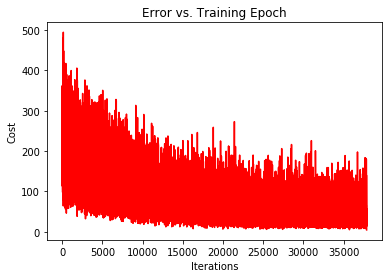

In [69]:
#plot the cost
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()  
ax.plot(np.arange(step), cost_hist[0:step], 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [70]:
# RMSE
sqrt(c)

NameError: name 'sqrt' is not defined

In [71]:
y = np.dot(X_test,w.T) + b

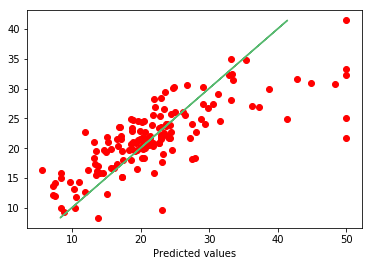

In [72]:
plt.scatter(y_test,y, color=['r'])
plt.xlabel('Actual values')
plt.xlabel('Predicted values')
plt.plot(np.dot(X_test,w.T), y, color='#58b970', label='Regression Line')
plt.show()

# plot both ERRORS

In [638]:
plt_sgd = np.subtract(y_test.values.reshape(-1,1), y)

In [639]:
plt_sgd_sklearn = np.subtract(y_test, y_predicted)

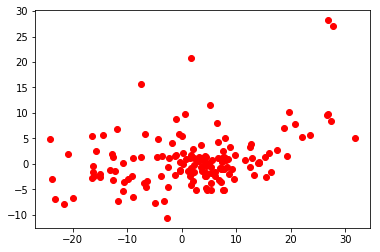

In [640]:
plt.scatter(plt_sgd,plt_sgd_sklearn, color=['r'])

# Conclusion:

In [652]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Algorithm", "RMSE"]
x.add_row(["GD", "8.128291363330543"])
x.add_row(["SGDRegressor","5.21381315810254"])
x.add_row(["SGD","5.395326538513022"])
print("Comparison of MSE's of Algos:")
print(x)

Comparison of MSE's of Algos:
+--------------+-------------------+
|  Algorithm   |        RMSE       |
+--------------+-------------------+
|      GD      | 8.128291363330543 |
| SGDRegressor |  5.21381315810254 |
|     SGD      | 5.395326538513022 |
+--------------+-------------------+


In [27]:
clf.coef_

array([-0.95044349,  1.0855348 , -0.23858265,  0.69920756, -0.03915649,
        4.29087331, -0.52061957, -2.00992565,  0.60343777, -1.06684344,
       -1.04253103,  1.07131793, -2.57715974])

In [6]:
x = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

In [7]:
from sklearn.model_selection import train_test_split
# Split arrays or matrices into random train and test subsets
# test_size=0.3 means out of 10k 3k will be test set and 7k train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

NameError: name 'X' is not defined

In [44]:
from sklearn.preprocessing import StandardScaler
# prepare the scaler with train data
scaler = StandardScaler(with_mean=False).fit(X_train)
# transform both train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
import numpy as np
initial_b = 0
initial_m = np.zeros(13) 
#initial_m = np.random.randn(1,13)

In [119]:
def computeCost(b,m,X,y):
    tobesummed = (np.dot(X, m) + b)-y
    return np.sum(tobesummed)/(2*len(X))

In [120]:
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, computeCost(initial_b, initial_m, X_train, y_train)))

Starting gradient descent at b = 0, m = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], error = -11.37274011299435


In [ ]:
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)

In [12]:
def computeCost(b,m,X,y):
    predictions = X @ m + b
    cost = 1/(2*len(X)) * np.sum(np.square(predictions - y))
    return cost

In [13]:
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, computeCost(initial_b, initial_m, X_train, y_train)))

Starting gradient descent at b = 0, m = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], error = 301.06069209039543


In [14]:
#gradient descent
def gradientDescent(X,y,m_current,b_current,iters,learningRate):
    cost = np.zeros(iters)
    N = (len(X))
    global weight
    weight = []
    step = 0
    for i in range(iters):
        #learningRate /= 2
        y_current = X @ m_current + b_current
        cost[i] = computeCost(b_current,m_current,X,y)
        print(cost[i])
        m_gradient = -(2/N) * np.dot(X.T , (y - y_current))
#         print(np.dot(X.T , (y - y_current)))
        b_gradient = -(2/N) * np.sum(y - y_current)
        m_current = m_current - (learningRate * m_gradient)
        b_current = b_current - (learningRate * b_gradient)
        weight.append(m_current) 
    return m_current,b_current,learningRate,cost,step

w,b,learningRate,c,step = gradientDescent(X_train,y_train,initial_m,initial_b,100000,.0001)

301.06069209039543
279.56648437647596
259.8775874930966
241.84198234661838
225.32045167487192
210.18550197752143
196.32037623298484
183.61814975658032
171.98090219839654
161.3189592689988
151.55019832104
142.5994124093326
134.397727904787
126.88207115232824
119.9946800426942
113.6826567158197
107.89755793202808
102.59501993894337
97.73441492916419
93.27853642837376
89.19331117759177
85.44753527843989
82.01263255818014
78.86243328335162
75.97297150840657
73.32229949005195
70.8903177301578
68.65861933111634
66.61034745837017
64.73006480632654
63.00363405682694
61.418108404465144
59.96163130100306
58.623344642524096
57.39330468834337
56.26240506056654
55.222306228020905
54.265370928495884
53.3846050292149
52.5736033675738
51.82650015274664
51.13792354407857
50.502954054529624
49.91708645705353
49.376194898922
48.87650095384658
48.41454436449958
47.987156248869994
47.591434562969724
47.22472162987767
46.8845835611111
46.56879141096749
46.27530391789941
46.002251699275334
45.747922777133276

28.44343887339415
28.42205533816324
28.40071230317448
28.3794096798613
28.358147379858046
28.336925314999476
28.315743397320432
28.294601539055215
28.273499652637287
28.25243765069871
28.23141544606972
28.210432951778305
28.189490081049705
28.168586747305984
28.14772286416559
28.12689834544287
28.106113105147678
28.085367057484863
28.064660116853876
28.04399219784829
28.02336321525538
28.002773084055658
27.982221719422448
27.961709036721444
27.941234951510257
27.92079937953797
27.90040223674475
27.880043439261335
27.859722903408663
27.839440545697393
27.819196282827498
27.798990031687833
27.778821709355675
27.758691233096318
27.73859852036261
27.71854348879461
27.698526056219027
27.678546140648905
27.658603660283145
27.638698533506087
27.6188306788871
27.59900001518012
27.579206461323295
27.559449936438504
27.539730359830937
27.520047650988733
27.500401729582496
27.480792515464923
27.461219928670346
27.44168388941437
27.422184318093407
27.402721135284292
27.383294261743856
27.363903618

20.71220962389106
20.70426167229508
20.696325574681854
20.688401307071796
20.680488845538665
20.672588166209422
20.66469924526415
20.656822058935905
20.648956583510603
20.641102795326894
20.63326067077606
20.62543018630187
20.617611318400485
20.60980404362031
20.6020083385619
20.59422417987784
20.586451544272606
20.578690408502474
20.57094074937537
20.56320254375079
20.555475768539644
20.547760400704174
20.540056417257812
20.53236379526508
20.524682511841448
20.51701254415327
20.509353869417595
20.501706464902117
20.494070307925025
20.486445375854892
20.47883164611058
20.47122909616109
20.463637703525478
20.45605744577274
20.448488300521674
20.44093024544079
20.43338325824819
20.425847316711454
20.41832239864751
20.41080848192257
20.40330554445196
20.39581356420005
20.38833251918012
20.380862387454258
20.37340314713326
20.365954776376473
20.358517253391753
20.351090556435288
20.343674663811548
20.336269553873123
20.32887520502066
20.321491595702696
20.314118704415616
20.306756509703494

17.98895904848854
17.984622820972845
17.980291485345486
17.975965032912914
17.971643455000223
17.9673267429511
17.963014888127795
17.958707881911046
17.954405715700073
17.950108380912525
17.945815868984432
17.941528171370162
17.93724527954239
17.932967184992055
17.928693879228305
17.924425353778478
17.92016160018805
17.91590261002057
17.911648374857673
17.907398886298996
17.903154135962136
17.898914115482654
17.894678816513988
17.89044823072741
17.886222349812037
17.882001165474737
17.877784669440125
17.873572853450494
17.869365709265793
17.865163228663587
17.860965403439025
17.85677222540476
17.852583686390965
17.84839977824525
17.844220492832655
17.840045822035577
17.83587575775377
17.831710291904265
17.827549416421377
17.823393123256604
17.81924140437866
17.815094251773377
17.810951657443702
17.806813613409638
17.802680111708224
17.79855114439348
17.79442670353637
17.790306781224785
17.786191369563475
17.78208046067403
17.777974046694837
17.773872119781036
17.769774672104504
17.7656

16.325026361352197
16.322320923755314
16.31961772597174
16.31691676482969
16.314218037163666
16.31152153981439
16.308827269628846
16.306135223460217
16.303445398167913
16.300757790617524
16.298072397680823
16.295389216235755
16.29270824316641
16.290029475363035
16.287352909721978
16.28467854314572
16.28200637254283
16.279336394827972
16.27666860692187
16.274003005751318
16.27133958824914
16.268678351354215
16.266019292011425
16.263362407171652
16.260707693791783
16.258055148834686
16.255404769269173
16.252756552070043
16.250110494218003
16.247466592699702
16.244824844507693
16.242185246640442
16.239547796102293
16.236912489903467
16.234279325060044
16.231648298593957
16.229019407532963
16.226392648910668
16.223768019766446
16.221145517145512
16.218525138098833
16.21590687968317
16.213290738961025
16.210676713000648
16.20806479887604
16.2054549936669
16.20284729445865
16.200241698342403
16.197638202414957
16.195036803778773
16.192437499541974
16.189840286818338
16.18724516272726
16.1846

15.169252299077403
15.167391188870997
15.165531272921422
15.163672549997166
15.161815018868776
15.15995867830882
15.158103527091942
15.156249563994809
15.154396787796125
15.152545197276613
15.150694791219049
15.148845568408202
15.146997527630868
15.14515066767587
15.143304987334016
15.141460485398143
15.139617160663073
15.137775011925621
15.135934037984613
15.134094237640852
15.132255609697115
15.13041815295818
15.12858186623078
15.126746748323638
15.124912798047422
15.123080014214793
15.121248395640341
15.119417941140645
15.11758864953419
15.115760519641448
15.113933550284814
15.112107740288632
15.11028308847916
15.108459593684623
15.10663725473514
15.104816070462762
15.102996039701472
15.101177161287149
15.099359434057586
15.097542856852495
15.095727428513488
15.093913147884054
15.092100013809608
15.090288025137427
15.088477180716705
15.08666747939849
15.084858920035733
15.083051501483231
15.081245222597687
15.079440082237651
15.07763607926354
15.07583321253762
15.074031480924038
15.

14.433883626662958
14.432462046165947
14.43104126030629
14.4296212684577
14.428202069994747
14.426783664292808
14.425366050728076
14.423949228677591
14.422533197519183
14.421117956631521
14.419703505394093
14.418289843187164
14.416876969391865
14.415464883390108
14.414053584564614
14.41264307229892
14.41123334597737
14.409824404985125
14.408416248708134
14.407008876533142
14.405602287847717
14.404196482040202
14.402791458499763
14.401387216616351
14.3999837557807
14.398581075384358
14.397179174819657
14.395778053479715
14.394377710758437
14.392978146050527
14.391579358751464
14.390181348257522
14.388784113965745
14.387387655273963
14.385991971580795
14.384597062285632
14.383202926788634
14.381809564490752
14.380416974793691
14.379025157099957
14.3776341108128
14.376243835336256
14.374854330075111
14.373465594434952
14.372077627822092
14.370690429643634
14.369303999307437
14.367918336222111
14.366533439797037
14.365149309442357
14.363765944568957
14.362383344588492
14.361001508913356
14

13.881890313362666
13.880765173155229
13.8796406154809
13.878516639961656
13.877393246219842
13.876270433878204
13.875148202559835
13.874026551888235
13.872905481487269
13.871784990981181
13.870665079994598
13.869545748152511
13.8684269950803
13.867308820403698
13.866191223748851
13.86507420474224
13.863957763010735
13.862841898181578
13.861726609882382
13.860611897741133
13.859497761386189
13.858384200446267
13.857271214550467
13.856158803328256
13.85504696640945
13.85393570342427
13.852825014003269
13.85171489777739
13.850605354377917
13.84949638343652
13.848387984585235
13.847280157456446
13.846172901682914
13.845066216897745
13.843960102734448
13.84285455882684
13.841749584809136
13.840645180315917
13.83954134498207
13.838438078442914
13.837335380334077
13.836233250291569
13.835131687951739
13.834030692951314
13.83293026492736
13.831830403517301
13.830731108358947
13.829632379090413
13.8285342153502
13.827436616777158
13.826339583010485
13.825243113689732
13.824147208454816
13.8230

13.413218907008648
13.412330517137946
13.411442566029725
13.410555053433477
13.409667979098877
13.408781342775812
13.407895144214336
13.407009383164706
13.406124059377387
13.40523917260301
13.404354722592403
13.403470709096611
13.40258713186683
13.401703990654482
13.400821285211139
13.399939015288618
13.399057180638884
13.398175781014103
13.397294816166635
13.396414285849012
13.39553418981399
13.394654527814481
13.393775299603595
13.392896504934635
13.392018143561097
13.391140215236648
13.390262719715155
13.389385656750667
13.388509026097433
13.38763282750986
13.386757060742577
13.385881725550377
13.385006821688243
13.384132348911345
13.383258306975048
13.382384695634887
13.381511514646592
13.380638763766072
13.379766442749423
13.378894551352937
13.378023089333073
13.377152056446482
13.376281452449998
13.375411277100643
13.374541530155609
13.373672211372295
13.37280332050826
13.371934857321254
13.371066821569208
13.370199213010247
13.369332031402665
13.36846527650493
13.367598948075722

13.013449067867843
13.012754934689298
13.012061133565235
13.01136766431936
13.010674526775503
13.00998172075758
13.009289246089633
13.008597102595806
13.007905290100375
13.007213808427688
13.00652265740224
13.00583183684862
13.005141346591525
13.004451186455766
13.003761356266265
13.003071855848042
13.002382685026266
13.001693843626159
13.001005331473085
13.000317148392519
12.999629294210031
12.998941768751315
12.99825457184217
12.997567703308492
12.99688116297629
12.99619495067171
12.995509066220965
12.994823509450397
12.994138280186448
12.99345337825569
12.992768803484788
12.992084555700497
12.991400634729711
12.990717040399424
12.990033772536725
12.989350830968817
12.988668215523024
12.987985926026756
12.987303962307537
12.986622324193016
12.98594101151093
12.98526002408913
12.984579361755562
12.983899024338307
12.98321901166552
12.982539323565486
12.981859959866602
12.98118092039733
12.980502204986289
12.979823813462179
12.979145745653806
12.97846800139009
12.977790580500058
12.977

12.734957302728926
12.734394989256797
12.733832939058521
12.73327115199887
12.732709627942658
12.732148366754823
12.731587368300328
12.731026632444255
12.730466159051744
12.729905947988007
12.729345999118351
12.72878631230814
12.72822688742283
12.727667724327938
12.727108822889074
12.72655018297191
12.725991804442193
12.72543368716577
12.724875831008543
12.724318235836481
12.723760901515666
12.72320382791221
12.722647014892337
12.722090462322326
12.721534170068548
12.72097813799743
12.720422365975493
12.71986685386932
12.71931160154559
12.718756608871024
12.718201875712452
12.717647401936759
12.717093187410912
12.716539232001956
12.715985535577008
12.715432098003259
12.714878919147978
12.714325998878493
12.713773337062246
12.713220933566717
12.712668788259473
12.712116901008157
12.7115652716805
12.711013900144264
12.710462786267342
12.70991192991767
12.709361330963258
12.708810989272193
12.708260904712656
12.707711077152878
12.707161506461167
12.70661219250592
12.70606313515559
12.7055

12.468975163786162
12.468535964926916
12.468096966833585
12.467658169405333
12.467219572541385
12.466781176141012
12.46634298010353
12.46590498432833
12.465467188714843
12.46502959316255
12.464592197571008
12.46415500183979
12.46371800586856
12.463281209557017
12.462844612804922
12.462408215512076
12.461972017578352
12.46153601890366
12.461100219387973
12.460664618931302
12.46022921743375
12.459794014795424
12.459359010916518
12.458924205697269
12.458489599037968
12.458055190838957
12.457620981000638
12.457186969423454
12.456753156007911
12.456319540654563
12.455886123264031
12.455452903736962
12.455019881974083
12.454587057876159
12.454154431344014
12.453722002278516
12.453289770580604
12.452857736151248
12.452425898891486
12.451994258702408
12.451562815485142
12.451131569140891
12.450700519570896
12.450269666676451
12.449839010358906
12.449408550519665
12.448978287060186
12.448548219881975
12.44811834888659
12.447688673975644
12.447259195050805
12.446829912013786
12.446400824766366
1

12.271413489097029
12.271063602127958
12.270713871387231
12.27036429679751
12.270014878281478
12.26966561576187
12.269316509161461
12.268967558403059
12.26861876340953
12.268270124103752
12.267921640408657
12.26757331224724
12.26722513954249
12.266877122217467
12.266529260195277
12.266181553399043
12.265834001751944
12.265486605177182
12.265139363598031
12.26479227693776
12.26444534511972
12.264098568067286
12.263751945703854
12.263405477952894
12.263059164737896
12.262713005982382
12.262367001609936
12.262021151544166
12.261675455708732
12.261329914027307
12.26098452642364
12.260639292821493
12.260294213144686
12.259949287317053
12.259604515262502
12.259259896904956
12.258915432168381
12.258571120976786
12.258226963254218
12.257882958924778
12.257539107912573
12.257195410141778
12.256851865536607
12.2565084740213
12.256165235520136
12.255822149957448
12.2554792172576
12.255136437344984
12.25479381014405
12.254451335579278
12.254109013575192
12.253766844056342
12.253424826947347
12.253

12.120944537123513
12.120661068932696
12.120377724272776
12.120094503083308
12.119811405303867
12.119528430874078
12.11924557973358
12.11896285182206
12.118680247079219
12.118397765444804
12.118115406858577
12.117833171260356
12.11755105858996
12.11726906878726
12.116987201792147
12.116705457544546
12.116423835984417
12.116142337051746
12.11586096068655
12.115579706828878
12.115298575418814
12.115017566396455
12.114736679701961
12.11445591527549
12.114175273057247
12.113894752987466
12.11361435500642
12.113334079054388
12.113053925071705
12.112773892998726
12.112493982775838
12.11221419434345
12.111934527642019
12.11165498261202
12.111375559193965
12.111096257328382
12.110817076955854
12.110538018016975
12.110259080452376
12.109980264202715
12.109701569208694
12.109422995411025
12.109144542750466
12.108866211167797
12.108588000603826
12.108309910999408
12.108031942295408
12.107754094432735
12.107476367352318
12.107198760995132
12.10692127530217
12.106643910214446
12.106366665673026
12.

11.98123582199204
11.981012344891415
11.98078896215533
11.980565673738221
11.980342479594558
11.980119379678849
11.979896373945609
11.979673462349375
11.979450644844729
11.979227921386245
11.979005291928553
11.978782756426275
11.978560314834077
11.978337967106636
11.978115713198665
11.977893553064888
11.97767148666005
11.977449513938938
11.97722763485634
11.977005849367075
11.97678415742599
11.976562558987954
11.976341054007845
11.976119642440587
11.975898324241111
11.975677099364372
11.975455967765349
11.975234929399045
11.9750139842205
11.974793132184749
11.974572373246861
11.974351707361938
11.9741311344851
11.97391065457148
11.973690267576245
11.973469973454584
11.973249772161699
11.973029663652822
11.972809647883215
11.972589724808147
11.972369894382918
11.972150156562856
11.9719305113033
11.971710958559616
11.9714914982872
11.971272130441465
11.971052854977838
11.970833671851786
11.970614581018788
11.970395582434344
11.970176676053985
11.969957861833254
11.969739139727727
11.9695

11.874431186612478
11.874252090620033
11.87407306771199
11.873894117853563
11.873715241009991
11.873536437146528
11.873357706228461
11.873179048221054
11.873000463089635
11.87282195079952
11.872643511316058
11.872465144604599
11.872286850630534
11.87210862935925
11.871930480756161
11.871752404786694
11.871574401416304
11.871396470610446
11.871218612334609
11.871040826554292
11.870863113235009
11.870685472342297
11.870507903841704
11.870330407698802
11.870152983879175
11.869975632348432
11.869798353072186
11.869621146016085
11.869444011145777
11.869266948426938
11.869089957825254
11.868913039306435
11.86873619283621
11.868559418380313
11.868382715904515
11.868206085374583
11.86802952675631
11.86785304001551
11.867676625118015
11.86750028202966
11.86732401071632
11.867147811143864
11.8669716832782
11.866795627085237
11.8666196425309
11.866443729581146
11.866267888201936
11.866092118359258
11.865916420019104
11.865740793147497
11.865565237710472
11.865389753674075
11.865214341004375
11.86

11.793763103848471
11.793616378706407
11.793469711349875
11.793323101751776
11.793176549885024
11.793030055722541
11.792883619237285
11.792737240402197
11.792590919190252
11.79244465557443
11.792298449527733
11.792152301023162
11.792006210033751
11.791860176532525
11.791714200492544
11.791568281886866
11.791422420688573
11.791276616870752
11.791130870406505
11.790985181268958
11.790839549431231
11.79069397486648
11.790548457547855
11.790402997448526
11.79025759454168
11.79011224880052
11.789966960198255
11.789821728708104
11.789676554303309
11.789531436957125
11.789386376642817
11.78924137333365
11.789096427002939
11.788951537623971
11.788806705170074
11.788661929614575
11.788517210930818
11.788372549092161
11.78822794407198
11.788083395843664
11.787938904380594
11.7877944696562
11.787650091643899
11.787505770317134
11.787361505649343
11.787217297614012
11.787073146184602
11.786929051334615
11.786785013037548
11.786641031266916
11.786497105996267
11.786353237199117
11.786209424849053
1

11.727323306428309
11.727202265434613
11.727081270274379
11.726960320926473
11.726839417369758
11.726718559583102
11.726597747545405
11.726476981235555
11.726356260632468
11.726235585715063
11.726114956462265
11.725994372853014
11.725873834866269
11.72575334248098
11.725632895676123
11.725512494430676
11.725392138723642
11.725271828534005
11.725151563840802
11.725031344623035
11.724911170859746
11.72479104252998
11.724670959612796
11.724550922087248
11.724430929932415
11.724310983127394
11.724191081651263
11.724071225483138
11.723951414602135
11.72383164898738
11.723711928618016
11.72359225347319
11.723472623532048
11.723353038773771
11.723233499177534
11.723114004722518
11.722994555387949
11.722875151153001
11.722755791996917
11.722636477898924
11.722517208838264
11.722397984794174
11.722278805745935
11.722159671672808
11.722040582554072
11.721921538369026
11.721802539096975
11.721683584717216
11.721564675209091
11.721445810551923
11.721326990725055
11.721208215707843
11.7210894854796

11.674634197738648
11.674532722817597
11.674431284777649
11.674329883602073
11.674228519274166
11.674127191777218
11.674025901094536
11.673924647209438
11.673823430105239
11.673722249765266
11.67362110617286
11.673519999311363
11.673418929164132
11.673317895714533
11.673216898945935
11.673115938841708
11.673015015385248
11.672914128559938
11.672813278349192
11.672712464736417
11.672611687705036
11.672510947238468
11.672410243320158
11.672309575933536
11.672208945062069
11.672108350689209
11.672007792798427
11.671907271373193
11.671806786397005
11.671706337853333
11.671605925725695
11.671505549997597
11.671405210652551
11.671304907674092
11.671204641045744
11.671104410751049
11.671004216773552
11.67090405909682
11.670803937704415
11.670703852579901
11.670603803706879
11.670503791068912
11.670403814649621
11.670303874432603
11.670203970401474
11.67010410253985
11.670004270831358
11.66990447525965
11.669804715808358
11.669704992461144
11.669605305201673
11.669505654013605
11.6694060388806

11.631594261083977
11.631508111517473
11.631421991945349
11.631335902354264
11.631249842730867
11.631163813061836
11.631077813333839
11.630991843533558
11.63090590364767
11.630819993662884
11.63073411356589
11.630648263343383
11.630562442982091
11.63047665246873
11.63039089179002
11.630305160932696
11.630219459883492
11.630133788629154
11.630048147156442
11.629962535452101
11.629876953502896
11.6297914012956
11.629705878816987
11.629620386053851
11.629534922992967
11.629449489621138
11.629364085925172
11.629278711891864
11.629193367508039
11.629108052760518
11.629022767636126
11.628937512121693
11.628852286204078
11.628767089870111
11.628681923106651
11.628596785900562
11.628511678238704
11.628426600107945
11.628341551495184
11.628256532387297
11.628171542771165
11.628086582633697
11.628001651961803
11.627916750742386
11.627831878962372
11.627747036608667
11.627662223668214
11.627577440127956
11.627492685974826
11.62740796119578
11.627323265777768
11.627238599707757
11.627153962972713


11.584919584988347
11.584849227106778
11.58477889228133
11.58470858050201
11.584638291758846
11.584568026041861
11.584497783341083
11.584427563646559
11.584357366948316
11.584287193236403
11.584217042500867
11.584146914731775
11.58407680991916
11.584006728053122
11.583936669123698
11.583866633120987
11.583796620035047
11.583726629855969
11.583656662573842
11.583586718178763
11.58351679666082
11.583446898010111
11.583377022216764
11.583307169270874
11.583237339162558
11.583167531881953
11.583097747419165
11.583027985764327
11.582958246907591
11.582888530839083
11.582818837548954
11.582749167027345
11.582679519264424
11.58260989425034
11.582540291975265
11.582470712429359
11.582401155602794
11.582331621485762
11.582262110068434
11.582192621341004
11.58212315529366
11.582053711916599
11.581984291200019
11.581914893134142
11.581845517709162
11.581776164915302
11.581706834742787
11.581637527181831
11.581568242222676
11.581498979855548
11.581429740070687
11.581360522858342
11.581291328208764

11.550630527840026
11.550571101190517
11.550511692923303
11.550452303030626
11.55039293150475
11.550333578337934
11.550274243522429
11.550214927050517
11.550155628914458
11.550096349106532
11.550037087619012
11.549977844444179
11.549918619574319
11.549859413001725
11.549800224718684
11.54974105471749
11.549681902990448
11.549622769529858
11.549563654328027
11.54950455737727
11.549445478669897
11.549386418198225
11.549327375954569
11.54926835193127
11.549209346120646
11.549150358515028
11.549091389106758
11.549032437888174
11.548973504851622
11.548914589989439
11.548855693293984
11.548796814757612
11.548737954372676
11.548679112131534
11.548620288026557
11.548561482050113
11.548502694194582
11.54844392445233
11.548385172815733
11.548326439277185
11.548267723829063
11.548209026463766
11.548150347173683
11.54809168595121
11.54803304278875
11.54797441767871
11.5479158106135
11.54785722158553
11.547798650587211
11.547740097610964
11.547681562649215
11.547623045694383
11.547564546738917
11.5

11.520772787617798
11.520722323132178
11.520671873305494
11.52062143813174
11.520571017604924
11.520520611719068
11.520470220468189
11.520419843846303
11.520369481847428
11.520319134465597
11.520268801694836
11.520218483529167
11.520168179962639
11.52011789098927
11.520067616603114
11.520017356798201
11.519967111568585
11.51991688090831
11.519866664811422
11.51981646327198
11.519766276284038
11.519716103841654
11.51966594593888
11.519615802569799
11.519565673728465
11.519515559408948
11.519465459605327
11.519415374311665
11.51936530352205
11.519315247230553
11.519265205431271
11.519215178118278
11.519165165285676
11.519115166927538
11.519065183037979
11.519015213611079
11.51896525864095
11.518915318121683
11.518865392047395
11.51881548041219
11.51876558321018
11.518715700435473
11.518665832082194
11.518615978144455
11.518566138616379
11.518516313492096
11.518466502765726
11.518416706431411
11.518366924483264
11.518317156915444
11.51826740372207
11.518217664897294
11.518167940435259
11.

11.495855466567196
11.495812019908529
11.495768585084615
11.495725162090768
11.495681750922303
11.495638351574554
11.495594964042837
11.495551588322497
11.495508224408846
11.495464872297228
11.495421531982968
11.495378203461412
11.495334886727896
11.495291581777757
11.495248288606348
11.495205007209007
11.495161737581078
11.495118479717918
11.495075233614878
11.495031999267315
11.494988776670578
11.494945565820021
11.494902366711012
11.494859179338919
11.494816003699093
11.494772839786911
11.494729687597738
11.494686547126946
11.494643418369908
11.494600301321999
11.494557195978594
11.494514102335081
11.49447102038683
11.494427950129234
11.49438489155767
11.494341844667542
11.49429880945422
11.494255785913104
11.494212774039594
11.494169773829087
11.494126785276974
11.49408380837866
11.494040843129543
11.493997889525037
11.493954947560537
11.493912017231464
11.49386909853322
11.493826191461226
11.493783296010895
11.493740412177644
11.493697539956885
11.49365467934406
11.493611830334567

11.4747951920378
11.474757305365188
11.474719428364747
11.474681561032781
11.474643703365604
11.474605855359522
11.47456801701085
11.474530188315903
11.474492369270983
11.474454559872425
11.474416760116538
11.474378969999636
11.474341189518055
11.474303418668114
11.47426565744613
11.474227905848437
11.474190163871363
11.474152431511238
11.474114708764395
11.474076995627161
11.474039292095878
11.474001598166884
11.473963913836506
11.473926239101095
11.473888573956987
11.473850918400531
11.473813272428067
11.473775636035946
11.47373800922051
11.473700391978115
11.473662784305112
11.47362518619785
11.473587597652687
11.473550018665982
11.47351244923409
11.473474889353362
11.473437339020176
11.47339979823089
11.47336226698187
11.473324745269466
11.473287233090074
11.473249730440035
11.473212237315742
11.473174753713556
11.47313727962986
11.473099815061024
11.473062360003434
11.473024914453456
11.472987478407484
11.47295005186189
11.472912634813063
11.472875227257394
11.472837829191269
11.4

11.456184793883795
11.456151506781334
11.456118227626442
11.456084956416193
11.456051693147666
11.456018437817946
11.455985190424125
11.455951950963273
11.455918719432486
11.455885495828845
11.455852280149443
11.45581907239137
11.45578587255171
11.455752680627565
11.455719496616023
11.455686320514177
11.45565315231913
11.455619992027971
11.455586839637805
11.45555369514573
11.455520558548852
11.455487429844268
11.45545430902908
11.4554211961004
11.455388091055328
11.45535499389098
11.455321904604453
11.455288823192872
11.455255749653341
11.455222683982967
11.455189626178875
11.455156576238172
11.455123534157982
11.455090499935412
11.455057473567594
11.455024455051646
11.454991444384685
11.45495844156383
11.454925446586218
11.454892459448967
11.454859480149205
11.454826508684059
11.454793545050663
11.454760589246142
11.454727641267631
11.454694701112262
11.454661768777166
11.454628844259489
11.454595927556362
11.454563018664924
11.454530117582312
11.454497224305667
11.454464338832144
11

11.43897154074301
11.438942223860733
11.438912913496763
11.438883609648807
11.438854312314561
11.438825021491741
11.43879573717805
11.438766459371214
11.438737188068924
11.438707923268908
11.438678664968865
11.438649413166521
11.43862016785959
11.438590929045777
11.43856169672281
11.438532470888408
11.438503251540283
11.438474038676159
11.438444832293756
11.438415632390793
11.438386438964997
11.438357252014098
11.438328071535807
11.438298897527861
11.43826972998798
11.438240568913896
11.438211414303334
11.43818226615403
11.438153124463712
11.43812398923011
11.438094860450965
11.438065738124001
11.43803662224695
11.438007512817562
11.43797840983356
11.437949313292691
11.437920223192686
11.43789113953129
11.437862062306246
11.437832991515288
11.437803927156166
11.437774869226622
11.437745817724394
11.437716772647233
11.437687733992888
11.437658701759107
11.437629675943636
11.437600656544214
11.437571643558606
11.437542636984565
11.43751363681983
11.43748464306216
11.437455655709313
11.43

11.423823778835727
11.423797715624465
11.42377165781131
11.423745605394462
11.423719558372094
11.423693516742404
11.423667480503575
11.423641449653793
11.423615424191258
11.423589404114145
11.423563389420657
11.423537380108977
11.42351137617731
11.423485377623834
11.423459384446756
11.423433396644262
11.423407414214555
11.42338143715583
11.423355465466278
11.423329499144097
11.423303538187492
11.423277582594663
11.423251632363804
11.42322568749311
11.423199747980803
11.423173813825073
11.42314788502412
11.423121961576154
11.423096043479378
11.423070130731993
11.42304422333221
11.423018321278239
11.422992424568285
11.422966533200546
11.422940647173244
11.422914766484594
11.422888891132791
11.422863021116056
11.422837156432598
11.422811297080631
11.422785443058373
11.42275959436403
11.422733750995825
11.42270791295197
11.42268208023068
11.422656252830176
11.422630430748677
11.4226046139844
11.422578802535565
11.422552996400395
11.422527195577107
11.422501400063926
11.42247560985907
11.42

11.409697585509772
11.409674344943983
11.409651108850337
11.409627877227397
11.409604650073737
11.409581427387929
11.40955820916855
11.409534995414168
11.40951178612336
11.409488581294703
11.409465380926779
11.40944218501814
11.40941899356739
11.409395806573093
11.40937262403383
11.409349445948175
11.409326272314708
11.409303103132013
11.409279938398669
11.409256778113257
11.409233622274352
11.409210470880543
11.40918732393041
11.409164181422538
11.40914104335551
11.409117909727902
11.409094780538313
11.409071655785322
11.409048535467505
11.409025419583468
11.409002308131784
11.408979201111043
11.408956098519836
11.40893300035675
11.408909906620384
11.408886817309307
11.40886373242212
11.408840651957426
11.408817575913805
11.40879450428985
11.40877143708415
11.408748374295307
11.408725315921917
11.408702261962556
11.408679212415844
11.40865616728036
11.408633126554705
11.408610090237472
11.408587058327273
11.40856403082269
11.408541007722327
11.40851798902479
11.408494974728663
11.4084

11.39835325585798
11.398332130441823
11.398311008837338
11.398289891043358
11.398268777058727
11.398247666882284
11.398226560512866
11.39820545794931
11.39818435919047
11.398163264235176
11.398142173082272
11.398121085730603
11.39810000217901
11.398078922426338
11.39805784647143
11.398036774313125
11.398015705950279
11.39799464138173
11.397973580606324
11.397952523622907
11.397931470430324
11.397910421027422
11.397889375413056
11.397868333586068
11.397847295545304
11.397826261289618
11.397805230817852
11.397784204128865
11.3977631812215
11.397742162094612
11.39772114674706
11.397700135177674
11.397679127385324
11.39765812336885
11.397637123127119
11.397616126658969
11.397595133963273
11.397574145038865
11.397553159884616
11.397532178499374
11.397511200881985
11.397490227031323
11.397469256946238
11.397448290625588
11.397427328068225
11.397406369273009
11.397385414238801
11.397364462964461
11.397343515448837
11.39732257169081
11.397301631689226
11.39728069544294
11.397259762950824
11.39

11.388747540338263
11.388728099218142
11.388708661407632
11.388689226905756
11.388669795711557
11.388650367824068
11.388630943242335
11.388611521965382
11.388592103992261
11.388572689322002
11.388553277953646
11.388533869886238
11.388514465118805
11.388495063650392
11.38847566548005
11.388456270606804
11.388436879029706
11.388417490747791
11.388398105760105
11.38837872406569
11.388359345663588
11.388339970552837
11.388320598732488
11.388301230201577
11.388281864959158
11.38826250300427
11.38824314433595
11.388223788953256
11.388204436855224
11.388185088040906
11.388165742509349
11.388146400259597
11.388127061290692
11.38810772560169
11.388088393191635
11.388069064059577
11.388049738204554
11.38803041562564
11.388011096321854
11.387991780292266
11.387972467535915
11.387953158051856
11.387933851839138
11.387914548896816
11.38789524922394
11.387875952819558
11.387856659682733
11.387837369812496
11.387818083207918
11.387798799868046
11.387779519791941
11.387760242978654
11.387740969427224


11.379617896724858
11.379599965869692
11.379582037894373
11.379564112798096
11.379546190580067
11.37952827123949
11.379510354775553
11.37949244118747
11.379474530474441
11.379456622635665
11.379438717670343
11.379420815577685
11.379402916356895
11.379385020007167
11.379367126527706
11.379349235917722
11.379331348176416
11.379313463302998
11.379295581296661
11.37927770215662
11.379259825882082
11.379241952472249
11.379224081926322
11.379206214243515
11.379188349423032
11.379170487464082
11.37915262836587
11.379134772127603
11.379116918748494
11.379099068227742
11.37908122056456
11.37906337575816
11.379045533807751
11.379027694712542
11.379009858471733
11.378992025084548
11.378974194550192
11.378956366867879
11.378938542036805
11.378920720056191
11.378902900925256
11.378885084643207
11.378867271209248
11.378849460622602
11.378831652882477
11.378813847988088
11.378796045938643
11.378778246733356
11.37876045037145
11.378742656852127
11.378724866174615
11.378707078338117
11.37868929334185
1

11.370169742300693
11.370153282463725
11.370136825108814
11.370120370235297
11.370103917842524
11.370087467929848
11.370071020496608
11.37005457554216
11.370038133065853
11.37002169306703
11.370005255545049
11.369988820499254
11.36997238792899
11.369955957833612
11.36993953021247
11.369923105064917
11.369906682390294
11.369890262187962
11.369873844457263
11.369857429197559
11.369841016408191
11.369824606088516
11.369808198237886
11.369791792855649
11.369775389941166
11.369758989493779
11.36974259151285
11.369726195997725
11.369709802947764
11.36969341236231
11.369677024240726
11.369660638582364
11.369644255386579
11.369627874652727
11.369611496380157
11.369595120568226
11.369578747216288
11.369562376323707
11.369546007889822
11.369529641914008
11.36951327839561
11.369496917333986
11.369480558728496
11.369464202578492
11.36944784888333
11.369431497642374
11.369415148854973
11.369398802520491
11.369382458638288
11.369366117207713
11.369349778228138
11.369333441698906
11.369317107619395
1

11.36193103207028
11.36191578005946
11.36190053022102
11.361885282554432
11.361870037059148
11.36185479373463
11.361839552580333
11.36182431359572
11.361809076780245
11.361793842133373
11.361778609654555
11.361763379343252
11.361748151198926
11.361732925221046
11.361717701409052
11.361702479762416
11.361687260280599
11.36167204296305
11.361656827809247
11.361641614818643
11.361626403990694
11.361611195324864
11.361595988820612
11.361580784477413
11.36156558229471
11.36155038227197
11.361535184408666
11.361519988704252
11.361504795158185
11.361489603769936
11.36147441453897
11.36145922746474
11.361444042546715
11.361428859784361
11.361413679177133
11.361398500724507
11.361383324425937
11.361368150280889
11.361352978288826
11.361337808449218
11.361322640761525
11.361307475225214
11.361292311839753
11.3612771506046
11.361261991519232
11.361246834583088
11.361231679795672
11.361216527156419
11.361201376664813
11.361186228320312
11.361171082122384
11.361155938070498
11.361140796164124
11.36

11.355279219721416
11.355264893231697
11.355250568688339
11.355236246090879
11.355221925438853
11.355207606731787
11.355193289969236
11.355178975150725
11.355164662275786
11.355150351343962
11.355136042354788
11.355121735307801
11.355107430202533
11.35509312703853
11.355078825815315
11.355064526532448
11.355050229189445
11.355035933785855
11.355021640321215
11.355007348795054
11.354993059206922
11.354978771556352
11.354964485842881
11.354950202066044
11.354935920225389
11.354921640320459
11.354907362350776
11.354893086315892
11.354878812215336
11.354864540048657
11.35485026981539
11.354836001515075
11.354821735147262
11.354807470711474
11.354793208207258
11.354778947634163
11.354764688991722
11.354750432279475
11.354736177496958
11.354721924643732
11.354707673719313
11.354693424723262
11.354679177655106
11.354664932514396
11.35465068930067
11.354636448013473
11.354622208652344
11.354607971216826
11.354593735706464
11.3545795021208
11.354565270459373
11.354551040721725
11.35453681290741

11.348806462904879
11.348792995599691
11.348779530040375
11.348766066226519
11.348752604157749
11.348739143833642
11.348725685253825
11.34871222841788
11.348698773325424
11.34868531997605
11.348671868369372
11.34865841850498
11.348644970382487
11.348631524001494
11.348618079361602
11.348604636462413
11.348591195303538
11.348577755884577
11.348564318205128
11.34855088226481
11.348537448063214
11.34852401559995
11.348510584874617
11.348497155886827
11.34848372863619
11.348470303122296
11.348456879344754
11.348443457303176
11.348430036997161
11.348416618426318
11.348403201590253
11.348389786488571
11.348376373120876
11.348362961486774
11.348349551585875
11.34833614341778
11.348322736982098
11.348309332278435
11.348295929306397
11.348282528065592
11.348269128555627
11.34825573077611
11.348242334726642
11.348228940406843
11.348215547816304
11.348202156954642
11.348188767821464
11.348175380416379
11.348161994738991
11.348148610788911
11.348135228565745
11.348121848069104
11.348108469298598
1

11.341866343885217
11.341853753807186
11.341841165280112
11.341828578303657
11.3418159928775
11.341803409001294
11.341790826674707
11.341778245897402
11.341765666669053
11.341753088989316
11.34174051285785
11.341727938274337
11.341715365238429
11.341702793749795
11.341690223808103
11.34167765541302
11.341665088564211
11.34165252326134
11.341639959504068
11.341627397292068
11.341614836625007
11.34160227750255
11.341589719924361
11.341577163890104
11.341564609399455
11.341552056452077
11.341539505047631
11.34152695518579
11.341514406866219
11.341501860088586
11.341489314852561
11.341476771157804
11.341464229003988
11.341451688390775
11.34143914931784
11.341426611784847
11.341414075791471
11.341401541337367
11.341389008422212
11.341376477045669
11.341363947207414
11.341351418907108
11.34133889214442
11.341326366919024
11.341313843230585
11.341301321078767
11.341288800463259
11.341276281383701
11.341263763839784
11.341251247831163
11.341238733357523
11.341226220418523
11.34121370901383
11.

11.335627777271057
11.335615938223027
11.335604100567329
11.335592264303662
11.335580429431756
11.335568595951322
11.335556763862062
11.335544933163694
11.335533103855933
11.3355212759385
11.335509449411095
11.335497624273442
11.335485800525252
11.335473978166238
11.33546215719611
11.33545033761459
11.335438519421395
11.335426702616225
11.335414887198809
11.335403073168857
11.33539126052608
11.335379449270194
11.335367639400912
11.335355830917957
11.335344023821031
11.335332218109865
11.33532041378416
11.335308610843645
11.335296809288021
11.335285009117007
11.33527321033033
11.335261412927684
11.33524961690881
11.335237822273404
11.335226029021193
11.335214237151884
11.335202446665205
11.335190657560858
11.335178869838568
11.335167083498051
11.335155298539025
11.335143514961194
11.335131732764296
11.335119951948025
11.335108172512102
11.335096394456265
11.33508461778021
11.335072842483658
11.335061068566327
11.335049296027929
11.335037524868204
11.335025755086832
11.335013986683562
11

11.329474640694972
11.329463508901958
11.3294523783591
11.329441249066157
11.329430121022872
11.32941899422902
11.329407868684337
11.329396744388585
11.329385621341522
11.329374499542904
11.329363378992484
11.32935225969002
11.329341141635261
11.329330024827968
11.329318909267899
11.329307794954804
11.329296681888444
11.329285570068576
11.32927445949495
11.329263350167322
11.329252242085456
11.329241135249102
11.329230029658017
11.329218925311967
11.329207822210687
11.329196720353956
11.32918561974152
11.329174520373135
11.329163422248556
11.329152325367554
11.329141229729869
11.329130135335266
11.329119042183494
11.329107950274329
11.329096859607503
11.329085770182797
11.329074681999954
11.32906359505873
11.329052509358892
11.329041424900188
11.329030341682387
11.32901925970524
11.3290081789685
11.328997099471938
11.328986021215298
11.328974944198343
11.328963868420834
11.328952793882529
11.32894172058318
11.328930648522551
11.328919577700391
11.32890850811648
11.328897439770556
11.32

11.323870331005473
11.323859815541203
11.323849301209073
11.323838788008867
11.323828275940377
11.323817765003383
11.323807255197682
11.323796746523062
11.32378623897931
11.323775732566212
11.323765227283552
11.323754723131135
11.323744220108734
11.323733718216149
11.323723217453166
11.323712717819566
11.323702219315152
11.323691721939701
11.323681225693006
11.323670730574857
11.323660236585045
11.323649743723356
11.323639251989588
11.323628761383521
11.323618271904945
11.323607783553653
11.32359729632943
11.32358681023207
11.323576325261365
11.3235658414171
11.323555358699068
11.323544877107055
11.323534396640861
11.323523917300264
11.32351343908505
11.32350296199503
11.323492486029973
11.323482011189693
11.323471537473957
11.32346106488256
11.3234505934153
11.32344012307197
11.323429653852344
11.323419185756228
11.323408718783407
11.323398252933684
11.32338778820683
11.323377324602644
11.32336686212092
11.323356400761446
11.323345940524016
11.323335481408414
11.323325023414439
11.323

11.318172767385386
11.318162852361315
11.318152938359773
11.318143025380584
11.318133113423563
11.318123202488533
11.318113292575303
11.318103383683706
11.31809347581354
11.31808356896464
11.318073663136815
11.318063758329894
11.318053854543683
11.318043951778002
11.31803405003268
11.318024149307519
11.318014249602355
11.318004350916992
11.317994453251263
11.317984556604971
11.317974660977947
11.317964766370006
11.317954872780964
11.31794498021064
11.317935088658858
11.317925198125433
11.317915308610187
11.317905420112936
11.317895532633498
11.317885646171696
11.317875760727349
11.317865876300274
11.317855992890289
11.317846110497213
11.317836229120875
11.317826348761088
11.317816469417659
11.317806591090427
11.317796713779202
11.317786837483808
11.31777696220406
11.317767087939785
11.317757214690793
11.317747342456908
11.317737471237951
11.317727601033745
11.317717731844104
11.317707863668858
11.317697996507805
11.317688130360787
11.31767826522762
11.317668401108117
11.317658538002101

11.313546764188823
11.313537318013118
11.313527872778106
11.31351842848362
11.313508985129506
11.313499542715608
11.313490101241747
11.313480660707777
11.313471221113534
11.313461782458853
11.313452344743588
11.313442907967563
11.313433472130617
11.3134240372326
11.313414603273344
11.313405170252695
11.313395738170488
11.313386307026562
11.31337687682076
11.313367447552917
11.313358019222875
11.31334859183048
11.31333916537556
11.313329739857963
11.313320315277526
11.313310891634092
11.313301468927508
11.31329204715759
11.313282626324204
11.313273206427175
11.31326378746635
11.313254369441566
11.313244952352665
11.313235536199493
11.313226120981877
11.313216706699661
11.313207293352695
11.313197880940812
11.313188469463858
11.313179058921667
11.313169649314084
11.313160240640943
11.313150832902092
11.313141426097372
11.313132020226618
11.313122615289679
11.313113211286387
11.313103808216585
11.313094406080117
11.313085004876825
11.313075604606546
11.313066205269124
11.313056806864397
1

11.308650383106773
11.308641415630133
11.308632449014045
11.308623483258353
11.308614518362932
11.308605554327631
11.308596591152309
11.308587628836827
11.308578667381047
11.308569706784821
11.308560747048018
11.30855178817049
11.308542830152101
11.3085338729927
11.308524916692166
11.308515961250338
11.308507006667085
11.308498052942271
11.308489100075747
11.308480148067375
11.308471196917012
11.30846224662453
11.308453297189775
11.30844434861261
11.308435400892902
11.3084264540305
11.308417508025277
11.30840856287707
11.308399618585769
11.30839067515121
11.308381732573265
11.308372790851788
11.308363849986646
11.30835490997769
11.308345970824787
11.308337032527792
11.308328095086575
11.308319158500987
11.308310222770887
11.308301287896143
11.308292353876604
11.308283420712145
11.308274488402617
11.30826555694788
11.308256626347795
11.30824769660223
11.30823876771104
11.308229839674079
11.308220912491214
11.308211986162307
11.308203060687221
11.308194136065818
11.308185212297937
11.308

11.303699788880932
11.303691287705725
11.303682787316335
11.303674287712619
11.30366578889447
11.303657290861752
11.30364879361435
11.303640297152143
11.303631801475
11.303623306582798
11.303614812475418
11.30360631915274
11.30359782661464
11.303589334860993
11.303580843891671
11.303572353706555
11.303563864305529
11.30355537568846
11.303546887855235
11.303538400805728
11.303529914539812
11.303521429057364
11.303512944358268
11.303504460442394
11.303495977309623
11.303487494959828
11.303479013392906
11.303470532608708
11.303462052607122
11.303453573388037
11.303445094951314
11.303436617296837
11.30342814042448
11.303419664334129
11.303411189025656
11.303402714498944
11.30339424075386
11.303385767790289
11.303377295608113
11.3033688242072
11.303360353587435
11.303351883748693
11.303343414690856
11.303334946413795
11.303326478917393
11.303318012201526
11.303309546266071
11.30330108111091
11.30329261673592
11.303284153140979
11.303275690325963
11.30326722829075
11.30325876703522
11.303250

11.299171841894
11.29916375218523
11.299155663199048
11.299147574935352
11.299139487394028
11.299131400574968
11.299123314478067
11.299115229103213
11.299107144450302
11.299099060519218
11.299090977309858
11.299082894822108
11.299074813055867
11.299066732011024
11.299058651687465
11.299050572085084
11.29904249320378
11.299034415043437
11.299026337603946
11.299018260885205
11.2990101848871
11.299002109609521
11.29899403505237
11.298985961215529
11.298977888098891
11.298969815702346
11.298961744025792
11.29895367306912
11.29894560283222
11.29893753331498
11.2989294645173
11.298921396439063
11.29891332908017
11.298905262440504
11.298897196519961
11.29888913131844
11.298881066835822
11.298873003072002
11.298864940026876
11.298856877700333
11.298848816092262
11.298840755202567
11.298832695031125
11.298824635577834
11.298816576842597
11.298808518825286
11.29880046152581
11.298792404944054
11.298784349079916
11.298776293933276
11.29876823950404
11.298760185792096
11.298752132797334
11.2987440

11.294967543691008
11.294959823621474
11.294952104219918
11.29494438548626
11.29493666742039
11.294928950022216
11.294921233291639
11.29491351722857
11.294905801832893
11.294898087104533
11.294890373043387
11.294882659649351
11.294874946922334
11.294867234862242
11.294859523468974
11.294851812742435
11.294844102682527
11.294836393289158
11.294828684562221
11.294820976501631
11.294813269107285
11.294805562379082
11.29479785631695
11.294790150920765
11.29478244619044
11.294774742125878
11.294767038726988
11.294759335993666
11.294751633925822
11.294743932523357
11.294736231786173
11.294728531714176
11.294720832307267
11.294713133565356
11.294705435488332
11.29469773807612
11.294690041328616
11.294682345245716
11.294674649827332
11.294666955073366
11.29465926098372
11.294651567558297
11.294643874797003
11.294636182699742
11.294628491266424
11.294620800496945
11.29461311039121
11.294605420949123
11.294597732170594
11.294590044055516
11.294582356603803
11.294574669815354
11.294566983690078
1

11.290908209617246
11.290900835454453
11.290893461910407
11.290886088985024
11.290878716678222
11.290871344989903
11.290863973919993
11.290856603468402
11.290849233635038
11.290841864419816
11.290834495822656
11.290827127843471
11.290819760482165
11.290812393738658
11.290805027612867
11.290797662104703
11.290790297214082
11.29078293294091
11.290775569285104
11.290768206246586
11.290760843825261
11.290753482021044
11.290746120833854
11.290738760263595
11.290731400310195
11.290724040973561
11.290716682253604
11.29070932415023
11.290701966663374
11.290694609792936
11.290687253538833
11.29067989790098
11.290672542879287
11.290665188473675
11.29065783468405
11.290650481510331
11.290643128952436
11.290635777010273
11.290628425683757
11.290621074972801
11.290613724877327
11.290606375397239
11.290599026532457
11.290591678282892
11.29058433064846
11.290576983629073
11.290569637224653
11.290562291435105
11.290554946260352
11.2905476017003
11.290540257754865
11.29053291442397
11.290525571707517
1

11.28702106508596
11.287014012338282
11.287006960165211
11.286999908566656
11.28699285754256
11.286985807092831
11.286978757217401
11.286971707916186
11.286964659189122
11.28695761103611
11.286950563457081
11.286943516451968
11.286936470020688
11.28692942416315
11.286922378879297
11.286915334169036
11.2869082900323
11.286901246469009
11.286894203479077
11.286887161062445
11.286880119219019
11.286873077948734
11.286866037251498
11.286858997127236
11.286851957575886
11.286844918597367
11.286837880191587
11.286830842358487
11.28682380509797
11.28681676840998
11.286809732294426
11.286802696751238
11.286795661780332
11.286788627381636
11.28678159355507
11.286774560300566
11.28676752761803
11.286760495507403
11.286753463968596
11.286746433001532
11.28673940260614
11.28673237278234
11.286725343530057
11.286718314849212
11.28671128673973
11.28670425920153
11.28669723223454
11.286690205838678
11.286683180013878
11.286676154760048
11.286669130077122
11.286662105965025
11.286655082423666
11.28664

11.283287479011639
11.283280726188735
11.283273973900634
11.283267222147263
11.283260470928544
11.28325372024442
11.28324697009482
11.283240220479662
11.283233471398885
11.28322672285242
11.283219974840197
11.283213227362143
11.283206480418198
11.283199734008281
11.283192988132319
11.283186242790256
11.283179497982015
11.283172753707525
11.28316600996672
11.283159266759538
11.283152524085889
11.283145781945716
11.283139040338954
11.283132299265523
11.283125558725363
11.283118818718393
11.283112079244559
11.28310534030378
11.283098601895986
11.283091864021117
11.283085126679092
11.283078389869853
11.28307165359332
11.283064917849432
11.283058182638111
11.2830514479593
11.28304471381292
11.283037980198907
11.283031247117178
11.283024514567678
11.283017782550347
11.283011051065083
11.283004320111848
11.282997589690561
11.28299085980115
11.282984130443548
11.28297740161769
11.282970673323506
11.282963945560917
11.282957218329866
11.282950491630281
11.282943765462088
11.28293703982522
11.28

11.279658761226292
11.279652291862712
11.279645822997535
11.279639354630696
11.279632886762117
11.279626419391755
11.27961995251954
11.279613486145406
11.279607020269296
11.279600554891138
11.279594090010878
11.279587625628444
11.279581161743787
11.279574698356834
11.279568235467522
11.279561773075791
11.279555311181579
11.279548849784822
11.279542388885456
11.279535928483414
11.279529468578644
11.279523009171083
11.279516550260649
11.279510091847309
11.279503633930979
11.279497176511597
11.279490719589106
11.279484263163443
11.279477807234546
11.27947135180235
11.279464896866791
11.279458442427815
11.279451988485349
11.27944553503934
11.279439082089713
11.279432629636418
11.279426177679381
11.279419726218542
11.279413275253853
11.279406824785235
11.279400374812631
11.27939392533598
11.279387476355208
11.279381027870267
11.279374579881095
11.279368132387619
11.27936168538978
11.27935523888752
11.279348792880773
11.279342347369477
11.279335902353576
11.279329457832992
11.279323013807677

11.276341859082793
11.276335642052652
11.276329425489498
11.276323209393267
11.276316993763906
11.276310778601353
11.276304563905562
11.276298349676466
11.276292135914012
11.276285922618133
11.276279709788781
11.276273497425905
11.276267285529432
11.276261074099315
11.276254863135495
11.276248652637923
11.276242442606524
11.276236233041258
11.276230023942055
11.276223815308862
11.276217607141627
11.276211399440289
11.276205192204781
11.27619898543507
11.27619277913108
11.276186573292753
11.276180367920047
11.276174163012888
11.276167958571229
11.276161754595016
11.276155551084173
11.276149348038668
11.276143145458429
11.276136943343408
11.276130741693539
11.276124540508764
11.276118339789043
11.276112139534296
11.276105939744474
11.276099740419534
11.276093541559403
11.276087343164024
11.276081145233354
11.276074947767324
11.276068750765878
11.276062554228965
11.27605635815652
11.2760501625485
11.276043967404835
11.27603777272547
11.276031578510354
11.276025384759429
11.276019191472631

11.27293775177931
11.272931787145087
11.272925822947359
11.27291985918606
11.27291389586114
11.27290793297255
11.272901970520243
11.272896008504151
11.272890046924243
11.272884085780447
11.27287812507273
11.272872164801022
11.27286620496528
11.272860245565463
11.2728542866015
11.272848328073346
11.272842369980953
11.272836412324262
11.272830455103234
11.272824498317803
11.272818541967924
11.272812586053545
11.272806630574614
11.272800675531082
11.272794720922885
11.272788766749992
11.272782813012334
11.272776859709865
11.272770906842533
11.272764954410285
11.272759002413071
11.272753050850845
11.272747099723544
11.272741149031118
11.272735198773525
11.272729248950709
11.272723299562609
11.272717350609184
11.272711402090383
11.27270545400615
11.27269950635643
11.272693559141178
11.272687612360338
11.272681666013865
11.272675720101695
11.272669774623791
11.272663829580095
11.27265788497055
11.272651940795114
11.272645997053731
11.272640053746349
11.27263411087291
11.272628168433378
11.27

11.269859396438424
11.269853654431152
11.269847912834226
11.26984217164761
11.269836430871226
11.269830690505048
11.269824950549015
11.269819211003098
11.26981347186723
11.26980773314138
11.269801994825489
11.269796256919511
11.269790519423399
11.269784782337116
11.269779045660599
11.269773309393813
11.269767573536702
11.269761838089218
11.269756103051321
11.269750368422962
11.269744634204091
11.269738900394657
11.269733166994618
11.269727434003931
11.269721701422533
11.269715969250392
11.269710237487455
11.269704506133674
11.269698775188997
11.269693044653392
11.2696873145268
11.269681584809176
11.269675855500465
11.26967012660063
11.269664398109624
11.269658670027397
11.269652942353892
11.269647215089083
11.269641488232901
11.269635761785313
11.26963003574627
11.26962431011572
11.269618584893612
11.269612860079905
11.269607135674558
11.269601411677511
11.26959568808873
11.269589964908151
11.269584242135743
11.269578519771452
11.269572797815231
11.26956707626703
11.269561355126807
11.

11.267038618623104
11.267033076016672
11.267027533797757
11.267021991966338
11.267016450522348
11.267010909465757
11.267005368796514
11.266999828514587
11.266994288619916
11.266988749112464
11.26698320999219
11.266977671259049
11.266972132912995
11.266966594953988
11.266961057381979
11.266955520196927
11.266949983398792
11.266944446987527
11.266938910963091
11.266933375325427
11.266927840074507
11.266922305210286
11.266916770732717
11.266911236641754
11.266905702937352
11.266900169619477
11.266894636688068
11.266889104143104
11.266883571984529
11.266878040212292
11.266872508826363
11.266866977826691
11.266861447213238
11.26685591698595
11.2668503871448
11.266844857689724
11.2668393286207
11.266833799937665
11.266828271640588
11.266822743729417
11.266817216204117
11.26681168906464
11.266806162310942
11.266800635942982
11.26679510996071
11.266789584364094
11.266784059153082
11.26677853432763
11.2667730098877
11.26676748583324
11.266761962164212
11.266756438880579
11.266750915982287
11.26

11.264047510042676
11.264042174152575
11.26403683862694
11.264031503465734
11.264026168668904
11.264020834236414
11.26401550016823
11.264010166464303
11.264004833124607
11.26399950014909
11.263994167537719
11.263988835290444
11.263983503407234
11.263978171888043
11.263972840732835
11.263967509941573
11.263962179514209
11.263956849450707
11.263951519751023
11.26394619041513
11.263940861442972
11.26393553283452
11.263930204589727
11.263924876708558
11.263919549190971
11.263914222036918
11.263908895246372
11.263903568819288
11.263898242755623
11.26389291705534
11.263887591718403
11.263882266744769
11.26387694213439
11.263871617887233
11.26386629400326
11.263860970482432
11.263855647324702
11.263850324530042
11.263845002098394
11.263839680029733
11.263834358324017
11.263829036981194
11.263823716001244
11.26381839538411
11.263813075129763
11.263807755238155
11.263802435709257
11.263797116543017
11.263791797739396
11.263786479298364
11.263781161219882
11.263775843503891
11.263770526150369
11

11.26156879579151
11.261563627573198
11.261558459701076
11.261553292175115
11.261548124995269
11.261542958161504
11.261537791673785
11.261532625532071
11.26152745973633
11.261522294286516
11.261517129182602
11.261511964424544
11.261506800012306
11.261501635945852
11.26149647222514
11.261491308850143
11.261486145820816
11.261480983137115
11.26147582079902
11.261470658806479
11.261465497159465
11.261460335857935
11.261455174901855
11.261450014291178
11.261444854025877
11.261439694105917
11.26143453453125
11.261429375301846
11.261424216417673
11.26141905787869
11.261413899684847
11.261408741836117
11.261403584332474
11.261398427173868
11.261393270360253
11.261388113891611
11.261382957767895
11.261377801989074
11.261372646555092
11.261367491465943
11.261362336721566
11.261357182321932
11.261352028267002
11.26134687455674
11.26134172119111
11.261336568170067
11.261331415493588
11.261326263161624
11.261321111174146
11.261315959531112
11.261310808232485
11.26130565727823
11.261300506668313
11

11.258752620753008
11.258747639090878
11.258742657755073
11.258737676745556
11.25873269606229
11.25872771570524
11.258722735674374
11.258717755969654
11.258712776591054
11.25870779753853
11.258702818812054
11.25869784041159
11.2586928623371
11.258687884588554
11.258682907165923
11.258677930069162
11.258672953298243
11.258667976853124
11.258663000733788
11.258658024940177
11.25865304947228
11.25864807433004
11.258643099513444
11.258638125022449
11.25863315085701
11.258628177017115
11.258623203502715
11.258618230313777
11.258613257450268
11.258608284912157
11.258603312699401
11.258598340811975
11.258593369249844
11.258588398012968
11.258583427101316
11.258578456514858
11.258573486253553
11.258568516317366
11.258563546706275
11.258558577420231
11.258553608459206
11.258548639823166
11.258543671512083
11.25853870352591
11.258533735864619
11.258528768528182
11.258523801516557
11.258518834829706
11.258513868467608
11.25850890243022
11.258503936717513
11.258498971329447
11.258494006265988
11.2

11.256190956329286
11.256186140761738
11.256181325503217
11.256176510553688
11.25617169591312
11.256166881581485
11.256162067558751
11.256157253844881
11.256152440439845
11.256147627343612
11.256142814556153
11.256138002077439
11.256133189907427
11.256128378046094
11.256123566493399
11.256118755249329
11.256113944313839
11.256109133686884
11.256104323368458
11.256099513358516
11.256094703657034
11.256089894263965
11.256085085179286
11.256080276402976
11.256075467934982
11.256070659775288
11.256065851923859
11.25606104438066
11.25605623714566
11.256051430218832
11.25604662360014
11.256041817289551
11.25603701128704
11.256032205592565
11.256027400206102
11.256022595127616
11.256017790357081
11.256012985894458
11.256008181739716
11.25600337789282
11.255998574353763
11.255993771122483
11.255988968198961
11.255984165583156
11.25597936327506
11.255974561274611
11.255969759581804
11.255964958196586
11.255960157118942
11.25595535634883
11.255950555886221
11.255945755731082
11.255940955883387
1

11.253830406700326
11.253825741179973
11.253821075953342
11.253816411020397
11.253811746381121
11.253807082035477
11.253802417983435
11.253797754224964
11.253793090760041
11.253788427588624
11.253783764710704
11.25377910212623
11.253774439835183
11.253769777837535
11.253765116133252
11.253760454722304
11.253755793604665
11.253751132780302
11.253746472249185
11.25374181201129
11.253737152066583
11.253732492415033
11.253727833056614
11.25372317399129
11.253718515219038
11.253713856739827
11.253709198553628
11.253704540660411
11.253699883060147
11.253695225752804
11.253690568738353
11.253685912016769
11.253681255588011
11.253676599452062
11.253671943608891
11.253667288058455
11.253662632800744
11.253657977835717
11.253653323163343
11.253648668783603
11.253644014696452
11.253639360901877
11.253634707399835
11.253630054190303
11.253625401273254
11.253620748648649
11.25361609631647
11.253611444276677
11.253606792529245
11.253602141074149
11.253597489911357
11.253592839040836
11.2535881884625

11.251316929886118
11.251312420989397
11.251307912370734
11.251303404030107
11.251298895967489
11.251294388182863
11.251289880676186
11.251285373447443
11.251280866496595
11.251276359823626
11.25127185342849
11.251267347311185
11.251262841471666
11.251258335909917
11.251253830625892
11.251249325619577
11.25124482089095
11.25124031643997
11.251235812266618
11.251231308370867
11.251226804752683
11.251222301412048
11.251217798348922
11.251213295563291
11.251208793055117
11.251204290824376
11.251199788871048
11.251195287195092
11.25119078579649
11.251186284675212
11.251181783831232
11.25117728326452
11.25117278297505
11.251168282962793
11.251163783227726
11.25115928376982
11.251154784589042
11.251150285685368
11.251145787058778
11.251141288709231
11.25113679063671
11.251132292841186
11.251127795322633
11.251123298081016
11.251118801116313
11.251114304428498
11.251109808017537
11.251105311883412
11.251100816026092
11.25109632044554
11.251091825141751
11.251087330114673
11.251082835364292
11

11.249328770191559
11.249324382902167
11.249319995878912
11.249315609121759
11.249311222630684
11.249306836405662
11.249302450446676
11.249298064753688
11.249293679326673
11.249289294165617
11.249284909270472
11.249280524641229
11.249276140277866
11.249271756180347
11.249267372348646
11.249262988782743
11.249258605482606
11.249254222448215
11.249249839679543
11.249245457176556
11.249241074939246
11.249236692967564
11.249232311261501
11.249227929821027
11.249223548646114
11.249219167736737
11.249214787092878
11.249210406714496
11.249206026601575
11.24920164675408
11.249197267172004
11.249192887855306
11.249188508803963
11.249184130017952
11.249179751497241
11.249175373241812
11.249170995251639
11.249166617526686
11.249162240066939
11.249157862872366
11.249153485942937
11.249149109278642
11.249144732879438
11.249140356745306
11.249135980876224
11.249131605272156
11.249127229933087
11.24912285485899
11.249118480049834
11.249114105505596
11.24910973122625
11.249105357211773
11.249100983462

11.246836481245317
11.246832243567392
11.24682800614117
11.246823768966648
11.24681953204378
11.246815295372556
11.246811058952947
11.246806822784935
11.246802586868478
11.246798351203573
11.246794115790191
11.246789880628306
11.246785645717885
11.246781411058915
11.246777176651378
11.246772942495234
11.24676870859046
11.246764474937049
11.246760241534965
11.246756008384176
11.24675177548467
11.246747542836424
11.246743310439411
11.246739078293608
11.246734846398985
11.246730614755528
11.246726383363196
11.246722152221984
11.246717921331859
11.246713690692802
11.246709460304784
11.246705230167784
11.246701000281778
11.246696770646738
11.246692541262643
11.246688312129471
11.246684083247194
11.246679854615788
11.246675626235241
11.24667139810551
11.246667170226585
11.246662942598437
11.246658715221042
11.246654488094379
11.246650261218422
11.246646034593144
11.246641808218525
11.246637582094541
11.246633356221169
11.246629130598382
11.24662490522616
11.246620680104474
11.246616455233303

11.244637539647846
11.244633431366836
11.244629323325295
11.24462521552321
11.244621107960548
11.244617000637291
11.244612893553414
11.244608786708902
11.244604680103722
11.244600573737863
11.244596467611286
11.244592361723983
11.244588256075927
11.244584150667094
11.244580045497472
11.244575940567016
11.244571835875732
11.244567731423578
11.244563627210532
11.24455952323658
11.244555419501697
11.24455131600586
11.244547212749044
11.244543109731223
11.244539006952387
11.24453490441251
11.24453080211156
11.244526700049523
11.244522598226379
11.244518496642094
11.244514395296656
11.244510294190043
11.244506193322229
11.244502092693189
11.244497992302904
11.244493892151349
11.244489792238502
11.244485692564346
11.244481593128858
11.244477493932017
11.244473394973785
11.244469296254154
11.244465197773096
11.244461099530598
11.24445700152663
11.244452903761164
11.244448806234193
11.24444470894568
11.244440611895609
11.244436515083956
11.244432418510705
11.244428322175823
11.2444242260793
11

11.242517087455296
11.24251310164628
11.242509116065342
11.242505130712471
11.242501145587637
11.242497160690816
11.242493176021998
11.242489191581146
11.242485207368263
11.242481223383303
11.242477239626258
11.242473256097103
11.24246927279582
11.24246528972239
11.242461306876779
11.242457324258986
11.242453341868972
11.24244935970673
11.242445377772222
11.242441396065445
11.242437414586375
11.242433433334979
11.242429452311246
11.24242547151515
11.24242149094668
11.242417510605804
11.242413530492497
11.24240955060675
11.242405570948536
11.242401591517849
11.242397612314642
11.242393633338908
11.242389654590621
11.242385676069771
11.242381697776324
11.242377719710273
11.242373741871582
11.242369764260241
11.24236578687622
11.242361809719503
11.242357832790075
11.242353856087904
11.242349879612973
11.242345903365269
11.242341927344764
11.242337951551432
11.242333975985265
11.242330000646227
11.242326025534306
11.242322050649477
11.242318075991728
11.242314101561027
11.242310127357367
1

11.240505729178297
11.240501857450774
11.240497985940884
11.240494114648618
11.240490243573946
11.240486372716855
11.240482502077322
11.24047863165533
11.240474761450853
11.240470891463882
11.240467021694387
11.24046315214235
11.240459282807764
11.240455413690587
11.240451544790817
11.24044767610843
11.240443807643395
11.24043993939571
11.24043607136535
11.24043220355228
11.240428335956503
11.240424468577984
11.240420601416709
11.240416734472662
11.240412867745814
11.240409001236145
11.240405134943643
11.240401268868295
11.24039740301006
11.240393537368936
11.240389671944897
11.240385806737923
11.240381941747994
11.2403780769751
11.240374212419201
11.24037034808029
11.24036648395835
11.240362620053359
11.240358756365294
11.240354892894135
11.240351029639866
11.240347166602463
11.240343303781914
11.240339441178197
11.240335578791285
11.240331716621167
11.240327854667814
11.240323992931213
11.240320131411341
11.240316270108183
11.240312409021715
11.240308548151926
11.240304687498783
11.2

11.238785144383664
11.238781368631326
11.238777593087965
11.23877381775356
11.238770042628092
11.238766267711549
11.238762493003904
11.23875871850514
11.23875494421524
11.238751170134188
11.238747396261966
11.238743622598552
11.238739849143917
11.23873607589806
11.238732302860955
11.238728530032587
11.238724757412923
11.23872098500196
11.238717212799676
11.238713440806047
11.238709669021054
11.238705897444692
11.238702126076925
11.23869835491774
11.238694583967124
11.238690813225052
11.238687042691511
11.238683272366472
11.238679502249926
11.238675732341852
11.238671962642227
11.238668193151039
11.238664423868272
11.238660654793897
11.238656885927897
11.238653117270262
11.23864934882096
11.23864558057999
11.23864181254732
11.23863804472293
11.238634277106804
11.238630509698929
11.238626742499285
11.238622975507852
11.238619208724609
11.238615442149538
11.238611675782622
11.238607909623838
11.238604143673173
11.238600377930606
11.238596612396115
11.238592847069691
11.238589081951307
11.

11.236831176605252
11.23682750804013
11.236823839674443
11.23682017150818
11.236816503541304
11.236812835773819
11.236809168205701
11.23680550083692
11.236801833667476
11.236798166697342
11.236794499926505
11.23679083335494
11.236787166982634
11.236783500809569
11.236779834835732
11.236776169061098
11.236772503485653
11.236768838109375
11.236765172932255
11.236761507954265
11.236757843175404
11.236754178595634
11.236750514214949
11.236746850033324
11.236743186050756
11.236739522267218
11.23673585868269
11.23673219529715
11.236728532110597
11.236724869123002
11.23672120633435
11.236717543744621
11.236713881353797
11.236710219161864
11.2367065571688
11.2367028953746
11.23669923377923
11.236695572382677
11.236691911184932
11.236688250185972
11.23668458938577
11.236680928784324
11.236677268381609
11.23667360817761
11.236669948172297
11.23666628836568
11.236662628757706
11.236658969348388
11.236655310137698
11.236651651125607
11.236647992312111
11.236644333697196
11.236640675280828
11.23663

11.235239606639944
11.235236023960377
11.235232441472691
11.235228859176878
11.235225277072919
11.235221695160806
11.235218113440505
11.235214531912016
11.235210950575313
11.235207369430382
11.235203788477211
11.235200207715769
11.235196627146056
11.235193046768048
11.235189466581723
11.235185886587072
11.235182306784074
11.235178727172716
11.23517514775298
11.235171568524844
11.2351679894883
11.235164410643323
11.235160831989901
11.235157253528019
11.23515367525766
11.235150097178803
11.235146519291426
11.235142941595525
11.235139364091083
11.235135786778072
11.235132209656483
11.235128632726294
11.2351250559875
11.235121479440071
11.235117903083996
11.235114326919255
11.235110750945843
11.235107175163728
11.235103599572902
11.235100024173342
11.235096448965042
11.235092873947977
11.235089299122127
11.235085724487488
11.235082150044029
11.235078575791743
11.235075001730612
11.235071427860618
11.23506785418174
11.235064280693964
11.235060707397281
11.235057134291665
11.235053561377107


11.233440470252395
11.233436983118057
11.233433496167322
11.233430009400173
11.233426522816586
11.233423036416546
11.233419550200045
11.233416064167054
11.23341257831757
11.233409092651572
11.233405607169049
11.233402121869972
11.23339863675434
11.233395151822124
11.23339166707332
11.233388182507907
11.233384698125874
11.233381213927192
11.233377729911858
11.23337424607985
11.233370762431155
11.233367278965758
11.23336379568364
11.233360312584788
11.233356829669184
11.233353346936815
11.23334986438766
11.23334638202171
11.233342899838945
11.233339417839352
11.23333593602291
11.233332454389611
11.23332897293943
11.233325491672364
11.233322010588376
11.233318529687471
11.233315048969626
11.233311568434825
11.23330808808305
11.23330460791429
11.233301127928526
11.233297648125744
11.23329416850592
11.233290689069054
11.233287209815112
11.2332837307441
11.233280251855984
11.23327677315075
11.233273294628397
11.233269816288887
11.233266338132225
11.233262860158385
11.233259382367349
11.23325

11.231824886284889
11.231821483549695
11.231818080990866
11.231814678608387
11.231811276402233
11.231807874372395
11.231804472518862
11.231801070841609
11.231797669340631
11.231794268015905
11.23179086686742
11.23178746589517
11.23178406509912
11.231780664479269
11.231777264035598
11.231773863768096
11.231770463676742
11.231767063761524
11.231763664022425
11.231760264459439
11.23175686507253
11.231753465861711
11.231750066826944
11.231746667968228
11.231743269285532
11.231739870778865
11.231736472448194
11.231733074293503
11.231729676314789
11.231726278512026
11.231722880885206
11.231719483434315
11.231716086159329
11.231712689060238
11.231709292137031
11.23170589538969
11.231702498818196
11.231699102422539
11.231695706202714
11.231692310158682
11.231688914290446
11.231685518597985
11.231682123081285
11.231678727740329
11.2316753325751
11.231671937585594
11.231668542771788
11.231665148133661
11.231661753671217
11.231658359384427
11.231654965273272
11.231651571337744
11.231648177577828


11.230092170483678
11.230088856789877
11.23008554326489
11.230082229908707
11.230078916721313
11.23007560370269
11.230072290852833
11.230068978171715
11.230065665659323
11.230062353315654
11.230059041140688
11.230055729134413
11.230052417296807
11.230049105627861
11.230045794127568
11.230042482795898
11.23003917163285
11.2300358606384
11.230032549812542
11.230029239155261
11.23002592866654
11.230022618346368
11.230019308194722
11.23001599821159
11.23001268839697
11.23000937875084
11.230006069273182
11.230002759963988
11.229999450823238
11.229996141850922
11.229992833047026
11.229989524411533
11.229986215944427
11.229982907645702
11.229979599515339
11.22997629155333
11.229972983759644
11.229969676134278
11.229966368677221
11.229963061388457
11.229959754267963
11.229956447315736
11.229953140531759
11.229949833916017
11.229946527468499
11.22994322118918
11.229939915078058
11.229936609135109
11.229933303360326
11.229929997753693
11.229926692315194
11.229923387044815
11.229920081942549
11.2

11.228320528884964
11.228317304644502
11.22831408056536
11.22831085664754
11.228307632891012
11.22830440929578
11.22830118586182
11.228297962589115
11.228294739477665
11.228291516527442
11.228288293738446
11.228285071110653
11.228281848644055
11.228278626338636
11.228275404194388
11.228272182211283
11.228268960389329
11.228265738728501
11.228262517228783
11.228259295890163
11.22825607471263
11.228252853696175
11.228249632840772
11.228246412146428
11.228243191613103
11.228239971240805
11.22823675102951
11.228233530979205
11.228230311089884
11.228227091361529
11.228223871794123
11.228220652387659
11.22821743314212
11.228214214057495
11.228210995133768
11.228207776370924
11.228204557768954
11.22820133932784
11.228198121047573
11.228194902928141
11.22819168496953
11.228188467171718
11.228185249534702
11.228182032058463
11.228178814742991
11.228175597588267
11.228172380594286
11.228169163761027
11.228165947088481
11.228162730576637
11.228159514225473
11.228156298034982
11.228153082005147
11

11.22665910074735
11.226655958927367
11.226652817261888
11.226649675750908
11.226646534394403
11.226643393192372
11.226640252144803
11.226637111251673
11.22663397051298
11.226630829928702
11.226627689498834
11.226624549223354
11.226621409102263
11.226618269135537
11.226615129323166
11.226611989665134
11.226608850161444
11.22660571081206
11.226602571616985
11.226599432576199
11.226596293689703
11.226593154957465
11.226590016379484
11.22658687795574
11.22658373968623
11.226580601570932
11.226577463609843
11.226574325802943
11.226571188150213
11.226568050651663
11.226564913307254
11.226561776116991
11.226558639080851
11.226555502198831
11.226552365470907
11.226549228897078
11.226546092477323
11.226542956211635
11.226539820099994
11.226536684142394
11.226533548338821
11.226530412689256
11.226527277193696
11.226524141852124
11.226521006664527
11.226517871630895
11.22651473675121
11.226511602025461
11.226508467453643
11.226505333035728
11.226502198771723
11.226499064661597
11.22649593070535


11.225128672752847
11.22512560558926
11.22512253857407
11.225119471707261
11.225116404988833
11.22511333841876
11.225110271997034
11.225107205723646
11.22510413959858
11.225101073621829
11.225098007793378
11.225094942113214
11.225091876581327
11.225088811197704
11.22508574596233
11.225082680875193
11.225079615936288
11.225076551145593
11.225073486503108
11.225070422008809
11.225067357662693
11.225064293464742
11.225061229414948
11.225058165513298
11.22505510175978
11.225052038154372
11.225048974697081
11.225045911387877
11.22504284822676
11.225039785213713
11.225036722348724
11.225033659631785
11.225030597062876
11.22502753464199
11.225024472369114
11.225021410244235
11.225018348267348
11.225015286438435
11.22501222475748
11.225009163224478
11.225006101839409
11.225003040602274
11.224999979513047
11.224996918571719
11.22499385777829
11.224990797132739
11.224987736635043
11.22498467628521
11.22498161608322
11.224978556029054
11.22497549612271
11.224972436364167
11.224969376753421
11.224

11.223640312704136
11.22363731697301
11.2236343213845
11.223631325938578
11.223628330635247
11.22362533547448
11.22362234045628
11.223619345580625
11.223616350847514
11.22361335625692
11.223610361808852
11.223607367503279
11.2236043733402
11.223601379319598
11.223598385441473
11.223595391705796
11.223592398112569
11.223589404661775
11.223586411353407
11.223583418187447
11.22358042516389
11.223577432282719
11.22357443954392
11.223571446947496
11.223568454493419
11.223565462181693
11.22356247001229
11.223559477985205
11.223556486100435
11.223553494357953
11.223550502757766
11.223547511299845
11.22354451998419
11.223541528810781
11.223538537779616
11.223535546890679
11.223532556143958
11.223529565539437
11.223526575077116
11.223523584756968
11.223520594579002
11.22351760454319
11.223514614649524
11.223511624897991
11.223508635288587
11.223505645821293
11.223502656496109
11.223499667313003
11.223496678271985
11.223493689373031
11.22349070061613
11.223487712001273
11.223484723528458
11.2234

11.222285942895759
11.222283011155312
11.222280079552334
11.222277148086814
11.22227421675874
11.222271285568095
11.222268354514878
11.22226542359907
11.222262492820668
11.222259562179657
11.222256631676023
11.222253701309754
11.222250771080851
11.222247840989294
11.222244911035068
11.22224198121817
11.22223905153859
11.222236121996302
11.222233192591318
11.222230263323608
11.222227334193168
11.22222440519999
11.222221476344059
11.222218547625364
11.222215619043892
11.222212690599637
11.222209762292588
11.222206834122732
11.22220390609006
11.222200978194556
11.22219805043621
11.222195122815025
11.222192195330969
11.22218926798404
11.22218634077423
11.222183413701526
11.222180486765915
11.22217755996739
11.222174633305933
11.222171706781547
11.2221687803942
11.222165854143897
11.222162928030626
11.222160002054368
11.222157076215119
11.222154150512873
11.222151224947602
11.222148299519313
11.22214537422798
11.222142449073603
11.22213952405617
11.222136599175663
11.222133674432076
11.2221

11.220851320663611
11.220848455647246
11.220845590763036
11.220842726010975
11.220839861391047
11.220836996903243
11.220834132547552
11.220831268323971
11.220828404232478
11.220825540273077
11.220822676445744
11.220819812750472
11.220816949187256
11.220814085756082
11.22081122245693
11.220808359289808
11.220805496254695
11.220802633351576
11.220799770580452
11.220796907941304
11.220794045434129
11.220791183058914
11.220788320815636
11.220785458704306
11.220782596724897
11.220779734877404
11.220776873161817
11.22077401157813
11.220771150126318
11.220768288806392
11.22076542761832
11.220762566562104
11.220759705637738
11.220756844845196
11.22075398418448
11.220751123655576
11.220748263258471
11.22074540299316
11.220742542859627
11.220739682857864
11.220736822987865
11.22073396324961
11.220731103643095
11.220728244168313
11.220725384825242
11.22072252561388
11.220719666534219
11.22071680758624
11.220713948769946
11.220711090085306
11.220708231532331
11.220705373110993
11.220702514821294
1

11.21936791447425
11.219365117297162
11.219362320246878
11.219359523323389
11.219356726526692
11.219353929856771
11.219351133313616
11.219348336897218
11.219345540607565
11.219342744444653
11.219339948408464
11.219337152498989
11.219334356716233
11.219331561060168
11.21932876553079
11.219325970128091
11.21932317485205
11.21932037970268
11.21931758467995
11.21931478978386
11.219311995014394
11.219309200371553
11.219306405855315
11.219303611465675
11.219300817202619
11.219298023066152
11.219295229056243
11.2192924351729
11.219289641416097
11.219286847785833
11.219284054282099
11.219281260904888
11.219278467654185
11.219275674529975
11.219272881532252
11.219270088661016
11.219267295916248
11.219264503297937
11.219261710806073
11.219258918440648
11.219256126201653
11.219253334089078
11.21925054210291
11.219247750243145
11.219244958509767
11.21924216690277
11.219239375422141
11.219236584067874
11.219233792839953
11.219231001738375
11.21922821076313
11.219225419914197
11.219222629191583
11.2

11.217851069794795
11.21784834076303
11.217845611852749
11.21784288306394
11.217840154396592
11.217837425850702
11.217834697426255
11.217831969123248
11.217829240941667
11.217826512881494
11.21782378494274
11.217821057125377
11.217818329429397
11.217815601854802
11.217812874401574
11.217810147069706
11.21780741985919
11.217804692770018
11.217801965802169
11.21779923895565
11.21779651223044
11.21779378562653
11.217791059143916
11.217788332782593
11.217785606542536
11.217782880423753
11.217780154426215
11.217777428549933
11.217774702794884
11.21777197716106
11.217769251648457
11.217766526257067
11.217763800986875
11.217761075837872
11.217758350810053
11.217755625903397
11.217752901117906
11.21775017645358
11.21774745191038
11.217744727488322
11.217742003187384
11.217739279007564
11.217736554948846
11.217733831011225
11.217731107194698
11.217728383499239
11.217725659924849
11.217722936471521
11.21772021313924
11.217717489927997
11.217714766837785
11.217712043868591
11.217709321020417
11.2

11.216661896762094
11.216659220282732
11.216656543920784
11.216653867676238
11.21665119154908
11.216648515539308
11.21664583964691
11.216643163871877
11.216640488214207
11.216637812673877
11.216635137250886
11.216632461945228
11.216629786756885
11.216627111685858
11.21662443673213
11.216621761895698
11.216619087176547
11.216616412574675
11.21661373809007
11.216611063722715
11.216608389472613
11.216605715339748
11.216603041324113
11.216600367425697
11.216597693644497
11.216595019980492
11.216592346433687
11.216589673004068
11.216586999691616
11.216584326496335
11.216581653418215
11.216578980457243
11.2165763076134
11.216573634886698
11.216570962277114
11.216568289784645
11.216565617409271
11.216562945150997
11.21656027300981
11.216557600985695
11.21655492907865
11.216552257288662
11.21654958561572
11.216546914059817
11.216544242620953
11.216541571299107
11.216538900094271
11.21653622900644
11.216533558035607
11.216530887181758
11.216528216444884
11.216525545824979
11.21652287532203
11.2

11.21524129489242
11.215238680179693
11.215236065579626
11.215233451092216
11.215230836717453
11.215228222455321
11.215225608305818
11.215222994268942
11.215220380344675
11.215217766533012
11.215215152833935
11.215212539247453
11.215209925773545
11.215207312412202
11.215204699163426
11.215202086027192
11.21519947300351
11.215196860092357
11.215194247293727
11.215191634607613
11.215189022034016
11.215186409572908
11.215183797224293
11.21518118498816
11.215178572864506
11.215175960853319
11.21517334895458
11.215170737168293
11.215168125494447
11.215165513933032
11.215162902484032
11.215160291147455
11.215157679923276
11.215155068811493
11.215152457812097
11.215149846925085
11.215147236150436
11.215144625488152
11.215142014938227
11.215139404500642
11.215136794175395
11.215134183962473
11.215131573861873
11.21512896387358
11.215126353997588
11.215123744233889
11.215121134582482
11.215118525043343
11.215115915616472
11.21511330630186
11.2151106970995
11.215108088009385
11.215105479031497
1

11.2136924081622
11.213689859525934
11.213687310997305
11.21368476257629
11.213682214262894
11.213679666057104
11.213677117958902
11.213674569968294
11.21367202208527
11.213669474309814
11.213666926641922
11.213664379081594
11.213661831628805
11.213659284283557
11.213656737045843
11.213654189915655
11.213651642892971
11.213649095977805
11.213646549170143
11.213644002469959
11.21364145587726
11.213638909392035
11.213636363014281
11.213633816743984
11.213631270581143
11.213628724525735
11.213626178577762
11.213623632737217
11.213621087004089
11.213618541378374
11.213615995860057
11.213613450449131
11.213610905145591
11.213608359949433
11.213605814860639
11.213603269879208
11.213600725005124
11.213598180238392
11.213595635578988
11.213593091026922
11.213590546582173
11.213588002244729
11.213585458014592
11.213582913891756
11.213580369876198
11.213577825967922
11.213575282166921
11.213572738473184
11.2135701948867
11.213567651407462
11.213565108035457
11.21356256477069
11.213560021613146
1

11.212423862544892
11.212421367031402
11.212418871621532
11.212416376315277
11.212413881112615
11.212411386013555
11.212408891018066
11.212406396126172
11.212403901337838
11.212401406653067
11.21239891207185
11.212396417594178
11.212393923220048
11.212391428949447
11.212388934782371
11.212386440718813
11.212383946758761
11.212381452902207
11.212378959149145
11.212376465499561
11.212373971953467
11.212371478510835
11.212368985171665
11.21236649193595
11.212363998803676
11.212361505774838
11.212359012849431
11.212356520027448
11.212354027308882
11.21235153469372
11.212349042181955
11.212346549773581
11.212344057468593
11.212341565266977
11.21233907316873
11.212336581173844
11.212334089282304
11.212331597494115
11.212329105809262
11.212326614227738
11.212324122749532
11.212321631374643
11.212319140103055
11.212316648934767
11.212314157869768
11.212311666908056
11.21230917604961
11.212306685294434
11.212304194642515
11.212301704093855
11.212299213648427
11.212296723306237
11.21229423306728

11.2111180175589
11.211115575786701
11.211113134114107
11.211110692541084
11.211108251067639
11.211105809693759
11.211103368419433
11.21110092724466
11.211098486169432
11.211096045193734
11.211093604317579
11.211091163540932
11.211088722863801
11.21108628228618
11.211083841808057
11.211081401429425
11.211078961150278
11.211076520970606
11.211074080890404
11.211071640909664
11.211069201028375
11.21106676124654
11.211064321564141
11.211061881981177
11.211059442497628
11.21105700311351
11.211054563828792
11.211052124643482
11.211049685557565
11.211047246571038
11.211044807683887
11.211042368896111
11.211039930207699
11.21103749161864
11.211035053128938
11.211032614738581
11.211030176447558
11.211027738255861
11.211025300163488
11.211022862170427
11.211020424276677
11.211017986482215
11.21101554878705
11.21101311119117
11.211010673694561
11.211008236297225
11.21100579899915
11.211003361800332
11.211000924700762
11.210998487700422
11.210996050799322
11.210993613997449
11.210991177294781
11.

11.20977316085141
11.20977077341704
11.209768386078215
11.209765998834937
11.209763611687183
11.209761224634958
11.209758837678251
11.209756450817062
11.209754064051369
11.209751677381172
11.209749290806473
11.209746904327256
11.209744517943502
11.209742131655224
11.209739745462413
11.209737359365059
11.20973497336314
11.20973258745667
11.209730201645634
11.209727815930018
11.209725430309833
11.209723044785049
11.209720659355677
11.2097182740217
11.209715888783114
11.209713503639918
11.209711118592091
11.209708733639633
11.209706348782545
11.209703964020813
11.209701579354425
11.209699194783376
11.209696810307664
11.209694425927282
11.209692041642219
11.209689657452468
11.209687273358028
11.209684889358881
11.209682505455039
11.209680121646473
11.209677737933179
11.209675354315163
11.209672970792408
11.20967058736491
11.209668204032667
11.209665820795665
11.209663437653901
11.209661054607361
11.209658671656046
11.209656288799941
11.209653906039048
11.209651523373356
11.209649140802856


11.208710707482513
11.208708362245941
11.208706017101802
11.208703672050087
11.208701327090788
11.208698982223895
11.20869663744941
11.208694292767321
11.208691948177622
11.208689603680307
11.208687259275361
11.208684914962793
11.208682570742582
11.208680226614726
11.208677882579224
11.208675538636058
11.208673194785227
11.208670851026724
11.208668507360548
11.208666163786683
11.208663820305128
11.208661476915873
11.208659133618909
11.208656790414235
11.208654447301845
11.208652104281727
11.208649761353875
11.208647418518284
11.208645075774943
11.208642733123856
11.208640390565007
11.208638048098386
11.208635705723992
11.208633363441821
11.208631021251868
11.208628679154113
11.20862633714856
11.208623995235198
11.208621653414024
11.208619311685025
11.208616970048205
11.208614628503545
11.208612287051043
11.208609945690691
11.208607604422495
11.208605263246428
11.208602922162497
11.208600581170684
11.208598240270993
11.208595899463417
11.208593558747937
11.208591218124562
11.20858887759

11.207600099912518
11.207597798092506
11.20759549636173
11.207593194720188
11.207590893167884
11.207588591704804
11.207586290330944
11.20758398904629
11.207581687850848
11.207579386744602
11.207577085727545
11.207574784799679
11.207572483960986
11.207570183211468
11.207567882551123
11.20756558197993
11.20756328149789
11.207560981104997
11.207558680801245
11.207556380586626
11.207554080461133
11.207551780424762
11.207549480477505
11.207547180619358
11.207544880850305
11.207542581170351
11.207540281579485
11.207537982077692
11.20753568266499
11.207533383341344
11.207531084106755
11.207528784961234
11.207526485904754
11.207524186937324
11.207521888058928
11.207519589269554
11.207517290569209
11.207514991957876
11.207512693435557
11.207510395002236
11.20750809665791
11.207505798402579
11.207503500236236
11.207501202158866
11.207498904170464
11.207496606271027
11.207494308460547
11.20749201073902
11.207489713106442
11.207487415562795
11.207485118108087
11.207482820742294
11.207480523465428


11.206406021118916
11.206403765181777
11.206401509330536
11.206399253565197
11.206396997885742
11.206394742292167
11.20639248678447
11.206390231362635
11.20638797602667
11.20638572077656
11.206383465612294
11.206381210533879
11.2063789555413
11.206376700634554
11.206374445813625
11.20637219107852
11.206369936429228
11.206367681865745
11.206365427388059
11.206363172996168
11.206360918690066
11.206358664469743
11.206356410335198
11.206354156286414
11.206351902323403
11.206349648446146
11.206347394654642
11.206345140948875
11.206342887328848
11.206340633794555
11.206338380345986
11.20633612698314
11.206333873706004
11.206331620514566
11.206329367408845
11.206327114388811
11.206324861454467
11.206322608605804
11.206320355842813
11.20631810316549
11.206315850573837
11.206313598067837
11.206311345647489
11.20630909331279
11.206306841063723
11.20630458890029
11.206302336822484
11.206300084830303
11.20629783292373
11.206295581102756
11.206293329367396
11.206291077717623
11.206288826153445
11.2

11.205138293852832
11.205136085718257
11.205133877666123
11.205131669696424
11.205129461809152
11.205127254004303
11.205125046281875
11.20512283864186
11.205120631084242
11.205118423609022
11.205116216216203
11.20511400890577
11.205111801677711
11.205109594532036
11.205107387468729
11.20510518048778
11.205102973589195
11.205100766772958
11.20509856003907
11.205096353387525
11.205094146818306
11.205091940331414
11.205089733926851
11.2050875276046
11.205085321364658
11.205083115207028
11.205080909131688
11.205078703138646
11.205076497227884
11.205074291399404
11.205072085653203
11.205069879989267
11.205067674407589
11.205065468908183
11.20506326349101
11.205061058156092
11.205058852903415
11.20505664773296
11.205054442644746
11.205052237638743
11.20505003271496
11.205047827873386
11.205045623114012
11.20504341843684
11.205041213841858
11.205039009329063
11.205036804898446
11.205034600549999
11.205032396283725
11.205030192099613
11.205027987997651
11.205025783977847
11.205023580040189
11.

11.20392745007976
11.20392528672099
11.203923123441443
11.203920960241115
11.203918797120005
11.2039166340781
11.203914471115391
11.203912308231883
11.203910145427564
11.203907982702427
11.203905820056466
11.203903657489684
11.203901495002073
11.203899332593615
11.203897170264318
11.203895008014166
11.203892845843166
11.203890683751299
11.203888521738572
11.20388635980497
11.203884197950485
11.203882036175122
11.203879874478865
11.203877712861713
11.203875551323668
11.203873389864711
11.203871228484845
11.203869067184062
11.203866905962352
11.203864744819716
11.203862583756145
11.20386042277163
11.203858261866175
11.203856101039769
11.203853940292397
11.203851779624062
11.203849619034768
11.203847458524498
11.203845298093244
11.20384313774101
11.203840977467781
11.203838817273558
11.203836657158332
11.203834497122093
11.203832337164847
11.203830177286576
11.20382801748728
11.203825857766958
11.203823698125596
11.203821538563197
11.203819379079746
11.203817219675242
11.20381506034968
11

11.202776984103158
11.202774862483654
11.2027727409404
11.202770619473386
11.202768498082605
11.202766376768057
11.202764255529736
11.202762134367628
11.20276001328174
11.202757892272057
11.202755771338571
11.202753650481291
11.2027515297002
11.202749408995295
11.202747288366574
11.202745167814024
11.202743047337654
11.202740926937443
11.202738806613386
11.202736686365489
11.20273456619374
11.202732446098137
11.202730326078667
11.202728206135333
11.202726086268127
11.202723966477036
11.202721846762062
11.202719727123206
11.202717607560453
11.202715488073796
11.202713368663245
11.202711249328775
11.202709130070383
11.202707010888076
11.202704891781847
11.202702772751682
11.202700653797576
11.202698534919524
11.202696416117533
11.202694297391577
11.202692178741675
11.202690060167797
11.20268794166995
11.20268582324813
11.202683704902332
11.202681586632544
11.20267946843876
11.202677350320984
11.202675232279203
11.202673114313416
11.202670996423617
11.202668878609796
11.202666760871953
11

11.201744335749968
11.201742250924038
11.201740166171746
11.20173808149309
11.201735996888054
11.201733912356648
11.201731827898858
11.20172974351468
11.201727659204106
11.201725574967137
11.201723490803767
11.201721406713983
11.20171932269779
11.201717238755174
11.201715154886134
11.201713071090667
11.201710987368763
11.201708903720421
11.201706820145636
11.201704736644395
11.201702653216701
11.20170056986255
11.20169848658193
11.20169640337484
11.201694320241273
11.201692237181225
11.201690154194686
11.20168807128166
11.201685988442138
11.20168390567611
11.201681822983579
11.201679740364535
11.20167765781897
11.201675575346888
11.20167349294827
11.201671410623124
11.201669328371436
11.201667246193209
11.201665164088425
11.201663082057092
11.201661000099202
11.201658918214747
11.201656836403718
11.201654754666118
11.201652673001936
11.201650591411168
11.201648509893817
11.201646428449859
11.201644347079307
11.201642265782151
11.201640184558379
11.201638103407994
11.201636022330984
11.

11.200770444202526
11.200768393491598
11.2007663428519
11.200764292283443
11.2007622417862
11.200760191360178
11.200758141005373
11.20075609072178
11.200754040509391
11.2007519903682
11.200749940298195
11.200747890299386
11.200745840371763
11.200743790515315
11.200741740730047
11.200739691015947
11.200737641373006
11.20073559180123
11.20073354230061
11.200731492871132
11.200729443512804
11.200727394225611
11.200725345009555
11.200723295864629
11.200721246790826
11.200719197788139
11.200717148856572
11.20071509999611
11.200713051206757
11.200711002488502
11.200708953841339
11.200706905265267
11.20070485676028
11.200702808326373
11.200700759963535
11.200698711671773
11.200696663451074
11.200694615301432
11.200692567222841
11.200690519215309
11.200688471278816
11.200686423413359
11.200684375618941
11.200682327895555
11.200680280243189
11.200678232661842
11.200676185151512
11.200674137712191
11.200672090343872
11.200670043046555
11.200667995820233
11.200665948664899
11.200663901580548
11.2

11.199806305242788
11.199804287743099
11.199802270312313
11.199800252950434
11.199798235657449
11.199796218433363
11.19979420127816
11.19979218419184
11.1997901671744
11.199788150225837
11.19978613334614
11.199784116535309
11.19978209979334
11.199780083120224
11.199778066515952
11.199776049980532
11.199774033513952
11.199772017116205
11.19977000078729
11.1997679845272
11.199765968335932
11.19976395221348
11.199761936159838
11.199759920175007
11.199757904258968
11.199755888411737
11.199753872633295
11.199751856923637
11.199749841282765
11.199747825710674
11.199745810207348
11.19974379477279
11.199741779407004
11.199739764109971
11.199737748881695
11.199735733722166
11.19973371863138
11.199731703609336
11.199729688656024
11.199727673771445
11.199725658955582
11.199723644208456
11.199721629530034
11.199719614920326
11.199717600379321
11.199715585907018
11.199713571503414
11.199711557168497
11.199709542902273
11.199707528704723
11.199705514575852
11.19970350051566
11.199701486524132
11.199

11.198796135430083
11.198794152124533
11.198792168885506
11.198790185713001
11.198788202607012
11.198786219567536
11.19878423659457
11.198782253688105
11.198780270848138
11.198778288074662
11.198776305367682
11.19877432272718
11.198772340153162
11.19877035764562
11.198768375204553
11.198766392829944
11.1987644105218
11.198762428280117
11.198760446104883
11.198758463996096
11.198756481953753
11.198754499977849
11.19875251806838
11.198750536225337
11.198748554448724
11.19874657273853
11.198744591094744
11.198742609517376
11.198740628006414
11.198738646561848
11.198736665183684
11.198734683871912
11.19873270262653
11.19873072144753
11.19872874033491
11.198726759288665
11.198724778308785
11.198722797395272
11.198720816548114
11.19871883576732
11.198716855052872
11.198714874404772
11.198712893823012
11.198710913307595
11.198708932858505
11.198706952475748
11.198704972159314
11.198702991909197
11.198701011725388
11.198699031607894
11.198697051556707
11.198695071571821
11.198693091653228
11.1

11.197838050913882
11.19783609946717
11.197834148084775
11.1978321967667
11.197830245512936
11.197828294323479
11.197826343198328
11.197824392137472
11.197822441140913
11.197820490208638
11.197818539340657
11.197816588536952
11.197814637797523
11.197812687122365
11.197810736511476
11.197808785964853
11.197806835482485
11.197804885064372
11.197802934710511
11.197800984420892
11.197799034195517
11.197797084034374
11.19779513393747
11.197793183904793
11.197791233936336
11.197789284032092
11.197787334192071
11.197785384416255
11.197783434704647
11.197781485057241
11.197779535474032
11.197777585955011
11.197775636500179
11.197773687109533
11.197771737783068
11.197769788520773
11.197767839322648
11.197765890188691
11.197763941118893
11.197761992113252
11.197760043171765
11.197758094294427
11.197756145481227
11.197754196732173
11.197752248047252
11.197750299426454
11.197748350869793
11.197746402377248
11.197744453948818
11.197742505584499
11.197740557284293
11.197738609048189
11.1977366608761

11.196822283369475
11.196820365089028
11.196818446870612
11.196816528714237
11.196814610619887
11.196812692587566
11.19681077461726
11.19680885670898
11.19680693886271
11.196805021078456
11.196803103356194
11.196801185695936
11.196799268097676
11.196797350561413
11.196795433087129
11.19679351567483
11.196791598324511
11.196789681036172
11.196787763809803
11.196785846645389
11.196783929542947
11.196782012502464
11.196780095523929
11.196778178607342
11.196776261752703
11.196774344960007
11.196772428229243
11.196770511560418
11.196768594953516
11.19676667840854
11.196764761925483
11.196762845504338
11.19676092914511
11.196759012847789
11.196757096612364
11.196755180438842
11.19675326432721
11.196751348277472
11.196749432289618
11.196747516363647
11.19674560049955
11.19674368469733
11.196741768956976
11.19673985327849
11.19673793766186
11.196736022107089
11.196734106614162
11.196732191183091
11.196730275813863
11.196728360506473
11.196726445260914
11.196724530077187
11.19672261495529
11.19

11.195802872691067
11.195800987061796
11.195799101492328
11.195797215982667
11.1957953305328
11.195793445142728
11.195791559812445
11.195789674541949
11.195787789331233
11.195785904180301
11.195784019089135
11.19578213405774
11.19578024908611
11.195778364174243
11.195776479322127
11.195774594529771
11.195772709797158
11.195770825124297
11.195768940511172
11.195767055957782
11.19576517146413
11.195763287030205
11.195761402656002
11.195759518341518
11.195757634086759
11.195755749891704
11.19575386575636
11.195751981680722
11.19575009766478
11.195748213708535
11.195746329811989
11.195744445975121
11.195742562197943
11.195740678480439
11.195738794822613
11.195736911224465
11.195735027685977
11.195733144207157
11.195731260787994
11.195729377428485
11.19572749412863
11.195725610888424
11.195723727707856
11.195721844586927
11.195719961525635
11.195718078523981
11.195716195581946
11.195714312699533
11.19571242987674
11.195710547113563
11.195708664410002
11.19570678176604
11.195704899181681
11.

11.194822901736782
11.194821046894942
11.19481919211082
11.194817337384409
11.194815482715702
11.194813628104697
11.194811773551391
11.194809919055778
11.19480806461786
11.194806210237624
11.194804355915073
11.194802501650198
11.194800647443
11.194798793293476
11.194796939201614
11.194795085167417
11.194793231190877
11.194791377271994
11.194789523410767
11.194787669607177
11.194785815861238
11.194783962172938
11.19478210854227
11.194780254969235
11.194778401453835
11.194776547996055
11.194774694595894
11.194772841253346
11.19477098796841
11.19476913474109
11.194767281571375
11.194765428459256
11.19476357540473
11.194761722407806
11.194759869468463
11.194758016586704
11.194756163762532
11.194754310995938
11.194752458286917
11.194750605635459
11.194748753041571
11.194746900505248
11.194745048026476
11.194743195605257
11.194741343241594
11.194739490935472
11.194737638686899
11.19473578649586
11.194733934362354
11.194732082286382
11.194730230267934
11.194728378307014
11.194726526403606
11.

11.193829585292992
11.193827761055706
11.193825936874074
11.193824112748082
11.193822288677726
11.19382046466302
11.193818640703933
11.19381681680048
11.19381499295265
11.19381316916044
11.193811345423848
11.193809521742873
11.193807698117503
11.193805874547744
11.193804051033583
11.19380222757502
11.193800404172057
11.193798580824678
11.193796757532887
11.193794934296687
11.19379311111606
11.193791287991012
11.193789464921537
11.193787641907628
11.193785818949284
11.193783996046502
11.19378217319928
11.19378035040761
11.19377852767149
11.193776704990917
11.193774882365886
11.193773059796388
11.193771237282432
11.193769414824008
11.193767592421105
11.19376577007373
11.193763947781873
11.193762125545536
11.193760303364705
11.19375848123939
11.193756659169578
11.193754837155264
11.193753015196451
11.193751193293135
11.193749371445307
11.19374754965296
11.193745727916099
11.193743906234717
11.193742084608807
11.193740263038379
11.193738441523408
11.193736620063905
11.193734798659863
11.19

11.19293511420849
11.192933317010665
11.192931519866663
11.192929722776496
11.192927925740145
11.192926128757621
11.192924331828912
11.19292253495402
11.19292073813294
11.192918941365663
11.192917144652194
11.192915347992527
11.192913551386651
11.19291175483457
11.192909958336278
11.19290816189177
11.192906365501045
11.192904569164098
11.19290277288093
11.192900976651522
11.192899180475896
11.192897384354021
11.192895588285912
11.192893792271562
11.192891996310964
11.19289020040411
11.192888404551011
11.192886608751643
11.192884813006025
11.192883017314136
11.192881221675979
11.192879426091555
11.192877630560849
11.192875835083866
11.1928740396606
11.192872244291049
11.192870448975208
11.192868653713074
11.192866858504642
11.192865063349904
11.192863268248868
11.192861473201527
11.192859678207864
11.19285788326789
11.1928560883816
11.192854293548988
11.192852498770048
11.19285070404478
11.19284890937318
11.19284711475524
11.192845320190958
11.19284352568034
11.19284173122337
11.1928399

11.19200067394927
11.191998904472596
11.191997135047908
11.1919953656752
11.19199359635447
11.19199182708571
11.191990057868914
11.191988288704092
11.19198651959123
11.19198475053032
11.191982981521369
11.191981212564372
11.191979443659323
11.191977674806218
11.191975906005052
11.19197413725583
11.191972368558535
11.191970599913173
11.191968831319738
11.19196706277823
11.191965294288638
11.191963525850968
11.19196175746521
11.19195998913136
11.191958220849422
11.19195645261938
11.191954684441246
11.191952916315
11.191951148240651
11.191949380218192
11.191947612247619
11.191945844328929
11.191944076462118
11.19194230864718
11.191940540884117
11.191938773172922
11.191937005513592
11.19193523790613
11.191933470350516
11.19193170284676
11.19192993539486
11.19192816799481
11.191926400646595
11.191924633350228
11.191922866105696
11.191921098912998
11.191919331772134
11.191917564683093
11.191915797645878
11.191914030660488
11.19191226372691
11.19191049684515
11.191908730015195
11.191906963237

11.191089223835833
11.191087480879629
11.19108573797365
11.191083995117895
11.191082252312352
11.191080509557024
11.191078766851913
11.191077024197005
11.191075281592301
11.1910735390378
11.191071796533489
11.191070054079384
11.191068311675469
11.191066569321736
11.191064827018186
11.191063084764815
11.191061342561625
11.191059600408613
11.191057858305767
11.191056116253092
11.191054374250575
11.191052632298227
11.19105089039603
11.191049148543994
11.191047406742102
11.191045664990362
11.191043923288767
11.19104218163731
11.19104044003599
11.191038698484814
11.19103695698376
11.191035215532839
11.191033474132041
11.191031732781356
11.191029991480804
11.191028250230358
11.191026509030019
11.191024767879792
11.191023026779673
11.191021285729654
11.19101954472973
11.191017803779904
11.191016062880168
11.191014322030519
11.191012581230963
11.191010840481482
11.191009099782077
11.191007359132751
11.19100561853349
11.191003877984302
11.191002137485178
11.191000397036113
11.190998656637118
11

11.190222224831498
11.190220506626995
11.190218788471082
11.190217070363756
11.190215352305021
11.190213634294869
11.190211916333293
11.190210198420296
11.190208480555869
11.190206762740019
11.190205044972727
11.190203327254004
11.190201609583841
11.190199891962234
11.190198174389181
11.190196456864678
11.190194739388728
11.190193021961315
11.190191304582452
11.190189587252117
11.190187869970325
11.190186152737065
11.19018443555233
11.190182718416118
11.190181001328433
11.190179284289265
11.190177567298612
11.190175850356477
11.190174133462849
11.19017241661773
11.190170699821106
11.190168983072985
11.190167266373361
11.19016554972223
11.190163833119591
11.190162116565439
11.190160400059773
11.190158683602586
11.190156967193873
11.190155250833639
11.190153534521876
11.190151818258581
11.19015010204375
11.190148385877377
11.190146669759468
11.190144953690012
11.19014323766901
11.190141521696452
11.190139805772347
11.190138089896674
11.190136374069453
11.190134658290662
11.19013294256030

11.189304768549576
11.189303076032765
11.18930138356286
11.189299691139869
11.189297998763777
11.189296306434585
11.189294614152287
11.189292921916886
11.189291229728374
11.189289537586754
11.189287845492021
11.189286153444169
11.189284461443187
11.189282769489084
11.18928107758186
11.1892793857215
11.18927769390801
11.189276002141385
11.189274310421615
11.189272618748705
11.189270927122646
11.189269235543442
11.189267544011084
11.18926585252557
11.1892641610869
11.189262469695073
11.189260778350079
11.189259087051914
11.18925739580058
11.18925570459608
11.189254013438395
11.189252322327535
11.18925063126349
11.189248940246262
11.189247249275846
11.189245558352235
11.189243867475428
11.189242176645427
11.189240485862229
11.189238795125819
11.189237104436208
11.189235413793385
11.189233723197349
11.189232032648098
11.189230342145626
11.189228651689934
11.189226961281012
11.189225270918868
11.189223580603489
11.189221890334876
11.189220200113022
11.189218509937938
11.189216819809602
11.1

11.18839755705569
11.188395889430172
11.188394221849942
11.188392554315007
11.188390886825344
11.188389219380962
11.188387551981863
11.188385884628035
11.188384217319483
11.188382550056193
11.188380882838171
11.18837921566541
11.188377548537906
11.188375881455665
11.188374214418669
11.18837254742693
11.188370880480436
11.188369213579193
11.188367546723187
11.18836587991242
11.188364213146889
11.18836254642659
11.188360879751523
11.188359213121682
11.18835754653706
11.188355879997667
11.18835421350349
11.188352547054533
11.188350880650782
11.188349214292241
11.188347547978907
11.188345881710775
11.18834421548785
11.18834254931012
11.188340883177585
11.188339217090238
11.188337551048086
11.188335885051112
11.188334219099328
11.188332553192721
11.188330887331292
11.188329221515039
11.188327555743951
11.188325890018044
11.188324224337297
11.188322558701705
11.188320893111284
11.188319227566012
11.188317562065894
11.188315896610932
11.188314231201115
11.188312565836444
11.188310900516912
11

11.18766813472227
11.187666486743115
11.187664838807978
11.187663190916853
11.187661543069739
11.187659895266638
11.187658247507542
11.187656599792446
11.187654952121353
11.187653304494248
11.187651656911141
11.187650009372035
11.187648361876908
11.187646714425773
11.187645067018618
11.18764341965544
11.187641772336242
11.187640125061023
11.187638477829768
11.187636830642491
11.187635183499172
11.18763353639982
11.187631889344425
11.18763024233299
11.18762859536551
11.187626948441984
11.187625301562402
11.187623654726766
11.187622007935076
11.187620361187323
11.187618714483513
11.187617067823632
11.187615421207687
11.187613774635672
11.187612128107581
11.187610481623414
11.187608835183168
11.187607188786842
11.18760554243442
11.187603896125918
11.187602249861332
11.187600603640641
11.187598957463852
11.187597311330975
11.187595665241993
11.187594019196904
11.187592373195708
11.1875907272384
11.187589081324974
11.18758743545544
11.187585789629784
11.187584143848007
11.187582498110103
11

11.18692931996283
11.18692769155027
11.186926063180467
11.186924434853415
11.186922806569116
11.186921178327566
11.186919550128763
11.186917921972704
11.186916293859385
11.186914665788809
11.18691303776096
11.186911409775844
11.186909781833467
11.186908153933805
11.186906526076873
11.186904898262663
11.18690327049117
11.186901642762393
11.186900015076331
11.186898387432976
11.186896759832333
11.186895132274394
11.186893504759153
11.18689187728662
11.186890249856777
11.186888622469628
11.18688699512518
11.18688536782341
11.186883740564328
11.186882113347934
11.18688048617421
11.186878859043173
11.186877231954805
11.186875604909115
11.186873977906089
11.186872350945732
11.186870724028042
11.186869097153007
11.186867470320633
11.186865843530919
11.186864216783851
11.186862590079437
11.186860963417669
11.186859336798546
11.186857710222068
11.186856083688227
11.186854457197024
11.186852830748455
11.18685120434251
11.186849577979201
11.186847951658518
11.186846325380454
11.186844699145011
11

11.186218519427737
11.186216909524486
11.186215299662802
11.186213689842694
11.186212080064148
11.186210470327167
11.186208860631748
11.186207250977887
11.18620564136558
11.186204031794825
11.186202422265618
11.186200812777967
11.186199203331855
11.18619759392729
11.186195984564261
11.186194375242772
11.186192765962812
11.186191156724389
11.18618954752749
11.186187938372122
11.18618632925828
11.186184720185954
11.186183111155149
11.186181502165859
11.186179893218082
11.186178284311817
11.186176675447062
11.186175066623807
11.186173457842052
11.186171849101804
11.186170240403051
11.186168631745792
11.186167023130025
11.186165414555749
11.186163806022964
11.186162197531653
11.186160589081828
11.186158980673486
11.186157372306615
11.186155763981217
11.186154155697288
11.186152547454837
11.186150939253839
11.186149331094311
11.186147722976246
11.186146114899632
11.186144506864476
11.186142898870774
11.186141290918517
11.186139683007713
11.186138075138347
11.186136467310426
11.1861348595239

11.185499814507336
11.185498223005613
11.18549663154429
11.185495040123362
11.185493448742823
11.185491857402683
11.185490266102926
11.18548867484356
11.185487083624576
11.185485492445972
11.185483901307748
11.185482310209894
11.185480719152421
11.185479128135318
11.185477537158581
11.185475946222212
11.185474355326203
11.185472764470559
11.185471173655268
11.185469582880335
11.185467992145757
11.185466401451528
11.185464810797647
11.185463220184108
11.185461629610915
11.18546003907807
11.185458448585546
11.185456858133369
11.185455267721517
11.185453677349997
11.185452087018804
11.185450496727945
11.185448906477399
11.185447316267172
11.185445726097267
11.185444135967673
11.185442545878395
11.185440955829426
11.185439365820754
11.185437775852398
11.185436185924342
11.185434596036584
11.185433006189118
11.185431416381949
11.18542982661507
11.185428236888486
11.18542664720218
11.185425057556161
11.185423467950427
11.185421878384972
11.185420288859786
11.185418699374877
11.18541710993024

11.18478768165052
11.184786108071957
11.184784534532664
11.184782961032633
11.184781387571864
11.184779814150344
11.184778240768077
11.184776667425066
11.1847750941213
11.184773520856783
11.184771947631505
11.184770374445474
11.184768801298675
11.184767228191117
11.184765655122792
11.184764082093691
11.184762509103827
11.184760936153188
11.184759363241765
11.18475779036957
11.1847562175366
11.184754644742831
11.184753071988283
11.18475149927295
11.184749926596817
11.184748353959897
11.184746781362183
11.184745208803665
11.184743636284345
11.184742063804224
11.184740491363298
11.184738918961564
11.184737346599013
11.18473577427565
11.18473420199148
11.184732629746481
11.184731057540663
11.184729485374021
11.184727913246562
11.184726341158266
11.184724769109145
11.184723197099185
11.18472162512839
11.184720053196754
11.184718481304284
11.184716909450964
11.184715337636801
11.184713765861794
11.184712194125934
11.18471062242922
11.18470905077165
11.18470747915322
11.18470590757393
11.1847

11.184083500748391
11.184081944590405
11.184080388470589
11.184078832388929
11.184077276345425
11.184075720340088
11.184074164372905
11.184072608443879
11.184071052552998
11.184069496700262
11.184067940885681
11.18406638510924
11.184064829370934
11.184063273670775
11.18406171800875
11.18406016238486
11.184058606799098
11.184057051251468
11.184055495741964
11.184053940270587
11.184052384837328
11.184050829442196
11.184049274085174
11.184047718766266
11.184046163485473
11.18404460824279
11.184043053038218
11.184041497871748
11.184039942743379
11.184038387653116
11.184036832600949
11.184035277586874
11.184033722610897
11.184032167673006
11.184030612773208
11.184029057911495
11.184027503087865
11.184025948302315
11.184024393554846
11.184022838845452
11.184021284174138
11.184019729540891
11.184018174945706
11.1840166203886
11.184015065869552
11.184013511388573
11.18401195694565
11.184010402540784
11.184008848173969
11.184007293845212
11.184005739554497
11.184004185301845
11.184002631087232


11.183399364525176
11.183397825004942
11.18339628552183
11.183394746075837
11.183393206666967
11.183391667295204
11.183390127960557
11.18338858866302
11.183387049402596
11.18338551017927
11.183383970993056
11.183382431843937
11.183380892731922
11.183379353657
11.18337781461917
11.183376275618437
11.18337473665479
11.183373197728233
11.183371658838762
11.183370119986368
11.18336858117106
11.183367042392831
11.183365503651672
11.183363964947587
11.183362426280574
11.183360887650634
11.183359349057753
11.183357810501944
11.18335627198319
11.183354733501501
11.183353195056869
11.183351656649288
11.183350118278758
11.183348579945285
11.183347041648858
11.183345503389473
11.183343965167134
11.183342426981838
11.183340888833575
11.183339350722353
11.183337812648164
11.183336274611003
11.183334736610874
11.183333198647778
11.1833316607217
11.183330122832645
11.183328584980615
11.183327047165594
11.183325509387592
11.18332397164661
11.18332243394263
11.183320896275662
11.183319358645699
11.1833

11.182555130682507
11.182553611305474
11.182552091964311
11.182550572659009
11.182549053389566
11.182547534155987
11.182546014958266
11.182544495796401
11.182542976670389
11.182541457580228
11.18253993852592
11.182538419507454
11.182536900524836
11.182535381578054
11.182533862667116
11.182532343792019
11.182530824952744
11.182529306149315
11.18252778738172
11.182526268649946
11.182524749954004
11.18252323129388
11.182521712669585
11.182520194081105
11.18251867552845
11.182517157011606
11.182515638530571
11.182514120085347
11.182512601675944
11.182511083302337
11.18250956496454
11.182508046662544
11.182506528396347
11.182505010165947
11.182503491971344
11.182501973812533
11.182500455689516
11.182498937602283
11.182497419550838
11.182495901535187
11.182494383555312
11.182492865611207
11.182491347702893
11.18248982983035
11.182488311993584
11.182486794192581
11.182485276427355
11.18248375869789
11.182482241004195
11.182480723346254
11.182479205724078
11.182477688137661
11.182476170587005


11.181870490859291
11.181868987504386
11.181867484184366
11.181865980899214
11.181864477648933
11.181862974433518
11.181861471252969
11.18185996810728
11.181858464996461
11.181856961920495
11.18185545887939
11.181853955873136
11.181852452901738
11.181850949965193
11.18184944706349
11.181847944196639
11.181846441364632
11.181844938567464
11.181843435805138
11.181841933077644
11.181840430384993
11.181838927727176
11.181837425104186
11.181835922516028
11.1818344199627
11.181832917444188
11.18183141496051
11.181829912511642
11.181828410097602
11.181826907718367
11.181825405373958
11.18182390306435
11.181822400789562
11.181820898549574
11.181819396344396
11.181817894174017
11.181816392038447
11.181814889937668
11.18181338787169
11.181811885840512
11.181810383844116
11.181808881882521
11.181807379955709
11.181805878063686
11.181804376206443
11.18180287438398
11.181801372596304
11.1817998708434
11.181798369125273
11.181796867441918
11.18179536579334
11.181793864179529
11.181792362600484
11.18

11.181190033071882
11.181188545364844
11.181187057691707
11.18118557005249
11.18118408244717
11.181182594875757
11.181181107338249
11.18117961983464
11.18117813236493
11.18117664492912
11.181175157527194
11.18117367015917
11.181172182825035
11.181170695524779
11.181169208258416
11.181167721025933
11.181166233827332
11.181164746662608
11.181163259531765
11.181161772434796
11.181160285371702
11.181158798342478
11.181157311347118
11.181155824385636
11.181154337458011
11.18115285056425
11.181151363704348
11.18114987687831
11.181148390086127
11.181146903327791
11.181145416603318
11.18114392991269
11.181142443255911
11.181140956632975
11.181139470043886
11.18113798348864
11.181136496967232
11.181135010479663
11.181133524025926
11.18113203760603
11.181130551219958
11.18112906486772
11.181127578549312
11.181126092264723
11.18112460601396
11.181123119797018
11.181121633613895
11.181120147464593
11.1811186613491
11.18111717526742
11.18111568921955
11.181114203205496
11.181112717225243
11.1811112

11.180519541692716
11.180518069136294
11.180516596612863
11.18051512412241
11.180513651664933
11.180512179240436
11.180510706848914
11.180509234490364
11.180507762164781
11.18050628987217
11.180504817612524
11.180503345385848
11.180501873192124
11.180500401031368
11.180498928903571
11.180497456808734
11.180495984746841
11.180494512717909
11.180493040721915
11.180491568758884
11.180490096828795
11.18048862493165
11.180487153067446
11.180485681236185
11.180484209437857
11.180482737672467
11.180481265940015
11.180479794240496
11.180478322573903
11.180476850940238
11.180475379339503
11.18047390777169
11.180472436236801
11.180470964734829
11.180469493265782
11.180468021829645
11.180466550426424
11.180465079056113
11.180463607718714
11.180462136414222
11.180460665142641
11.18045919390396
11.180457722698184
11.180456251525307
11.180454780385325
11.180453309278246
11.18045183820405
11.180450367162756
11.180448896154347
11.180447425178832
11.180445954236198
11.180444483326449
11.180443012449583

11.179849988499516
11.179848530808586
11.179847073149737
11.17984561552296
11.179844157928258
11.17984270036563
11.179841242835066
11.179839785336576
11.179838327870149
11.179836870435782
11.17983541303348
11.17983395566324
11.17983249832505
11.179831041018922
11.179829583744848
11.179828126502832
11.179826669292853
11.17982521211493
11.179823754969052
11.179822297855218
11.179820840773424
11.179819383723675
11.179817926705955
11.179816469720278
11.179815012766634
11.179813555845024
11.179812098955445
11.179810642097893
11.179809185272369
11.17980772847887
11.17980627171739
11.179804814987937
11.179803358290503
11.179801901625076
11.179800444991674
11.179798988390282
11.179797531820903
11.179796075283527
11.179794618778164
11.1797931623048
11.179791705863448
11.17979024945409
11.179788793076733
11.179787336731376
11.179785880418013
11.179784424136649
11.179782967887272
11.179781511669884
11.179780055484482
11.179778599331069
11.17977714320964
11.179775687120193
11.179774231062721
11.17

11.179081861454977
11.179080420495389
11.179078979566869
11.179077538669405
11.179076097803007
11.179074656967668
11.179073216163385
11.179071775390156
11.179070334647978
11.179068893936856
11.179067453256781
11.179066012607755
11.179064571989773
11.17906313140284
11.179061690846943
11.179060250322081
11.179058809828273
11.179057369365491
11.17905592893375
11.179054488533032
11.17905304816335
11.179051607824702
11.179050167517076
11.179048727240477
11.1790472869949
11.17904584678034
11.179044406596805
11.179042966444287
11.179041526322779
11.179040086232291
11.179038646172815
11.179037206144352
11.179035766146889
11.179034326180437
11.17903288624499
11.179031446340543
11.179030006467098
11.179028566624657
11.179027126813212
11.179025687032754
11.179024247283296
11.179022807564829
11.179021367877349
11.179019928220866
11.179018488595357
11.179017049000839
11.1790156094373
11.179014169904741
11.179012730403162
11.179011290932555
11.17900985149293
11.179008412084276
11.179006972706592
11.

11.178315338378408
11.17831391377405
11.178312489199774
11.178311064655574
11.178309640141455
11.178308215657408
11.178306791203438
11.178305366779538
11.178303942385712
11.17830251802195
11.17830109368826
11.178299669384632
11.178298245111066
11.178296820867564
11.178295396654116
11.178293972470733
11.178292548317398
11.178291124194123
11.178289700100896
11.178288276037724
11.178286852004597
11.17828542800152
11.178284004028486
11.178282580085499
11.178281156172545
11.178279732289635
11.178278308436767
11.17827688461393
11.178275460821133
11.178274037058367
11.178272613325626
11.178271189622919
11.17826976595024
11.17826834230758
11.178266918694948
11.178265495112337
11.178264071559743
11.178262648037173
11.178261224544615
11.17825980108207
11.178258377649541
11.178256954247026
11.178255530874514
11.178254107532009
11.178252684219512
11.17825126093702
11.178249837684527
11.178248414462036
11.178246991269548
11.178245568107046
11.178244144974549
11.17824272187204
11.17824129879952
11.1

11.177677278384527
11.177675867136516
11.177674455917781
11.177673044728332
11.177671633568163
11.177670222437271
11.177668811335659
11.177667400263314
11.177665989220246
11.177664578206445
11.177663167221915
11.177661756266659
11.177660345340659
11.177658934443922
11.177657523576455
11.17765611273824
11.177654701929292
11.177653291149598
11.177651880399157
11.177650469677973
11.177649058986034
11.177647648323353
11.177646237689917
11.177644827085723
11.17764341651078
11.177642005965076
11.177640595448613
11.177639184961391
11.177637774503408
11.177636364074656
11.177634953675144
11.17763354330486
11.177632132963813
11.177630722651983
11.177629312369396
11.177627902116024
11.177626491891882
11.177625081696952
11.177623671531247
11.177622261394763
11.177620851287495
11.17761944120944
11.177618031160604
11.177616621140972
11.177615211150552
11.177613801189347
11.177612391257338
11.177610981354539
11.177609571480946
11.177608161636552
11.177606751821354
11.177605342035354
11.1776039322785

11.17691523394386
11.176913838343086
11.176912442770668
11.176911047226602
11.176909651710885
11.176908256223523
11.176906860764504
11.17690546533383
11.176904069931496
11.176902674557507
11.176901279211862
11.176899883894556
11.17689848860558
11.176897093344946
11.176895698112645
11.176894302908675
11.176892907733034
11.176891512585723
11.176890117466735
11.17688872237608
11.176887327313748
11.176885932279735
11.176884537274045
11.17688314229667
11.176881747347615
11.176880352426872
11.176878957534445
11.176877562670331
11.176876167834529
11.17687477302703
11.176873378247839
11.176871983496957
11.176870588774374
11.176869194080092
11.176867799414115
11.176866404776439
11.176865010167054
11.17686361558597
11.176862221033176
11.176860826508674
11.17685943201246
11.17685803754454
11.176856643104905
11.176855248693556
11.176853854310485
11.176852459955697
11.176851065629197
11.176849671330967
11.176848277061023
11.176846882819344
11.176845488605943
11.176844094420813
11.176842700263958
11

11.176278989642832
11.176277606854486
11.176276224093737
11.176274841360588
11.176273458655034
11.176272075977066
11.176270693326693
11.176269310703912
11.176267928108716
11.176266545541111
11.17626516300109
11.176263780488648
11.176262398003795
11.176261015546519
11.176259633116818
11.176258250714701
11.176256868340152
11.176255485993183
11.17625410367378
11.176252721381948
11.17625133911769
11.176249956881
11.176248574671876
11.176247192490306
11.17624581033631
11.176244428209863
11.176243046110981
11.176241664039663
11.17624028199589
11.176238899979683
11.176237517991018
11.176236136029905
11.176234754096349
11.176233372190332
11.176231990311868
11.17623060846094
11.176229226637563
11.176227844841728
11.176226463073432
11.176225081332671
11.176223699619445
11.176222317933755
11.176220936275598
11.176219554644975
11.176218173041876
11.176216791466311
11.176215409918274
11.176214028397764
11.176212646904766
11.176211265439298
11.176209884001356
11.17620850259092
11.176207121208009
11.

11.175654016719092
11.175652646295118
11.175651275898007
11.175649905527779
11.175648535184417
11.17564716486792
11.175645794578296
11.175644424315527
11.175643054079629
11.17564168387059
11.175640313688413
11.175638943533093
11.175637573404634
11.175636203303029
11.175634833228276
11.175633463180374
11.175632093159331
11.175630723165128
11.175629353197776
11.17562798325727
11.17562661334361
11.17562524345679
11.175623873596813
11.175622503763678
11.175621133957378
11.175619764177918
11.175618394425289
11.175617024699498
11.175615655000541
11.17561428532841
11.175612915683105
11.175611546064632
11.175610176472983
11.175608806908166
11.175607437370159
11.175606067858984
11.175604698374617
11.175603328917079
11.17560195948635
11.175600590082437
11.175599220705339
11.17559785135506
11.17559648203158
11.175595112734918
11.17559374346505
11.175592374221992
11.175591005005744
11.175589635816292
11.175588266653646
11.175586897517793
11.175585528408746
11.175584159326487
11.175582790271026
11.

11.175033225063864
11.175031866706485
11.175030508375267
11.17502915007022
11.175027791791347
11.175026433538632
11.17502507531208
11.175023717111694
11.175022358937461
11.175021000789394
11.175019642667479
11.175018284571724
11.175016926502117
11.175015568458669
11.175014210441372
11.175012852450223
11.17501149448522
11.175010136546364
11.175008778633654
11.175007420747086
11.175006062886663
11.175004705052379
11.175003347244234
11.175001989462231
11.17500063170635
11.174999273976615
11.174997916273012
11.17499655859554
11.174995200944196
11.17499384331898
11.174992485719894
11.17499112814693
11.17498977060009
11.174988413079376
11.174987055584777
11.174985698116302
11.174984340673943
11.1749829832577
11.17498162586757
11.174980268503555
11.17497891116565
11.174977553853859
11.174976196568176
11.174974839308595
11.174973482075123
11.174972124867757
11.174970767686487
11.174969410531325
11.174968053402264
11.17496669629929
11.174965339222421
11.174963982171647
11.174962625146962
11.174

11.174306170145082
11.174304825649841
11.174303481179965
11.17430213673546
11.174300792316311
11.174299447922529
11.1742981035541
11.174296759211039
11.17429541489333
11.17429407060098
11.174292726333984
11.174291382092344
11.17429003787605
11.174288693685112
11.17428734951952
11.174286005379273
11.174284661264375
11.17428331717482
11.17428197311061
11.174280629071735
11.174279285058208
11.174277941070017
11.174276597107161
11.174275253169645
11.17427390925746
11.174272565370611
11.174271221509091
11.174269877672899
11.174268533862039
11.174267190076504
11.17426584631629
11.174264502581405
11.174263158871844
11.1742618151876
11.174260471528681
11.174259127895077
11.174257784286786
11.174256440703818
11.174255097146153
11.17425375361381
11.174252410106774
11.174251066625047
11.174249723168632
11.174248379737517
11.174247036331709
11.17424569295121
11.174244349596005
11.1742430062661
11.174241662961505
11.174240319682195
11.17423897642819
11.174237633199477
11.174236289996058
11.17423494

11.173694355943805
11.173693022890076
11.173691689861059
11.17369035685674
11.173689023877131
11.173687690922227
11.173686357992022
11.173685025086515
11.173683692205717
11.173682359349613
11.1736810265182
11.173679693711486
11.17367836092947
11.173677028172143
11.173675695439508
11.17367436273156
11.173673030048308
11.173671697389729
11.173670364755848
11.173669032146641
11.173667699562124
11.17366636700228
11.173665034467122
11.17366370195664
11.173662369470836
11.17366103700971
11.173659704573256
11.173658372161473
11.173657039774366
11.173655707411921
11.173654375074149
11.173653042761043
11.173651710472607
11.173650378208826
11.17364904596971
11.173647713755258
11.17364638156547
11.17364504940033
11.173643717259855
11.173642385144035
11.173641053052865
11.17363972098635
11.173638388944486
11.173637056927275
11.173635724934714
11.173634392966791
11.173633061023521
11.173631729104894
11.173630397210909
11.173629065341567
11.173627733496861
11.173626401676795
11.17362506988137
11.173

11.173091668509105
11.173090346528575
11.173089024572123
11.173087702639739
11.173086380731425
11.173085058847185
11.17308373698701
11.173082415150906
11.17308109333887
11.173079771550896
11.173078449786983
11.173077128047142
11.173075806331351
11.173074484639628
11.173073162971962
11.173071841328346
11.173070519708794
11.17306919811329
11.173067876541834
11.17306655499444
11.173065233471094
11.173063911971795
11.173062590496544
11.173061269045332
11.17305994761817
11.17305862621505
11.173057304835972
11.173055983480932
11.173054662149935
11.173053340842973
11.173052019560048
11.173050698301159
11.173049377066302
11.17304805585548
11.173046734668688
11.17304541350592
11.173044092367181
11.17304277125248
11.17304145016179
11.173040129095133
11.173038808052494
11.173037487033875
11.173036166039276
11.1730348450687
11.173033524122138
11.173032203199595
11.173030882301061
11.17302956142654
11.173028240576038
11.173026919749537
11.173025598947047
11.173024278168569
11.173022957414098
11.173

11.172499188858334
11.172497877574136
11.172496566313397
11.172495255076125
11.172493943862323
11.172492632671977
11.172491321505094
11.172490010361678
11.17248869924171
11.172487388145207
11.172486077072156
11.172484766022556
11.172483454996417
11.17248214399373
11.172480833014486
11.172479522058694
11.172478211126348
11.17247690021745
11.172475589332002
11.172474278469993
11.172472967631428
11.172471656816306
11.172470346024621
11.172469035256373
11.172467724511565
11.172466413790195
11.172465103092257
11.172463792417757
11.172462481766678
11.172461171139037
11.172459860534824
11.172458549954044
11.172457239396683
11.17245592886275
11.172454618352242
11.172453307865153
11.172451997401488
11.172450686961243
11.172449376544419
11.172448066151013
11.17244675578102
11.172445445434443
11.172444135111276
11.172442824811522
11.172441514535183
11.172440204282248
11.172438894052723
11.172437583846602
11.172436273663893
11.172434963504584
11.172433653368678
11.172432343256176
11.17243103316706

11.171921869441542
11.171920568401221
11.17191926738379
11.171917966389232
11.171916665417577
11.17191536446879
11.171914063542896
11.171912762639877
11.171911461759736
11.171910160902485
11.1719088600681
11.171907559256592
11.171906258467965
11.171904957702205
11.171903656959325
11.171902356239308
11.171901055542161
11.171899754867884
11.171898454216477
11.17189715358793
11.171895852982253
11.171894552399433
11.17189325183948
11.171891951302383
11.171890650788152
11.171889350296775
11.171888049828253
11.17188674938259
11.171885448959774
11.17188414855982
11.171882848182713
11.171881547828455
11.171880247497047
11.17187894718849
11.171877646902775
11.171876346639907
11.17187504639988
11.1718737461827
11.17187244598836
11.171871145816857
11.1718698456682
11.171868545542369
11.171867245439381
11.171865945359228
11.171864645301909
11.171863345267417
11.17186204525576
11.171860745266935
11.171859445300935
11.17185814535776
11.171856845437414
11.171855545539893
11.17185424566519
11.17185294

11.171281917031212
11.171280627142103
11.17127933727526
11.171278047430672
11.171276757608343
11.171275467808272
11.171274178030462
11.171272888274903
11.171271598541592
11.171270308830541
11.171269019141743
11.171267729475192
11.171266439830893
11.171265150208834
11.171263860609027
11.171262571031466
11.171261281476148
11.171259991943069
11.171258702432237
11.171257412943643
11.171256123477285
11.171254834033169
11.171253544611288
11.171252255211646
11.171250965834233
11.171249676479055
11.171248387146106
11.171247097835385
11.171245808546903
11.17124451928064
11.171243230036605
11.171241940814793
11.171240651615213
11.171239362437849
11.171238073282712
11.171236784149789
11.171235495039092
11.171234205950604
11.171232916884337
11.171231627840285
11.171230338818448
11.17122904981883
11.171227760841417
11.17122647188621
11.171225182953217
11.171223894042432
11.171222605153854
11.171221316287482
11.17122002744331
11.171218738621345
11.171217449821581
11.171216161044013
11.17121487228865

11.170600087791673
11.170598809550167
11.170597531330277
11.170596253131993
11.170594974955327
11.17059369680026
11.170592418666805
11.170591140554953
11.170589862464709
11.170588584396063
11.170587306349022
11.170586028323589
11.170584750319744
11.170583472337505
11.170582194376863
11.170580916437816
11.170579638520366
11.170578360624503
11.170577082750235
11.170575804897563
11.17057452706648
11.170573249256984
11.170571971469075
11.170570693702759
11.17056941595802
11.170568138234868
11.170566860533306
11.17056558285332
11.170564305194912
11.170563027558085
11.170561749942841
11.170560472349171
11.170559194777077
11.170557917226551
11.170556639697606
11.170555362190232
11.170554084704428
11.170552807240197
11.170551529797535
11.170550252376437
11.17054897497691
11.170547697598938
11.170546420242541
11.1705451429077
11.170543865594425
11.170542588302705
11.170541311032544
11.170540033783945
11.170538756556907
11.170537479351413
11.170536202167481
11.170534925005102
11.170533647864271


11.170035925520066
11.170034656736242
11.170033387973506
11.170032119231852
11.170030850511282
11.170029581811807
11.170028313133406
11.170027044476091
11.170025775839855
11.170024507224701
11.170023238630627
11.170021970057629
11.170020701505706
11.170019432974861
11.17001816446509
11.170016895976387
11.170015627508757
11.1700143590622
11.170013090636713
11.170011822232292
11.17001055384894
11.170009285486648
11.170008017145424
11.170006748825266
11.170005480526175
11.170004212248136
11.170002943991161
11.170001675755241
11.170000407540382
11.169999139346585
11.16999787117384
11.169996603022138
11.169995334891503
11.169994066781914
11.169992798693373
11.169991530625888
11.169990262579448
11.169988994554059
11.16998772654971
11.169986458566413
11.169985190604153
11.169983922662936
11.169982654742768
11.169981386843636
11.16998011896554
11.169978851108484
11.169977583272466
11.169976315457482
11.169975047663533
11.169973779890618
11.169972512138735
11.169971244407883
11.169969976698065


11.169462048257254
11.169460788928852
11.169459529621019
11.169458270333745
11.169457011067044
11.169455751820905
11.169454492595326
11.16945323339031
11.169451974205861
11.169450715041963
11.169449455898624
11.16944819677585
11.16944693767363
11.16944567859196
11.169444419530846
11.169443160490285
11.169441901470275
11.169440642470816
11.169439383491907
11.169438124533546
11.169436865595731
11.169435606678466
11.169434347781744
11.169433088905562
11.169431830049927
11.169430571214827
11.169429312400275
11.169428053606264
11.169426794832784
11.16942553607984
11.169424277347437
11.169423018635568
11.169421759944237
11.169420501273432
11.169419242623157
11.169417983993416
11.169416725384199
11.16941546679552
11.169414208227359
11.169412949679728
11.16941169115262
11.169410432646036
11.169409174159972
11.169407915694434
11.169406657249414
11.169405398824914
11.169404140420927
11.169402882037463
11.169401623674506
11.169400365332075
11.169399107010149
11.169397848708734
11.169396590427837


11.168898661611394
11.168897411405412
11.168896161219504
11.168894911053659
11.168893660907878
11.168892410782172
11.16889116067652
11.168889910590938
11.168888660525411
11.168887410479952
11.168886160454548
11.168884910449204
11.168883660463917
11.168882410498686
11.168881160553509
11.168879910628394
11.168878660723324
11.16887741083831
11.16887616097334
11.168874911128427
11.168873661303559
11.168872411498743
11.168871161713968
11.168869911949242
11.16886866220456
11.16886741247992
11.16886616277532
11.168864913090768
11.168863663426253
11.168862413781772
11.168861164157333
11.168859914552932
11.168858664968564
11.168857415404233
11.168856165859934
11.168854916335668
11.16885366683143
11.16885241734723
11.168851167883048
11.168849918438902
11.16884866901478
11.168847419610687
11.168846170226614
11.168844920862565
11.16884367151854
11.168842422194537
11.168841172890554
11.168839923606587
11.168838674342645
11.168837425098717
11.168836175874802
11.168834926670902
11.168833677487017
11.

11.168336838662334
11.168335597397279
11.168334356151817
11.168333114925927
11.168331873719621
11.168330632532891
11.168329391365749
11.168328150218173
11.168326909090181
11.168325667981756
11.168324426892905
11.16832318582364
11.168321944773934
11.1683207037438
11.16831946273324
11.168318221742247
11.168316980770824
11.168315739818963
11.168314498886664
11.168313257973939
11.168312017080769
11.168310776207166
11.168309535353123
11.168308294518638
11.168307053703714
11.168305812908352
11.168304572132538
11.168303331376285
11.168302090639587
11.168300849922442
11.168299609224851
11.16829836854681
11.168297127888316
11.168295887249377
11.168294646629988
11.168293406030143
11.168292165449845
11.16829092488909
11.168289684347885
11.168288443826217
11.168287203324091
11.16828596284151
11.16828472237847
11.168283481934964
11.168282241510997
11.168281001106571
11.168279760721676
11.168278520356317
11.168277280010495
11.168276039684198
11.168274799377437
11.168273559090212
11.168272318822506
1

11.167776534190967
11.167775301689199
11.167774069206539
11.167772836742989
11.167771604298542
11.167770371873203
11.167769139466968
11.167767907079838
11.167766674711809
11.167765442362883
11.167764210033058
11.167762977722335
11.167761745430706
11.167760513158175
11.16775928090474
11.167758048670402
11.167756816455162
11.16775558425901
11.16775435208196
11.16775311992399
11.167751887785117
11.167750655665333
11.167749423564642
11.167748191483032
11.167746959420509
11.16774572737707
11.167744495352718
11.167743263347448
11.16774203136126
11.167740799394156
11.167739567446127
11.167738335517182
11.167737103607314
11.167735871716523
11.167734639844808
11.16773340799217
11.167732176158605
11.167730944344111
11.16772971254869
11.167728480772334
11.167727249015059
11.167726017276848
11.167724785557704
11.167723553857627
11.167722322176619
11.167721090514672
11.167719858871788
11.167718627247972
11.167717395643216
11.16771616405752
11.167714932490883
11.167713700943303
11.16771246941478
11.

11.167232392038809
11.167231167902605
11.167229943785044
11.167228719686157
11.167227495605921
11.167226271544338
11.167225047501423
11.167223823477153
11.167222599471543
11.167221375484582
11.167220151516274
11.167218927566617
11.167217703635608
11.167216479723253
11.167215255829547
11.167214031954483
11.167212808098064
11.167211584260293
11.167210360441166
11.167209136640684
11.16720791285884
11.167206689095638
11.16720546535108
11.167204241625155
11.16720301791787
11.167201794229225
11.167200570559213
11.167199346907834
11.167198123275096
11.167196899660988
11.167195676065505
11.167194452488665
11.167193228930447
11.167192005390863
11.167190781869902
11.167189558367571
11.167188334883864
11.167187111418786
11.16718588797233
11.167184664544493
11.167183441135284
11.167182217744692
11.167180994372725
11.167179771019372
11.167178547684642
11.167177324368526
11.167176101071025
11.167174877792142
11.16717365453187
11.167172431290215
11.167171208067167
11.167169984862733
11.16716876167691

11.166674890428954
11.166673674717385
11.166672459024028
11.166671243348883
11.16667002769195
11.166668812053217
11.166667596432692
11.166666380830376
11.166665165246267
11.16666394968036
11.166662734132654
11.166661518603147
11.166660303091849
11.166659087598745
11.166657872123839
11.166656656667136
11.16665544122863
11.166654225808314
11.166653010406206
11.166651795022275
11.166650579656546
11.166649364309011
11.166648148979665
11.166646933668513
11.166645718375543
11.166644503100772
11.16664328784418
11.166642072605773
11.16664085738556
11.166639642183524
11.166638426999672
11.16663721183401
11.166635996686521
11.166634781557217
11.166633566446093
11.16663235135315
11.166631136278376
11.166629921221793
11.166628706183372
11.166627491163133
11.166626276161063
11.166625061177173
11.166623846211449
11.166622631263905
11.166621416334523
11.166620201423308
11.166618986530269
11.166617771655394
11.166616556798681
11.166615341960135
11.166614127139756
11.16661291233754
11.166611697553483
1

11.166139307012907
11.166138099257044
11.166136891518974
11.166135683798691
11.166134476096193
11.166133268411485
11.166132060744554
11.166130853095417
11.166129645464064
11.166128437850487
11.166127230254697
11.166126022676682
11.166124815116447
11.166123607573999
11.166122400049321
11.16612119254242
11.166119985053298
11.166118777581945
11.166117570128376
11.166116362692577
11.166115155274548
11.166113947874289
11.166112740491803
11.166111533127085
11.166110325780135
11.166109118450958
11.16610791113954
11.166106703845891
11.166105496570008
11.166104289311884
11.166103082071526
11.166101874848932
11.166100667644098
11.16609946045702
11.166098253287705
11.166097046136146
11.166095839002347
11.166094631886306
11.166093424788015
11.166092217707476
11.166091010644696
11.166089803599668
11.166088596572393
11.166087389562868
11.166086182571089
11.166084975597062
11.166083768640782
11.166082561702243
11.16608135478146
11.16608014787842
11.166078940993119
11.166077734125563
11.16607652727575

11.165586801974056
11.165585602285637
11.165584402614584
11.165583202960896
11.16558200332457
11.165580803705602
11.165579604104
11.165578404519755
11.165577204952866
11.165576005403341
11.165574805871168
11.165573606356356
11.165572406858896
11.165571207378788
11.165570007916036
11.165568808470637
11.165567609042592
11.165566409631895
11.165565210238547
11.165564010862552
11.165562811503897
11.165561612162596
11.165560412838643
11.165559213532031
11.165558014242764
11.165556814970836
11.165555615716256
11.165554416479022
11.165553217259122
11.165552018056562
11.165550818871344
11.16554961970346
11.165548420552916
11.165547221419708
11.16554602230383
11.165544823205293
11.165543624124084
11.165542425060217
11.165541226013673
11.165540026984461
11.16553882797258
11.165537628978035
11.165536430000808
11.165535231040908
11.165534032098341
11.165532833173092
11.165531634265172
11.165530435374576
11.165529236501301
11.165528037645343
11.165526838806711
11.1655256399854
11.16552444118141
11.

11.165047490815025
11.165046298866413
11.165045106934757
11.165043915020064
11.165042723122324
11.165041531241545
11.16504033937772
11.165039147530852
11.165037955700935
11.165036763887974
11.165035572091965
11.165034380312905
11.165033188550803
11.165031996805642
11.165030805077436
11.165029613366176
11.165028421671861
11.165027229994498
11.165026038334078
11.165024846690596
11.165023655064067
11.165022463454479
11.165021271861827
11.165020080286123
11.165018888727355
11.16501769718553
11.165016505660638
11.16501531415269
11.165014122661672
11.165012931187594
11.165011739730451
11.165010548290239
11.165009356866962
11.165008165460618
11.165006974071202
11.165005782698717
11.165004591343168
11.165003400004542
11.165002208682846
11.165001017378076
11.164999826090233
11.164998634819318
11.164997443565321
11.164996252328246
11.1649950611081
11.164993869904876
11.16499267871857
11.16499148754918
11.164990296396716
11.164989105261164
11.164987914142529
11.164986723040817
11.164985531956011


11.16452228988157
11.164521105343768
11.164519920822546
11.164518736317895
11.164517551829814
11.164516367358306
11.16451518290337
11.16451399846501
11.164512814043212
11.164511629637982
11.164510445249322
11.16450926087723
11.164508076521706
11.164506892182745
11.164505707860343
11.164504523554509
11.164503339265238
11.164502154992531
11.164500970736379
11.164499786496787
11.164498602273756
11.164497418067285
11.164496233877369
11.16449504970401
11.164493865547204
11.16449268140696
11.164491497283267
11.164490313176126
11.164489129085533
11.164487945011496
11.164486760954015
11.164485576913075
11.164484392888683
11.164483208880842
11.164482024889548
11.1644808409148
11.164479656956601
11.164478473014945
11.164477289089831
11.164476105181258
11.164474921289228
11.16447373741374
11.164472553554795
11.164471369712384
11.164470185886515
11.16446900207718
11.164467818284388
11.164466634508125
11.164465450748402
11.164464267005215
11.164463083278557
11.164461899568431
11.16446071587484
11.1

11.16398620089331
11.163985023792945
11.163983846708767
11.163982669640776
11.163981492588974
11.163980315553362
11.163979138533941
11.163977961530698
11.163976784543653
11.163975607572784
11.1639744306181
11.163973253679593
11.163972076757279
11.163970899851144
11.163969722961186
11.16396854608741
11.16396736922981
11.16396619238839
11.163965015563148
11.163963838754086
11.163962661961193
11.16396148518448
11.163960308423936
11.163959131679563
11.163957954951371
11.163956778239342
11.163955601543492
11.163954424863807
11.163953248200288
11.163952071552945
11.163950894921765
11.163949718306748
11.163948541707901
11.163947365125216
11.1639461885587
11.163945012008345
11.163943835474154
11.163942658956117
11.163941482454243
11.16394030596853
11.163939129498976
11.16393795304558
11.163936776608343
11.163935600187264
11.16393442378234
11.163933247393567
11.16393207102095
11.16393089466449
11.16392971832418
11.163928542000017
11.16392736569201
11.163926189400147
11.16392501312444
11.1639238

11.16339030095271
11.163389131971071
11.1633879630052
11.1633867940551
11.163385625120783
11.16338445620223
11.163383287299455
11.163382118412446
11.16338094954121
11.163379780685743
11.163378611846037
11.163377443022103
11.163376274213933
11.163375105421531
11.163373936644893
11.16337276788402
11.163371599138909
11.163370430409561
11.16336926169598
11.16336809299815
11.163366924316081
11.163365755649775
11.163364586999228
11.163363418364433
11.1633622497454
11.163361081142124
11.1633599125546
11.163358743982831
11.163357575426815
11.163356406886548
11.16335523836204
11.163354069853277
11.163352901360271
11.163351732883012
11.1633505644215
11.163349395975732
11.163348227545717
11.163347059131446
11.163345890732923
11.163344722350143
11.163343553983108
11.163342385631813
11.163341217296264
11.163340048976451
11.16333888067238
11.163337712384054
11.16333654411146
11.163335375854611
11.163334207613493
11.163333039388116
11.163331871178478
11.16333070298457
11.163329534806392
11.1633283666

11.162769450163406
11.162768289476638
11.162767128805225
11.162765968149168
11.162764807508452
11.162763646883098
11.162762486273083
11.162761325678424
11.162760165099108
11.162759004535141
11.162757843986524
11.162756683453246
11.162755522935317
11.162754362432732
11.162753201945483
11.162752041473585
11.162750881017024
11.162749720575803
11.162748560149929
11.162747399739384
11.16274623934419
11.16274507896432
11.162743918599794
11.162742758250607
11.162741597916753
11.16274043759823
11.162739277295046
11.162738117007196
11.162736956734673
11.162735796477483
11.162734636235625
11.162733476009095
11.162732315797896
11.162731155602026
11.162729995421483
11.162728835256265
11.162727675106373
11.162726514971803
11.162725354852572
11.162724194748654
11.162723034660056
11.162721874586788
11.162720714528836
11.162719554486207
11.162718394458897
11.16271723444691
11.16271607445023
11.16271491446888
11.16271375450284
11.162712594552119
11.162711434616712
11.162710274696618
11.162709114791841


11.162180628607361
11.162179475635558
11.162178322678717
11.162177169736843
11.162176016809923
11.16217486389797
11.16217371100097
11.162172558118936
11.162171405251852
11.162170252399733
11.162169099562574
11.162167946740363
11.162166793933112
11.16216564114082
11.162164488363477
11.16216333560109
11.16216218285365
11.162161030121164
11.162159877403631
11.162158724701051
11.162157572013415
11.162156419340729
11.162155266682998
11.162154114040204
11.162152961412362
11.162151808799461
11.162150656201511
11.162149503618503
11.162148351050437
11.162147198497317
11.162146045959137
11.162144893435903
11.162143740927606
11.162142588434246
11.16214143595583
11.162140283492349
11.162139131043805
11.162137978610195
11.16213682619153
11.162135673787795
11.162134521398992
11.162133369025128
11.162132216666196
11.16213106432219
11.162129911993121
11.162128759678986
11.162127607379773
11.162126455095494
11.162125302826146
11.16212415057172
11.16212299833223
11.162121846107656
11.162120693898013
11.

11.161596829640063
11.161595684173678
11.16159453872188
11.161593393284667
11.161592247862043
11.161591102454002
11.161589957060551
11.161588811681675
11.161587666317388
11.161586520967681
11.161585375632551
11.161584230312005
11.16158308500604
11.161581939714655
11.161580794437842
11.161579649175616
11.161578503927963
11.161577358694885
11.161576213476382
11.161575068272459
11.161573923083097
11.161572777908324
11.161571632748114
11.161570487602482
11.161569342471417
11.16156819735492
11.161567052252998
11.161565907165643
11.16156476209286
11.161563617034638
11.161562471990983
11.161561326961898
11.161560181947376
11.161559036947422
11.161557891962032
11.161556746991199
11.161555602034934
11.161554457093224
11.161553312166077
11.161552167253495
11.161551022355473
11.161549877472003
11.161548732603094
11.161547587748744
11.16154644290895
11.161545298083713
11.16154415327303
11.1615430084769
11.161541863695325
11.16154071892831
11.161539574175835
11.161538429437917
11.161537284714548
11

11.161016795537284
11.161015657388447
11.161014519253827
11.161013381133435
11.161012243027264
11.161011104935312
11.161009966857582
11.16100882879407
11.161007690744784
11.161006552709706
11.161005414688855
11.161004276682215
11.161003138689793
11.161002000711585
11.161000862747597
11.160999724797822
11.160998586862254
11.160997448940904
11.16099631103377
11.160995173140844
11.160994035262126
11.160992897397625
11.160991759547324
11.160990621711235
11.160989483889358
11.160988346081682
11.160987208288214
11.160986070508955
11.160984932743903
11.160983794993049
11.160982657256401
11.160981519533957
11.160980381825716
11.160979244131672
11.160978106451834
11.160976968786198
11.160975831134754
11.160974693497513
11.160973555874467
11.16097241826562
11.16097128067097
11.160970143090516
11.160969005524258
11.160967867972195
11.160966730434325
11.160965592910651
11.160964455401162
11.160963317905868
11.160962180424772
11.16096104295786
11.160959905505138
11.160958768066605
11.16095763064226

11.160449481013744
11.16044834988966
11.160447218779451
11.160446087683122
11.160444956600664
11.160443825532084
11.160442694477373
11.160441563436537
11.160440432409578
11.160439301396487
11.160438170397272
11.160437039411919
11.16043590844044
11.160434777482834
11.160433646539095
11.160432515609223
11.160431384693219
11.160430253791082
11.160429122902809
11.160427992028401
11.160426861167862
11.160425730321181
11.160424599488362
11.16042346866941
11.16042233786432
11.160421207073092
11.160420076295722
11.160418945532214
11.160417814782559
11.16041668404677
11.160415553324835
11.160414422616755
11.160413291922538
11.16041216124217
11.160411030575665
11.160409899923003
11.1604087692842
11.160407638659251
11.160406508048156
11.16040537745091
11.160404246867518
11.160403116297976
11.160401985742277
11.160400855200436
11.160399724672434
11.160398594158286
11.16039746365798
11.160396333171523
11.160395202698911
11.160394072240148
11.160392941795221
11.160391811364143
11.160390680946906
11.

11.159883387566067
11.159882263323283
11.159881139094049
11.15988001487835
11.159878890676191
11.159877766487568
11.159876642312485
11.159875518150939
11.159874394002927
11.159873269868449
11.159872145747505
11.159871021640098
11.159869897546228
11.159868773465883
11.159867649399075
11.159866525345794
11.159865401306046
11.15986427727983
11.159863153267139
11.159862029267977
11.159860905282349
11.159859781310244
11.159858657351663
11.159857533406615
11.159856409475088
11.159855285557084
11.15985416165261
11.159853037761652
11.159851913884216
11.159850790020311
11.159849666169924
11.159848542333053
11.159847418509706
11.15984629469988
11.159845170903571
11.159844047120778
11.159842923351503
11.159841799595748
11.159840675853513
11.159839552124785
11.159838428409573
11.15983730470788
11.159836181019694
11.159835057345024
11.15983393368387
11.159832810036226
11.159831686402086
11.159830562781464
11.159829439174349
11.159828315580741
11.159827192000646
11.159826068434054
11.159824944880969

11.159348649110408
11.159347531251939
11.159346413406702
11.159345295574692
11.15934417775592
11.159343059950364
11.159341942158045
11.159340824378942
11.159339706613071
11.159338588860429
11.159337471121006
11.159336353394805
11.159335235681832
11.159334117982079
11.15933300029555
11.159331882622242
11.15933076496215
11.159329647315282
11.15932852968163
11.1593274120612
11.159326294453988
11.15932517686
11.159324059279218
11.159322941711658
11.159321824157313
11.159320706616182
11.159319589088263
11.159318471573561
11.159317354072073
11.159316236583791
11.159315119108724
11.15931400164687
11.159312884198227
11.15931176676279
11.159310649340568
11.159309531931548
11.159308414535738
11.159307297153138
11.159306179783739
11.15930506242755
11.159303945084565
11.15930282775479
11.15930171043821
11.159300593134843
11.159299475844671
11.1592983585677
11.159297241303936
11.15929612405337
11.159295006816004
11.15929388959184
11.159292772380878
11.159291655183107
11.15929053799854
11.1592894208

11.158794691158505
11.158793579797027
11.158792468448471
11.158791357112833
11.158790245790106
11.158789134480294
11.158788023183398
11.158786911899414
11.158785800628344
11.158784689370185
11.158783578124932
11.158782466892596
11.158781355673169
11.158780244466652
11.158779133273038
11.15877802209234
11.158776910924548
11.158775799769664
11.158774688627679
11.158773577498604
11.158772466382437
11.158771355279166
11.158770244188808
11.158769133111347
11.158768022046793
11.158766910995134
11.158765799956388
11.158764688930532
11.158763577917583
11.15876246691753
11.158761355930382
11.158760244956126
11.158759133994767
11.158758023046303
11.158756912110736
11.158755801188073
11.158754690278304
11.15875357938142
11.158752468497436
11.15875135762635
11.158750246768145
11.158749135922838
11.158748025090427
11.158746914270901
11.158745803464265
11.158744692670522
11.158743581889665
11.158742471121704
11.15874136036662
11.158740249624431
11.158739138895124
11.1587380281787
11.158736917475169


11.158274869607185
11.158273764235977
11.158272658877403
11.158271553531447
11.158270448198126
11.15826934287743
11.158268237569361
11.158267132273918
11.158266026991107
11.158264921720912
11.158263816463345
11.158262711218406
11.158261605986088
11.15826050076639
11.15825939555932
11.158258290364861
11.158257185183036
11.158256080013821
11.15825497485723
11.15825386971326
11.158252764581908
11.158251659463172
11.158250554357053
11.15824944926355
11.158248344182669
11.158247239114397
11.158246134058738
11.158245029015701
11.158243923985273
11.15824281896746
11.158241713962262
11.158240608969669
11.158239503989696
11.15823839902233
11.15823729406757
11.158236189125423
11.158235084195884
11.15823397927896
11.158232874374633
11.15823176948292
11.158230664603808
11.158229559737306
11.15822845488341
11.158227350042116
11.158226245213429
11.158225140397345
11.158224035593863
11.158222930802989
11.158221826024706
11.158220721259031
11.158219616505955
11.15821851176548
11.158217407037606
11.158

11.157724846284015
11.15772374714079
11.157722648009898
11.157721548891343
11.157720449785113
11.157719350691218
11.157718251609657
11.157717152540423
11.15771605348352
11.157714954438951
11.157713855406707
11.157712756386786
11.157711657379203
11.157710558383938
11.157709459401
11.157708360430394
11.157707261472108
11.157706162526148
11.15770506359251
11.157703964671203
11.157702865762213
11.157701766865545
11.157700667981196
11.157699569109171
11.15769847024947
11.15769737140209
11.157696272567028
11.157695173744278
11.157694074933849
11.157692976135744
11.157691877349947
11.157690778576473
11.157689679815313
11.157688581066468
11.15768748232994
11.157686383605725
11.157685284893823
11.15768418619423
11.157683087506955
11.15768198883199
11.157680890169335
11.157679791518994
11.157678692880962
11.157677594255233
11.157676495641823
11.157675397040714
11.15767429845192
11.157673199875429
11.157672101311244
11.157671002759365
11.157669904219794
11.157668805692525
11.15766770717756
11.157

11.15718008048512
11.157178987400371
11.157177894327672
11.157176801267017
11.157175708218409
11.157174615181848
11.15717352215733
11.157172429144858
11.157171336144437
11.157170243156052
11.157169150179707
11.157168057215413
11.157166964263155
11.157165871322945
11.157164778394769
11.157163685478638
11.157162592574549
11.157161499682491
11.15716040680248
11.157159313934502
11.157158221078562
11.157157128234658
11.157156035402794
11.157154942582961
11.157153849775165
11.157152756979405
11.157151664195682
11.157150571423987
11.157149478664332
11.157148385916699
11.15714729318111
11.157146200457538
11.157145107746008
11.157144015046503
11.157142922359032
11.157141829683585
11.157140737020171
11.15713964436878
11.157138551729423
11.157137459102087
11.157136366486776
11.157135273883496
11.157134181292239
11.157133088713003
11.157131996145791
11.157130903590609
11.157129811047449
11.157128718516306
11.157127625997187
11.157126533490091
11.157125440995014
11.157124348511955
11.15712325604092

11.156641552460025
11.156640465258604
11.156639378068963
11.156638290891085
11.156637203724985
11.156636116570652
11.156635029428092
11.156633942297296
11.156632855178271
11.156631768071017
11.156630680975537
11.156629593891813
11.156628506819859
11.156627419759676
11.156626332711257
11.156625245674602
11.156624158649713
11.156623071636583
11.156621984635217
11.156620897645622
11.15661981066778
11.156618723701706
11.156617636747393
11.156616549804841
11.156615462874045
11.156614375955014
11.156613289047739
11.15661220215222
11.156611115268463
11.156610028396466
11.156608941536218
11.156607854687737
11.156606767851004
11.15660568102603
11.156604594212805
11.156603507411345
11.156602420621626
11.156601333843671
11.156600247077463
11.156599160323006
11.156598073580305
11.156596986849348
11.156595900130148
11.156594813422702
11.156593726726994
11.156592640043037
11.156591553370836
11.156590466710377
11.156589380061662
11.1565882934247
11.15658720679948
11.156586120186006
11.156585033584282

11.156121039147152
11.156119957533976
11.156118875932307
11.156117794342158
11.15611671276352
11.15611563119639
11.156114549640774
11.15611346809667
11.15611238656407
11.15611130504298
11.156110223533398
11.15610914203533
11.156108060548762
11.156106979073707
11.156105897610157
11.156104816158106
11.156103734717568
11.156102653288533
11.156101571871002
11.15610049046497
11.156099409070444
11.156098327687426
11.156097246315909
11.156096164955887
11.156095083607374
11.156094002270356
11.156092920944838
11.15609183963082
11.156090758328304
11.156089677037283
11.156088595757758
11.156087514489737
11.156086433233206
11.156085351988173
11.15608427075464
11.156083189532596
11.156082108322053
11.156081027122998
11.15607994593544
11.156078864759378
11.156077783594807
11.156076702441725
11.156075621300138
11.156074540170035
11.156073459051429
11.15607237794431
11.156071296848683
11.15607021576454
11.156069134691888
11.156068053630724
11.156066972581046
11.15606589154286
11.156064810516156
11.156

11.155620398537769
11.155619322209832
11.15561824589316
11.15561716958776
11.155616093293627
11.155615017010755
11.155613940739157
11.155612864478824
11.155611788229754
11.15561071199195
11.155609635765414
11.15560855955014
11.155607483346133
11.155606407153389
11.155605330971905
11.155604254801682
11.155603178642723
11.155602102495026
11.155601026358589
11.155599950233412
11.155598874119494
11.155597798016837
11.155596721925436
11.155595645845299
11.155594569776415
11.155593493718788
11.155592417672418
11.155591341637304
11.155590265613448
11.155589189600848
11.155588113599503
11.155587037609406
11.155585961630562
11.155584885662979
11.155583809706641
11.15558273376156
11.155581657827723
11.155580581905149
11.155579505993824
11.155578430093742
11.155577354204906
11.15557627832733
11.155575202460994
11.155574126605915
11.155573050762072
11.155571974929481
11.15557089910814
11.155569823298038
11.155568747499188
11.155567671711577
11.155566595935213
11.15556552017009
11.155564444416216
1

11.15507613467365
11.155075063993397
11.155073993324159
11.155072922665926
11.155071852018708
11.155070781382499
11.155069710757294
11.155068640143101
11.155067569539915
11.155066498947738
11.155065428366564
11.155064357796398
11.155063287237237
11.155062216689085
11.155061146151931
11.155060075625784
11.15505900511064
11.1550579346065
11.155056864113362
11.155055793631231
11.155054723160093
11.15505365269996
11.155052582250825
11.155051511812694
11.155050441385564
11.155049370969433
11.155048300564294
11.15504723017016
11.155046159787018
11.155045089414878
11.15504401905373
11.155042948703578
11.155041878364427
11.155040808036265
11.155039737719104
11.155038667412928
11.155037597117758
11.15503652683357
11.155035456560382
11.155034386298183
11.155033316046978
11.15503224580676
11.155031175577536
11.155030105359302
11.155029035152054
11.155027964955801
11.155026894770527
11.155025824596247
11.155024754432954
11.155023684280648
11.155022614139328
11.155021544008994
11.155020473889648
11

11.15456879223243
11.15456772672627
11.154566661230888
11.154565595746284
11.154564530272452
11.15456346480939
11.154562399357104
11.154561333915595
11.154560268484861
11.154559203064899
11.154558137655696
11.154557072257273
11.154556006869624
11.15455494149274
11.15455387612663
11.15455281077129
11.154551745426716
11.154550680092905
11.15454961476987
11.154548549457601
11.154547484156097
11.15454641886536
11.154545353585387
11.154544288316185
11.154543223057743
11.154542157810067
11.154541092573156
11.154540027347005
11.15453896213162
11.154537896927
11.154536831733132
11.154535766550037
11.154534701377697
11.154533636216117
11.154532571065301
11.154531505925245
11.154530440795945
11.154529375677402
11.154528310569624
11.154527245472599
11.154526180386327
11.154525115310822
11.154524050246064
11.154522985192065
11.154521920148824
11.154520855116331
11.154519790094598
11.154518725083614
11.154517660083389
11.154516595093913
11.154515530115193
11.15451446514722
11.154513400189998
11.154

11.153952592370448
11.153951533033275
11.1539504737066
11.15394941439042
11.153948355084736
11.153947295789557
11.153946236504868
11.153945177230671
11.153944117966978
11.153943058713773
11.153941999471062
11.153940940238849
11.153939881017127
11.153938821805898
11.153937762605159
11.153936703414912
11.15393564423516
11.153934585065894
11.153933525907117
11.15393246675884
11.153931407621045
11.153930348493738
11.153929289376919
11.153928230270592
11.153927171174749
11.153926112089396
11.15392505301453
11.153923993950148
11.153922934896249
11.153921875852841
11.153920816819914
11.153919757797473
11.153918698785512
11.15391763978404
11.153916580793043
11.153915521812536
11.153914462842506
11.15391340388296
11.153912344933891
11.153911285995312
11.153910227067204
11.153909168149577
11.153908109242431
11.15390705034576
11.153905991459576
11.15390493258386
11.153903873718622
11.153902814863867
11.153901756019584
11.153900697185778
11.153899638362446
11.153898579549592
11.153897520747208
11.

11.153389442304887
11.15338838849705
11.153387334699467
11.153386280912134
11.153385227135049
11.153384173368211
11.153383119611632
11.15338206586529
11.1533810121292
11.153379958403365
11.153378904687766
11.153377850982427
11.153376797287322
11.15337574360247
11.15337468992786
11.153373636263497
11.153372582609377
11.153371528965504
11.15337047533187
11.15336942170849
11.153368368095343
11.15336731449244
11.153366260899773
11.15336520731736
11.153364153745184
11.153363100183249
11.153362046631546
11.15336099309009
11.15335993955887
11.153358886037891
11.153357832527151
11.153356779026643
11.153355725536377
11.153354672056345
11.153353618586555
11.153352565126994
11.153351511677677
11.153350458238586
11.153349404809736
11.153348351391116
11.153347297982737
11.153346244584585
11.153345191196664
11.15334413781898
11.153343084451528
11.153342031094303
11.153340977747312
11.153339924410554
11.153338871084015
11.153337817767715
11.153336764461644
11.153335711165802
11.153334657880185
11.153

11.152856466872363
11.152855418203915
11.152854369545494
11.152853320897096
11.152852272258718
11.152851223630362
11.15285017501203
11.152849126403718
11.152848077805423
11.15284702921716
11.152845980638906
11.152844932070675
11.152843883512457
11.152842834964265
11.152841786426087
11.152840737897932
11.152839689379787
11.152838640871664
11.15283759237356
11.152836543885465
11.152835495407388
11.152834446939329
11.15283339848128
11.152832350033249
11.15283130159523
11.152830253167222
11.152829204749231
11.152828156341252
11.15282710794328
11.152826059555323
11.152825011177377
11.152823962809444
11.152822914451516
11.152821866103604
11.1528208177657
11.152819769437802
11.15281872111991
11.152817672812027
11.15281662451416
11.15281557622629
11.152814527948431
11.152813479680576
11.15281243142273
11.152811383174885
11.15281033493705
11.152809286709221
11.152808238491389
11.152807190283564
11.152806142085742
11.152805093897923
11.152804045720103
11.152802997552287
11.152801949394474
11.152

11.152381395314865
11.152380351152003
11.152379306998975
11.15237826285577
11.15237721872239
11.152376174598832
11.152375130485101
11.152374086381192
11.152373042287104
11.15237199820284
11.152370954128399
11.152369910063774
11.152368866008977
11.152367821963997
11.152366777928844
11.152365733903496
11.15236468988798
11.152363645882284
11.1523626018864
11.152361557900337
11.152360513924092
11.152359469957664
11.15235842600105
11.152357382054252
11.152356338117277
11.15235529419011
11.152354250272765
11.15235320636523
11.152352162467507
11.1523511185796
11.15235007470151
11.152349030833232
11.15234798697477
11.152346943126107
11.152345899287265
11.152344855458237
11.152343811639016
11.152342767829602
11.152341724030007
11.152340680240213
11.15233963646023
11.152338592690056
11.152337548929694
11.15233650517913
11.152335461438385
11.15233441770744
11.152333373986304
11.152332330274978
11.152331286573446
11.15233024288173
11.152329199199817
11.152328155527707
11.1523271118654
11.152326068

11.151828316834143
11.151827277828694
11.151826238832838
11.151825199846586
11.151824160869937
11.151823121902883
11.15182208294543
11.151821043997574
11.151820005059319
11.151818966130657
11.151817927211594
11.151816888302129
11.15181584940226
11.151814810511981
11.151813771631305
11.151812732760218
11.151811693898733
11.151810655046841
11.151809616204538
11.151808577371831
11.151807538548724
11.151806499735198
11.151805460931268
11.151804422136934
11.15180338335219
11.151802344577035
11.15180130581147
11.151800267055496
11.15179922830911
11.151798189572313
11.151797150845107
11.151796112127492
11.151795073419464
11.151794034721021
11.151792996032167
11.151791957352902
11.15179091868322
11.151789880023125
11.151788841372614
11.151787802731695
11.15178676410035
11.151785725478598
11.151784686866424
11.151783648263836
11.151782609670834
11.151781571087414
11.151780532513573
11.15177949394931
11.15177845539463
11.15177741684954
11.151776378314025
11.151775339788088
11.151774301271734
11.

11.151298626902094
11.151297592748753
11.151296558604804
11.151295524470237
11.151294490345071
11.151293456229284
11.151292422122898
11.151291388025896
11.15129035393828
11.151289319860053
11.151288285791214
11.151287251731759
11.151286217681694
11.151285183641017
11.151284149609728
11.151283115587814
11.151282081575296
11.151281047572157
11.151280013578402
11.151278979594032
11.151277945619054
11.151276911653442
11.151275877697222
11.151274843750382
11.151273809812928
11.151272775884848
11.151271741966154
11.151270708056845
11.151269674156907
11.151268640266355
11.151267606385185
11.15126657251339
11.151265538650971
11.15126450479793
11.151263470954273
11.15126243711999
11.151261403295084
11.151260369479559
11.1512593356734
11.151258301876625
11.151257268089223
11.151256234311198
11.151255200542542
11.151254166783264
11.151253133033363
11.151252099292831
11.151251065561674
11.151250031839883
11.151248998127471
11.15124796442443
11.151246930730759
11.151245897046463
11.151244863371534


11.150781683903086
11.150780654404336
11.150779624914787
11.150778595434417
11.150777565963237
11.150776536501253
11.150775507048456
11.15077447760485
11.150773448170428
11.150772418745198
11.150771389329156
11.150770359922303
11.15076933052463
11.150768301136148
11.150767271756855
11.150766242386752
11.150765213025828
11.150764183674086
11.150763154331534
11.150762124998167
11.150761095673978
11.150760066358977
11.15075903705316
11.15075800775652
11.15075697846907
11.150755949190797
11.15075491992171
11.1507538906618
11.150752861411071
11.150751832169528
11.15075080293716
11.150749773713974
11.150748744499964
11.150747715295138
11.150746686099485
11.150745656913013
11.150744627735717
11.150743598567601
11.150742569408663
11.150741540258895
11.150740511118311
11.150739481986896
11.150738452864665
11.150737423751602
11.150736394647712
11.150735365553
11.150734336467465
11.150733307391091
11.150732278323906
11.15073124926588
11.150730220217033
11.15072919117736
11.150728162146855
11.1507

11.150226057392144
11.150225032808997
11.150224008234819
11.150222983669636
11.150221959113425
11.150220934566198
11.150219910027953
11.150218885498688
11.150217860978398
11.15021683646709
11.150215811964761
11.150214787471414
11.150213762987038
11.150212738511641
11.150211714045229
11.150210689587785
11.150209665139323
11.150208640699836
11.150207616269327
11.150206591847788
11.15020556743523
11.15020454303164
11.15020351863703
11.15020249425139
11.150201469874723
11.150200445507032
11.150199421148315
11.150198396798572
11.150197372457798
11.150196348125995
11.150195323803157
11.1501942994893
11.150193275184408
11.150192250888491
11.150191226601539
11.150190202323559
11.150189178054545
11.150188153794504
11.150187129543427
11.150186105301323
11.150185081068186
11.150184056844013
11.150183032628805
11.150182008422561
11.15018098422529
11.150179960036985
11.15017893585764
11.150177911687262
11.15017688752585
11.150175863373397
11.150174839229916
11.150173815095393
11.150172790969833
11.

11.149715898634957
11.149714878486954
11.14971385834775
11.149712838217338
11.149711818095719
11.149710797982896
11.149709777878865
11.149708757783623
11.14970773769718
11.149706717619523
11.149705697550665
11.149704677490595
11.149703657439307
11.149702637396825
11.149701617363126
11.149700597338216
11.149699577322098
11.149698557314764
11.149697537316227
11.149696517326472
11.149695497345506
11.14969447737333
11.149693457409944
11.149692437455341
11.149691417509525
11.149690397572494
11.149689377644256
11.149688357724797
11.149687337814127
11.14968631791224
11.149685298019136
11.149684278134815
11.14968325825928
11.149682238392527
11.149681218534559
11.149680198685372
11.149679178844966
11.149678159013344
11.1496771391905
11.149676119376442
11.149675099571159
11.149674079774664
11.149673059986945
11.149672040208007
11.149671020437847
11.149670000676464
11.149668980923863
11.149667961180034
11.149666941444991
11.14966592171872
11.14966490200123
11.149663882292513
11.149662862592574
11

11.149172381937431
11.149171366433768
11.149170350938705
11.14916933545225
11.149168319974383
11.149167304505118
11.149166289044459
11.149165273592391
11.149164258148923
11.149163242714053
11.149162227287784
11.149161211870112
11.149160196461033
11.149159181060549
11.149158165668664
11.149157150285376
11.149156134910683
11.149155119544584
11.149154104187074
11.149153088838164
11.149152073497852
11.149151058166128
11.149150042843003
11.149149027528463
11.149148012222517
11.149146996925166
11.149145981636407
11.14914496635624
11.149143951084655
11.149142935821676
11.149141920567274
11.149140905321472
11.149139890084255
11.14913887485563
11.149137859635589
11.149136844424136
11.149135829221276
11.149134814026997
11.149133798841317
11.149132783664218
11.149131768495707
11.14913075333578
11.149129738184438
11.149128723041688
11.149127707907514
11.149126692781936
11.149125677664934
11.149124662556522
11.14912364745669
11.14912263236544
11.149121617282777
11.149120602208695
11.149119587143199

11.148675808577094
11.148674797245082
11.1486737859215
11.148672774606347
11.148671763299618
11.148670752001316
11.148669740711437
11.148668729429989
11.148667718156963
11.148666706892355
11.148665695636184
11.148664684388427
11.148663673149104
11.148662661918193
11.148661650695715
11.148660639481651
11.148659628276018
11.148658617078802
11.148657605890008
11.148656594709632
11.148655583537682
11.148654572374152
11.148653561219044
11.14865255007235
11.148651538934084
11.148650527804229
11.148649516682793
11.148648505569781
11.148647494465186
11.148646483369006
11.148645472281244
11.148644461201899
11.148643450130974
11.14864243906846
11.148641428014367
11.148640416968691
11.148639405931423
11.148638394902578
11.148637383882141
11.148636372870126
11.148635361866518
11.148634350871328
11.148633339884547
11.14863232890618
11.148631317936227
11.14863030697469
11.148629296021557
11.148628285076835
11.148627274140532
11.148626263212641
11.148625252293154
11.148624241382079
11.148623230479414

11.148128893025554
11.148127886210533
11.148126879403753
11.148125872605208
11.148124865814909
11.148123859032843
11.14812285225903
11.148121845493442
11.148120838736098
11.148119831987
11.148118825246135
11.148117818513507
11.148116811789116
11.148115805072967
11.148114798365054
11.148113791665375
11.148112784973934
11.148111778290732
11.148110771615762
11.148109764949028
11.14810875829053
11.148107751640266
11.148106744998236
11.148105738364439
11.14810473173888
11.148103725121553
11.148102718512463
11.148101711911599
11.14810070531897
11.148099698734576
11.14809869215841
11.148097685590475
11.14809667903077
11.148095672479302
11.148094665936053
11.148093659401047
11.148092652874265
11.148091646355711
11.148090639845389
11.148089633343297
11.148088626849425
11.148087620363789
11.148086613886383
11.1480856074172
11.148084600956242
11.148083594503511
11.14808258805901
11.148081581622737
11.148080575194681
11.148079568774865
11.14807856236326
11.148077555959883
11.148076549564735
11.148

11.147669631958781
11.147668628875099
11.147667625799507
11.147666622732007
11.147665619672587
11.147664616621261
11.14766361357802
11.147662610542875
11.147661607515802
11.147660604496833
11.147659601485934
11.147658598483128
11.14765759548841
11.147656592501772
11.14765558952322
11.147654586552754
11.147653583590374
11.147652580636075
11.147651577689857
11.147650574751726
11.14764957182168
11.147648568899712
11.147647565985826
11.147646563080025
11.147645560182305
11.147644557292665
11.147643554411108
11.147642551537635
11.147641548672237
11.147640545814918
11.147639542965683
11.147638540124522
11.14763753729144
11.14763653446644
11.147635531649518
11.147634528840673
11.147633526039904
11.147632523247214
11.147631520462605
11.147630517686066
11.14762951491761
11.14762851215722
11.147627509404918
11.147626506660686
11.147625503924523
11.147624501196441
11.147623498476436
11.147622495764493
11.14762149306064
11.147620490364849
11.147619487677138
11.147618484997496
11.147617482325922
11

11.147218057063773
11.147217057595027
11.14721605813422
11.147215058681354
11.147214059236434
11.147213059799457
11.147212060370414
11.147211060949315
11.147210061536157
11.147209062130939
11.147208062733661
11.147207063344316
11.147206063962917
11.147205064589455
11.14720406522393
11.147203065866345
11.147202066516694
11.147201067174985
11.147200067841208
11.14719906851537
11.147198069197472
11.147197069887508
11.147196070585483
11.147195071291387
11.147194072005226
11.147193072727005
11.147192073456717
11.14719107419436
11.14719007493994
11.147189075693456
11.147188076454903
11.147187077224281
11.14718607800159
11.147185078786835
11.147184079580013
11.147183080381119
11.147182081190158
11.147181082007126
11.147180082832024
11.147179083664856
11.147178084505615
11.14717708535431
11.147176086210932
11.14717508707548
11.147174087947954
11.147173088828362
11.147172089716696
11.147171090612959
11.147170091517152
11.147169092429266
11.147168093349311
11.147167094277279
11.147166095213175
1

11.1467402149636
11.146739219262761
11.146738223569713
11.146737227884454
11.146736232206983
11.146735236537301
11.146734240875405
11.146733245221306
11.146732249574992
11.146731253936467
11.14673025830573
11.146729262682785
11.14672826706762
11.146727271460248
11.146726275860658
11.146725280268859
11.14672428468484
11.146723289108609
11.14672229354017
11.146721297979512
11.146720302426639
11.14671930688155
11.146718311344243
11.14671731581472
11.14671632029298
11.14671532477903
11.146714329272863
11.146713333774473
11.146712338283868
11.14671134280104
11.146710347326
11.14670935185874
11.146708356399259
11.146707360947563
11.146706365503643
11.146705370067508
11.146704374639151
11.14670337921857
11.146702383805769
11.146701388400755
11.146700393003513
11.146699397614048
11.146698402232365
11.146697406858458
11.146696411492325
11.146695416133976
11.146694420783403
11.146693425440601
11.14669243010558
11.146691434778331
11.14669043945886
11.146689444147167
11.146688448843243
11.14668745

11.146288963080451
11.146287970884659
11.146286978696514
11.146285986516018
11.146284994343176
11.14628400217798
11.146283010020435
11.146282017870533
11.146281025728289
11.14628003359369
11.146279041466732
11.14627804934743
11.146277057235773
11.146276065131762
11.146275073035396
11.146274080946679
11.146273088865614
11.146272096792186
11.146271104726408
11.146270112668276
11.146269120617784
11.146268128574944
11.146267136539743
11.146266144512186
11.146265152492274
11.14626416048001
11.146263168475388
11.146262176478402
11.146261184489063
11.146260192507365
11.146259200533308
11.146258208566897
11.146257216608126
11.146256224656991
11.146255232713498
11.146254240777651
11.146253248849444
11.146252256928873
11.146251265015941
11.14625027311065
11.146249281212997
11.146248289322985
11.14624729744061
11.146246305565871
11.146245313698774
11.14624432183931
11.146243329987486
11.146242338143294
11.146241346306738
11.146240354477825
11.146239362656546
11.146238370842898
11.146237379036888


11.145823469050283
11.14582248041693
11.145821491791086
11.145820503172748
11.14581951456192
11.145818525958603
11.145817537362792
11.145816548774484
11.145815560193688
11.145814571620397
11.145813583054615
11.145812594496334
11.145811605945564
11.1458106174023
11.145809628866544
11.14580864033829
11.145807651817542
11.145806663304295
11.145805674798554
11.145804686300322
11.14580369780959
11.145802709326361
11.145801720850635
11.145800732382416
11.145799743921698
11.145798755468478
11.145797767022765
11.14579677858455
11.14579579015384
11.145794801730627
11.145793813314919
11.145792824906714
11.145791836506
11.145790848112792
11.145789859727083
11.145788871348872
11.14578788297816
11.14578689461495
11.145785906259235
11.145784917911017
11.145783929570303
11.145782941237083
11.145781952911358
11.145780964593138
11.145779976282405
11.145778987979178
11.14577799968344
11.145777011395195
11.145776023114449
11.145775034841206
11.145774046575445
11.14577305831719
11.145772070066416
11.14577

11.145313340475413
11.14531235568508
11.145311370902112
11.145310386126491
11.145309401358235
11.14530841659734
11.145307431843795
11.145306447097601
11.145305462358772
11.1453044776273
11.145303492903183
11.145302508186417
11.145301523477007
11.145300538774958
11.145299554080253
11.14529856939291
11.145297584712916
11.145296600040282
11.14529561537499
11.14529463071706
11.145293646066488
11.145292661423257
11.145291676787382
11.14529069215886
11.14528970753769
11.145288722923869
11.145287738317403
11.145286753718281
11.145285769126515
11.145284784542095
11.145283799965028
11.14528281539531
11.145281830832943
11.145280846277917
11.145279861730252
11.145278877189925
11.14527789265695
11.145276908131324
11.14527592361304
11.14527493910211
11.145273954598522
11.145272970102285
11.145271985613396
11.145271001131848
11.14527001665765
11.145269032190795
11.145268047731284
11.145267063279118
11.145266078834297
11.145265094396821
11.145264109966693
11.145263125543904
11.14526214112846
11.14526

11.14480517875813
11.144804197733727
11.144803216716532
11.144802235706548
11.144801254703777
11.144800273708213
11.144799292719858
11.144798311738713
11.14479733076478
11.14479634979805
11.144795368838535
11.144794387886227
11.144793406941126
11.144792426003233
11.144791445072544
11.14479046414907
11.144789483232794
11.144788502323735
11.144787521421874
11.144786540527221
11.144785559639773
11.144784578759534
11.1447835978865
11.144782617020669
11.144781636162044
11.144780655310623
11.144779674466404
11.144778693629393
11.144777712799579
11.144776731976979
11.144775751161573
11.144774770353372
11.14477378955237
11.144772808758578
11.144771827971983
11.144770847192591
11.144769866420402
11.144768885655411
11.144767904897618
11.144766924147032
11.144765943403648
11.144764962667454
11.144763981938473
11.144763001216681
11.144762020502093
11.144761039794695
11.144760059094507
11.144759078401512
11.144758097715716
11.14475711703712
11.144756136365714
11.14475515570151
11.1447541750445
11.1

11.14433120056692
11.144330223000098
11.144329245440359
11.14432826788769
11.144327290342101
11.144326312803583
11.144325335272146
11.144324357747783
11.144323380230501
11.144322402720285
11.144321425217147
11.144320447721084
11.144319470232091
11.14431849275018
11.144317515275336
11.144316537807565
11.144315560346877
11.144314582893255
11.144313605446705
11.144312628007224
11.144311650574819
11.144310673149487
11.14430969573122
11.144308718320033
11.144307740915915
11.144306763518863
11.144305786128891
11.144304808745977
11.14430383137014
11.144302854001369
11.14430187663967
11.144300899285042
11.144299921937478
11.144298944596986
11.144297967263562
11.144296989937205
11.144296012617916
11.144295035305696
11.144294058000538
11.144293080702452
11.144292103411429
11.144291126127472
11.144290148850585
11.144289171580759
11.144288194318007
11.144287217062312
11.144286239813685
11.14428526257212
11.144284285337624
11.14428330811019
11.144282330889821
11.144281353676513
11.144280376470267
1

11.143820892719365
11.143819918816876
11.143818944921323
11.143817971032703
11.14381699715102
11.143816023276269
11.143815049408461
11.143814075547583
11.143813101693643
11.143812127846633
11.143811154006562
11.14381018017342
11.143809206347212
11.143808232527936
11.143807258715597
11.143806284910188
11.143805311111711
11.14380433732017
11.14380336353556
11.143802389757877
11.143801415987129
11.143800442223313
11.143799468466423
11.14379849471647
11.143797520973443
11.143796547237345
11.143795573508184
11.143794599785945
11.14379362607064
11.143792652362265
11.143791678660811
11.14379070496629
11.143789731278694
11.143788757598033
11.143787783924296
11.143786810257486
11.143785836597598
11.143784862944644
11.14378388929862
11.143782915659514
11.143781942027342
11.143780968402087
11.143779994783763
11.143779021172362
11.143778047567888
11.143777073970341
11.143776100379714
11.14377512679601
11.14377415321923
11.143773179649381
11.14377220608645
11.143771232530444
11.143770258981359
11.1

11.143335771774908
11.143334801300883
11.143333830833656
11.143332860373235
11.14333188991962
11.143330919472813
11.143329949032804
11.143328978599603
11.143328008173205
11.143327037753611
11.143326067340823
11.143325096934834
11.14332412653565
11.143323156143271
11.14332218575769
11.143321215378911
11.143320245006935
11.143319274641762
11.143318304283392
11.143317333931819
11.143316363587049
11.143315393249077
11.143314422917909
11.143313452593542
11.143312482275974
11.143311511965205
11.143310541661231
11.14330957136406
11.143308601073683
11.14330763079011
11.143306660513332
11.143305690243356
11.14330471998018
11.143303749723794
11.143302779474208
11.143301809231419
11.143300838995422
11.143299868766228
11.143298898543827
11.143297928328227
11.143296958119421
11.143295987917408
11.143295017722192
11.143294047533765
11.143293077352137
11.143292107177306
11.143291137009264
11.143290166848018
11.143289196693567
11.14328822654591
11.143287256405046
11.143286286270971
11.143285316143691


11.14285814833787
11.142857181187878
11.142856214044567
11.142855246907933
11.142854279777982
11.14285331265471
11.142852345538115
11.142851378428198
11.142850411324956
11.142849444228402
11.142848477138518
11.142847510055308
11.14284654297878
11.142845575908932
11.142844608845758
11.142843641789263
11.142842674739436
11.142841707696295
11.142840740659825
11.14283977363003
11.142838806606914
11.142837839590468
11.142836872580702
11.142835905577606
11.142834938581187
11.142833971591434
11.142833004608363
11.142832037631962
11.14283107066224
11.142830103699183
11.142829136742803
11.142828169793098
11.142827202850063
11.142826235913697
11.142825268984001
11.14282430206098
11.142823335144636
11.142822368234956
11.142821401331947
11.142820434435613
11.142819467545944
11.142818500662948
11.142817533786616
11.142816566916965
11.142815600053973
11.142814633197654
11.142813666348001
11.142812699505022
11.142811732668703
11.142810765839062
11.142809799016078
11.142808832199766
11.142807865390123

11.142419745252717
11.14241878110967
11.142417816973188
11.142416852843267
11.142415888719917
11.142414924603129
11.142413960492911
11.14241299638926
11.14241203229217
11.142411068201646
11.14241010411769
11.1424091400403
11.142408175969473
11.142407211905203
11.142406247847504
11.142405283796368
11.14240431975179
11.142403355713782
11.142402391682335
11.142401427657449
11.14240046363913
11.142399499627361
11.142398535622167
11.142397571623528
11.142396607631454
11.14239564364594
11.142394679666989
11.142393715694599
11.14239275172876
11.142391787769496
11.142390823816783
11.14238985987063
11.142388895931038
11.142387931998003
11.142386968071532
11.14238600415162
11.142385040238263
11.142384076331465
11.142383112431224
11.14238214853754
11.142381184650418
11.142380220769844
11.142379256895836
11.142378293028381
11.142377329167484
11.14237636531315
11.142375401465364
11.142374437624131
11.142373473789458
11.14237250996134
11.142371546139774
11.14237058232477
11.142369618516316
11.142368

11.141910624697697
11.141909663994538
11.141908703297812
11.14190774260753
11.14190678192368
11.141905821246272
11.141904860575298
11.141903899910762
11.141902939252669
11.14190197860101
11.14190101795579
11.141900057316999
11.14189909668465
11.141898136058733
11.14189717543926
11.141896214826218
11.141895254219609
11.141894293619442
11.141893333025703
11.141892372438397
11.141891411857532
11.141890451283098
11.141889490715101
11.141888530153533
11.141887569598401
11.141886609049703
11.141885648507438
11.141884687971602
11.1418837274422
11.141882766919233
11.141881806402695
11.141880845892592
11.141879885388919
11.141878924891678
11.141877964400868
11.14187700391648
11.141876043438538
11.141875082967017
11.141874122501926
11.141873162043272
11.141872201591042
11.14187124114524
11.14187028070587
11.141869320272926
11.141868359846416
11.141867399426333
11.141866439012674
11.141865478605443
11.141864518204647
11.14186355781027
11.141862597422323
11.141861637040808
11.141860676665715
11.14

11.141488533809401
11.141487575916383
11.141486618029703
11.14148566014935
11.141484702275338
11.141483744407664
11.141482786546314
11.141481828691303
11.141480870842626
11.141479913000278
11.141478955164269
11.14147799733459
11.141477039511242
11.141476081694227
11.14147512388355
11.141474166079195
11.14147320828118
11.141472250489487
11.141471292704134
11.141470334925103
11.141469377152411
11.14146841938605
11.141467461626014
11.141466503872307
11.141465546124932
11.141464588383892
11.14146363064917
11.141462672920786
11.141461715198728
11.141460757483
11.141459799773594
11.141458842070522
11.141457884373773
11.141456926683357
11.141455968999269
11.141455011321503
11.141454053650067
11.141453095984957
11.141452138326173
11.141451180673716
11.141450223027583
11.141449265387779
11.141448307754303
11.141447350127144
11.141446392506314
11.141445434891807
11.14144447728363
11.141443519681776
11.141442562086242
11.141441604497034
11.14144064691415
11.141439689337592
11.141438731767352
11.1

11.141047613046448
11.14104665804924
11.141045703058255
11.1410447480735
11.141043793094969
11.141042838122667
11.141041883156594
11.14104092819675
11.141039973243132
11.141039018295741
11.141038063354578
11.141037108419637
11.141036153490928
11.141035198568439
11.14103424365218
11.141033288742147
11.141032333838332
11.14103137894075
11.141030424049394
11.141029469164259
11.141028514285349
11.14102755941266
11.1410266045462
11.141025649685963
11.141024694831943
11.141023739984156
11.141022785142587
11.14102183030724
11.141020875478118
11.141019920655218
11.141018965838537
11.141018011028079
11.141017056223847
11.141016101425832
11.14101514663404
11.141014191848466
11.141013237069114
11.141012282295987
11.141011327529077
11.141010372768386
11.141009418013919
11.141008463265667
11.141007508523636
11.141006553787822
11.14100559905823
11.141004644334862
11.141003689617703
11.141002734906767
11.141001780202046
11.141000825503548
11.140999870811259
11.140998916125197
11.140997961445343
11.14

11.14061372909326
11.140612776906668
11.1406118247262
11.140610872551864
11.140609920383648
11.140608968221564
11.140608016065594
11.140607063915757
11.140606111772046
11.140605159634458
11.14060420750299
11.14060325537765
11.140602303258431
11.140601351145335
11.140600399038366
11.14059944693752
11.140598494842795
11.140597542754197
11.140596590671718
11.140595638595359
11.140594686525127
11.140593734461014
11.14059278240302
11.14059183035115
11.140590878305407
11.140589926265775
11.140588974232266
11.140588022204883
11.140587070183615
11.140586118168471
11.140585166159443
11.140584214156535
11.140583262159748
11.14058231016908
11.140581358184532
11.140580406206096
11.140579454233789
11.14057850226759
11.140577550307517
11.14057659835356
11.14057564640572
11.140574694463997
11.14057374252839
11.140572790598904
11.140571838675532
11.14057088675827
11.140569934847136
11.14056898294211
11.140568031043204
11.140567079150415
11.140566127263735
11.140565175383172
11.140564223508727
11.14056

11.140183012334925
11.140182062900829
11.140181113472753
11.140180164050712
11.14017921463469
11.140178265224701
11.140177315820733
11.140176366422791
11.140175417030873
11.140174467644984
11.140173518265115
11.14017256889127
11.140171619523455
11.14017067016166
11.14016972080589
11.14016877145614
11.140167822112417
11.140166872774715
11.140165923443039
11.140164974117384
11.140164024797752
11.140163075484143
11.140162126176552
11.140161176874988
11.140160227579445
11.140159278289921
11.140158329006416
11.140157379728938
11.140156430457477
11.140155481192036
11.140154531932618
11.140153582679218
11.140152633431843
11.14015168419048
11.140150734955142
11.14014978572582
11.140148836502519
11.140147887285234
11.14014693807397
11.140145988868724
11.140145039669493
11.140144090476287
11.14014314128909
11.140142192107914
11.140141242932762
11.140140293763624
11.140139344600499
11.14013839544339
11.140137446292298
11.140136497147227
11.140135548008162
11.140134598875123
11.140133649748103
11.

11.139750692173752
11.139749745465323
11.139748798762826
11.139747852066247
11.139746905375604
11.139745958690884
11.139745012012098
11.139744065339237
11.139743118672301
11.13974217201129
11.13974122535621
11.139740278707055
11.139739332063828
11.139738385426526
11.13973743879515
11.139736492169702
11.13973554555017
11.139734598936569
11.1397336523289
11.139732705727146
11.139731759131324
11.139730812541417
11.139729865957442
11.139728919379392
11.139727972807261
11.139727026241056
11.139726079680775
11.139725133126417
11.13972418657798
11.13972324003547
11.139722293498872
11.139721346968203
11.139720400443457
11.139719453924632
11.139718507411729
11.139717560904748
11.139716614403687
11.139715667908547
11.13971472141933
11.139713774936036
11.139712828458652
11.139711881987196
11.13971093552166
11.139709989062045
11.139709042608342
11.139708096160565
11.139707149718708
11.139706203282762
11.13970525685274
11.139704310428638
11.13970336401045
11.139702417598183
11.139701471191833
11.13

11.139335654181739
11.139334710055634
11.139333765935355
11.139332821820922
11.139331877712323
11.139330933609553
11.139329989512623
11.139329045421531
11.139328101336266
11.139327157256844
11.139326213183251
11.139325269115494
11.139324325053572
11.139323380997483
11.13932243694723
11.139321492902809
11.139320548864218
11.139319604831465
11.139318660804545
11.139317716783452
11.139316772768199
11.139315828758775
11.139314884755182
11.139313940757424
11.139312996765495
11.139312052779399
11.139311108799133
11.139310164824696
11.139309220856095
11.139308276893324
11.13930733293638
11.139306388985268
11.139305445039984
11.139304501100531
11.139303557166912
11.139302613239117
11.139301669317154
11.139300725401016
11.139299781490708
11.139298837586232
11.13929789368758
11.13929694979476
11.139296005907767
11.139295062026603
11.139294118151264
11.139293174281748
11.139292230418068
11.139291286560212
11.139290342708183
11.139289398861976
11.1392884550216
11.13928751118705
11.139286567358328


11.138869962449009
11.13886902118093
11.13886807991859
11.138867138661986
11.138866197411113
11.138865256165975
11.138864314926574
11.138863373692905
11.138862432464968
11.138861491242764
11.138860550026296
11.138859608815563
11.13885866761056
11.138857726411292
11.138856785217756
11.13885584402995
11.138854902847878
11.138853961671533
11.138853020500926
11.138852079336047
11.138851138176907
11.138850197023489
11.1388492558758
11.138848314733847
11.138847373597624
11.138846432467135
11.138845491342375
11.13884455022334
11.138843609110035
11.138842668002463
11.138841726900619
11.138840785804502
11.138839844714122
11.13883890362946
11.138837962550534
11.138837021477327
11.138836080409858
11.138835139348114
11.138834198292097
11.138833257241805
11.138832316197245
11.138831375158409
11.1388304341253
11.138829493097916
11.138828552076264
11.138827611060336
11.138826670050133
11.13882572904565
11.138824788046904
11.138823847053876
11.138822906066576
11.138821965084999
11.138821024109147
11.1

11.138441335989699
11.138440397315911
11.138439458647769
11.138438519985277
11.138437581328425
11.138436642677213
11.138435704031647
11.138434765391715
11.13843382675744
11.138432888128797
11.1384319495058
11.138431010888445
11.138430072276728
11.138429133670657
11.138428195070226
11.138427256475437
11.138426317886285
11.138425379302781
11.138424440724908
11.138423502152678
11.138422563586092
11.138421625025146
11.13842068646984
11.138419747920171
11.138418809376137
11.138417870837753
11.138416932304995
11.138415993777885
11.138415055256411
11.138414116740575
11.138413178230376
11.138412239725817
11.138411301226888
11.13841036273361
11.138409424245962
11.138408485763957
11.13840754728758
11.138406608816844
11.138405670351743
11.138404731892281
11.138403793438457
11.138402854990265
11.138401916547709
11.138400978110786
11.138400039679503
11.138399101253855
11.138398162833838
11.138397224419464
11.138396286010712
11.138395347607602
11.138394409210125
11.138393470818283
11.138392532432078

11.13801013868026
11.138009202581832
11.138008266488958
11.138007330401637
11.138006394319872
11.138005458243658
11.138004522172997
11.138003586107885
11.138002650048332
11.13800171399433
11.138000777945877
11.13799984190298
11.137998905865635
11.137997969833837
11.137997033807592
11.1379960977869
11.137995161771759
11.137994225762162
11.137993289758125
11.137992353759635
11.13799141776669
11.137990481779307
11.13798954579746
11.137988609821171
11.137987673850432
11.137986737885237
11.137985801925597
11.1379848659715
11.137983930022955
11.137982994079962
11.137982058142509
11.137981122210604
11.137980186284253
11.13797925036345
11.137978314448192
11.137977378538482
11.13797644263432
11.137975506735703
11.13797457084263
11.13797363495511
11.137972699073133
11.137971763196703
11.137970827325816
11.137969891460479
11.137968955600687
11.137968019746433
11.13796708389773
11.137966148054572
11.137965212216962
11.137964276384894
11.137963340558372
11.13796240473739
11.137961468921954
11.13796

11.137575448841883
11.13757451530522
11.13757358177402
11.137572648248284
11.137571714728008
11.137570781213203
11.13756984770386
11.137568914199981
11.137567980701567
11.137567047208616
11.137566113721123
11.137565180239095
11.137564246762532
11.137563313291434
11.137562379825797
11.137561446365618
11.137560512910907
11.137559579461653
11.137558646017865
11.137557712579536
11.137556779146674
11.137555845719268
11.137554912297324
11.137553978880836
11.137553045469817
11.137552112064249
11.13755117866415
11.137550245269505
11.137549311880324
11.1375483784966
11.137547445118338
11.137546511745539
11.13754557837819
11.137544645016307
11.137543711659879
11.137542778308909
11.137541844963398
11.137540911623352
11.137539978288759
11.13753904495962
11.137538111635944
11.137537178317718
11.137536245004954
11.137535311697649
11.137534378395804
11.137533445099411
11.137532511808471
11.137531578522992
11.137530645242967
11.137529711968396
11.137528778699284
11.137527845435631
11.137526912177428
1

11.13714473378677
11.137143802754878
11.137142871728356
11.137141940707219
11.137141009691453
11.137140078681075
11.137139147676066
11.137138216676439
11.13713728568219
11.137136354693316
11.13713542370982
11.137134492731702
11.137133561758954
11.13713263079159
11.137131699829602
11.137130768872993
11.13712983792175
11.13712890697589
11.137127976035403
11.137127045100293
11.137126114170556
11.137125183246196
11.137124252327208
11.137123321413593
11.137122390505358
11.137121459602493
11.137120528705008
11.13711959781289
11.13711866692615
11.137117736044782
11.137116805168787
11.137115874298168
11.137114943432918
11.137114012573042
11.13711308171854
11.137112150869411
11.137111220025654
11.13711028918727
11.137109358354255
11.137108427526607
11.137107496704337
11.13710656588744
11.137105635075908
11.137104704269754
11.137103773468967
11.137102842673547
11.137101911883502
11.137100981098824
11.137100050319521
11.137099119545587
11.137098188777019
11.13709725801382
11.137096327255994
11.13

11.136671529907096
11.136670601589183
11.136669673276554
11.136668744969212
11.136667816667156
11.136666888370378
11.136665960078892
11.13666503179269
11.13666410351177
11.136663175236139
11.136662246965788
11.136661318700726
11.136660390440936
11.136659462186438
11.136658533937227
11.136657605693292
11.136656677454647
11.136655749221283
11.1366548209932
11.1366538927704
11.136652964552882
11.136652036340648
11.136651108133698
11.136650179932023
11.136649251735633
11.13664832354453
11.136647395358704
11.136646467178153
11.136645539002888
11.136644610832908
11.136643682668204
11.136642754508784
11.136641826354637
11.13664089820578
11.136639970062197
11.13663904192389
11.13663811379087
11.136637185663128
11.136636257540665
11.136635329423479
11.13663440131157
11.136633473204945
11.136632545103595
11.136631617007525
11.13663068891673
11.136629760831218
11.136628832750976
11.136627904676022
11.136626976606335
11.136626048541935
11.136625120482808
11.13662419242896
11.136623264380379
11.136

11.136233948268343
11.136233022425406
11.136232096587669
11.136231170755131
11.136230244927798
11.136229319105666
11.136228393288736
11.136227467477005
11.136226541670473
11.136225615869144
11.136224690073014
11.13622376428209
11.136222838496353
11.136221912715824
11.136220986940495
11.136220061170363
11.136219135405431
11.136218209645701
11.136217283891163
11.136216358141825
11.136215432397691
11.136214506658751
11.136213580925011
11.13621265519647
11.136211729473123
11.13621080375498
11.136209878042026
11.136208952334275
11.136208026631719
11.136207100934358
11.136206175242203
11.136205249555235
11.13620432387347
11.136203398196892
11.13620247252552
11.136201546859338
11.136200621198347
11.13619969554256
11.136198769891969
11.136197844246563
11.136196918606363
11.13619599297135
11.136195067341541
11.136194141716917
11.13619321609749
11.13619229048326
11.136191364874223
11.136190439270377
11.136189513671725
11.13618858807827
11.136187662490004
11.136186736906934
11.136185811329057
11.

11.13575228461561
11.1357513614591
11.135750438307694
11.1357495151614
11.135748592020215
11.135747668884154
11.135746745753194
11.135745822627344
11.135744899506602
11.135743976390966
11.135743053280448
11.135742130175037
11.13574120707474
11.13574028397955
11.135739360889465
11.13573843780449
11.135737514724628
11.135736591649877
11.135735668580224
11.13573474551568
11.135733822456253
11.135732899401926
11.135731976352712
11.135731053308605
11.1357301302696
11.135729207235709
11.13572828420692
11.135727361183237
11.135726438164662
11.135725515151199
11.135724592142834
11.135723669139582
11.135722746141434
11.135721823148392
11.135720900160454
11.135719977177622
11.135719054199894
11.135718131227277
11.135717208259756
11.135716285297347
11.135715362340038
11.13571443938784
11.135713516440738
11.135712593498745
11.135711670561856
11.135710747630066
11.135709824703385
11.135708901781802
11.13570797886533
11.135707055953953
11.135706133047687
11.135705210146517
11.135704287250451
11.1357

11.135265564918296
11.135264644436793
11.135263723960298
11.135262803488837
11.135261883022395
11.13526096256097
11.135260042104573
11.13525912165319
11.135258201206831
11.13525728076549
11.135256360329176
11.135255439897875
11.135254519471593
11.135253599050337
11.135252678634096
11.135251758222877
11.13525083781668
11.135249917415495
11.135248997019337
11.135248076628192
11.135247156242066
11.135246235860963
11.135245315484875
11.135244395113807
11.135243474747751
11.135242554386723
11.1352416340307
11.135240713679707
11.135239793333726
11.135238872992764
11.13523795265682
11.135237032325879
11.135236111999973
11.13523519167908
11.135234271363199
11.135233351052332
11.135232430746482
11.13523151044565
11.135230590149833
11.13522966985903
11.135228749573246
11.135227829292473
11.135226909016719
11.135225988745978
11.135225068480251
11.135224148219542
11.135223227963843
11.135222307713159
11.135221387467489
11.135220467226835
11.135219546991193
11.135218626760565
11.135217706534947
11.

In [124]:
y = X_test @ w + b

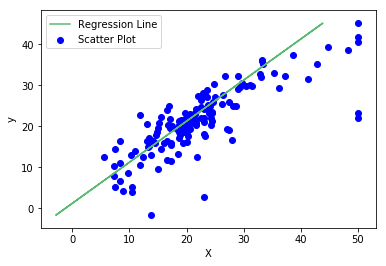

In [125]:

# Ploting Line
plt.plot((X_test @ w), y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(y_test,y, label='Scatter Plot', color=['b'])
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [126]:
w

array([-0.95020484,  1.08153366, -0.23482439,  0.69788361, -0.10031196,
        4.22972711, -0.52233193, -2.04936251,  0.63526681, -1.08329572,
       -1.09264168,  1.04856991, -2.60681188])

In [96]:
b

0.1048674766456126

In [ ]:
z = np.array([-0.95044349,  1.0855348 , -0.23858265,  0.69920756, -0.03915649,
        4.29087331, -0.52061957, -2.00992565,  0.60343777, -1.06684344,
       -1.04253103,  1.07131793, -2.57715974])

In [281]:
#gradient descent
def gradientDescent(X,y,m_current,b_current,iters,learningRate):
    cost = np.zeros(iters)
    N = (len(X))
    global weight
    weight = []
    step = 0
    batch_size = 20
    for i in range(iters):
        #learningRate /= 2
        for j in range(batch_size):
            y_current = X[j,:] @ m_current + b_current
            
            print(cost[i])
            m_gradient = -(2/N) * np.dot(X[j,:].T , (y[j] - y_current))
    #         print(np.dot(X.T , (y - y_current)))
        b_gradient = -(2/N) * np.sum(y[j] - y_current)
        m_current = m_current - (learningRate * m_gradient)
        b_current = b_current - (learningRate * b_gradient)
        cost[i] = computeCost1(b_current,m_current,X[j,:],y[j])
        weight.append(m_current) 
    return m_current,b_current,learningRate,cost,step

w,b,learningRate,c,step = gradientDescent(X_train,y_train,initial_m,initial_b,100000,.0001)

0.0
0.0


KeyError: 1

In [143]:
np.random.randint(0,12)

3

In [217]:
np.array(y_train)[3]


22.5

In [242]:
def computeCost1(b,m,X,y):
    predictions = X @ m.T + b
    cost = 1/(2*len(X)) * np.sum(np.square(predictions - y))
    return cost

In [73]:
w

array([[-0.47634416,  1.98803097,  0.06816305,  1.16858769, -0.17187925,
         2.22194501,  0.50325293, -0.03208617,  1.40868108, -1.88212529,
         0.17592121,  1.27013082, -1.64436535]])